In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("HepatitisCdata.csv")
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [5]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


C:\Users\DCL\AppData\Local\Temp\ipykernel_15764\601573477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ALB'].fillna(df['ALB'].mean(), inplace=True)
C:\Users\DCL\AppData\Local\Temp\ipykernel_15764\601573477.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [6]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

C:\Users\DCL\AppData\Local\Temp\ipykernel_15764\3193369793.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})


In [7]:
df.head()

Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0         0   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1         0   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2         0   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3         0   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4         0   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
0  69.0  
1  76.5  
2  79.3  
3  75.7  
4  68.7

In [8]:
df['Category'].value_counts()

Category
0    540
1     75
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.sample(5)

Category  Age  Sex  ALB  ALP  ALT  AST  BIL  CHE  CHOL  CREA  GGT  PROT
454         0   25    0   62  109   52   19   19  138   164    14   41    81
224         0   26    1   89  164  190  183   35  277   254    92  156   116
403         0   19    0   55  117   55    7   40  120   151    36  247    80
244         0   29    1  109  361  133  110   55  397   189    85  232    80
336         0    8    0   99   77  125  133   61  165    93    88   29    98

In [10]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.sample(10)

Category       Age  Sex       ALB       ALP       ALT       AST  \
315       0.0  0.979167  1.0  0.084656  0.202899  0.478006  0.405405   
409       0.0  0.416667  0.0  0.412698  0.567633  0.225806  0.483108   
215       0.0  0.541667  1.0  0.539683  0.584541  0.841642  0.290541   
387       0.0  0.354167  0.0  0.814815  0.094203  0.161290  0.087838   
14        0.0  0.145833  1.0  0.349206  0.082126  0.407625  0.270270   
552       1.0  0.250000  1.0  0.470899  0.004831  0.219941  0.810811   
278       0.0  0.708333  1.0  0.603175  0.572464  0.105572  0.094595   
607       1.0  0.541667  0.0  0.365079  0.062802  0.005865  0.506757   
217       0.0  0.541667  1.0  0.380952  0.442029  0.363636  0.344595   
145       0.0  0.395833  1.0  0.645503  0.572464  0.240469  0.057432   

          BIL       CHE      CHOL      CREA       GGT      PROT  
315  0.342246  0.071429  0.009585  0.939655  0.243697  0.060606  
409  0.144385  0.165025  0.869010  0.431034  0.128852  0.373737  
215  0.358289  0.948276  0.744409  0.750000  0.764706  0.550505  
387  0.192513  0.061576  0.127796  0.491379  0.067227  0.434343  
14   0.117647  0.076355  0.399361  0.275862  0.173669  0.494949  
552  0.850267  0.815271  0.373802  0.603448  0.736695  0.454545  
278  0.299465  0.475369  0.488818  0.456897  0.126050  0.474747  
607  0.802139  0.206897  0.095847  0.965517  0.938375  0.969697  
217  0.133690  0.502463  0.498403  0.637931  0.257703  0.146465  
145  0.288770  0.460591  0.498403  0.629310  0.280112  0.464646

In [11]:
np.abs(df.iloc[:,:-1].corrwith(df['Category'])).sort_values(ascending = False)

Category    1.000000
AST         0.597019
GGT         0.447204
BIL         0.433570
CHOL        0.274088
ALP         0.167298
CHE         0.166639
ALB         0.163214
CREA        0.104584
ALT         0.083090
Sex         0.071663
Age         0.044767
dtype: float64

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Assuming df is your dataframe and 'readmitted' is the column to be predicted
X = df.drop('Category', axis=1)
y = df['Category']

# Splitting the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.10, random_state=42) 

In [14]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.04603471, 0.        , 0.04926266, 0.09566328, 0.10427125,
       0.21092255, 0.08634409, 0.07260582, 0.03139122, 0.09458052,
       0.08570383, 0.03673192])

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

AST     0.210923
ALT     0.104271
ALP     0.095663
CREA    0.094581
BIL     0.086344
GGT     0.085704
CHE     0.072606
ALB     0.049263
Age     0.046035
PROT    0.036732
CHOL    0.031391
Sex     0.000000
dtype: float64

<AxesSubplot:>

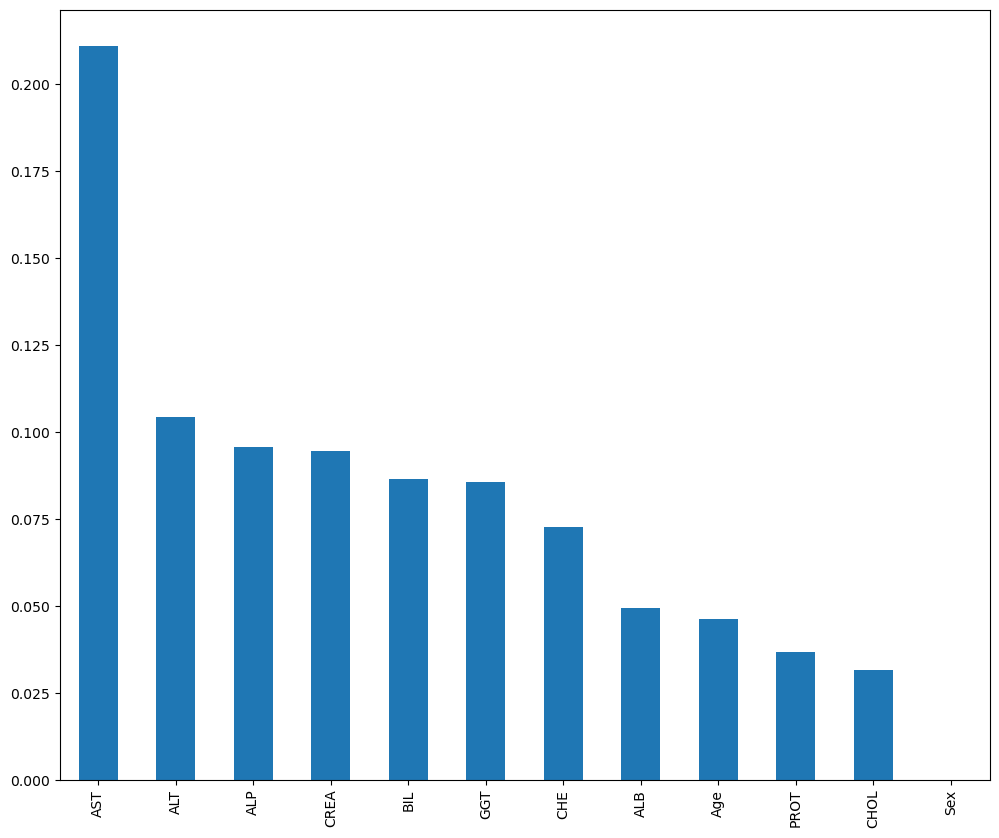

In [16]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12, 10))

In [17]:
from sklearn.feature_selection import SelectKBest

In [18]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CREA', 'GGT', 'PROT'], dtype='object')

In [19]:
# Perform feature selection using mutual information
# Number of features to select
mi = SelectKBest(mutual_info_classif, k=10)
X_train_mi = mi.fit_transform(X_train, y_train)
X_test_mi = mi.transform(X_test)

Fold 1:
Train Accuracy: 1.0
Train AUC: 0.9999999999999999
Test Accuracy: 0.926829268292683
Test AUC: 0.957070707070707
Validation Accuracy: 0.926829268292683
Validation AUC: 0.957070707070707


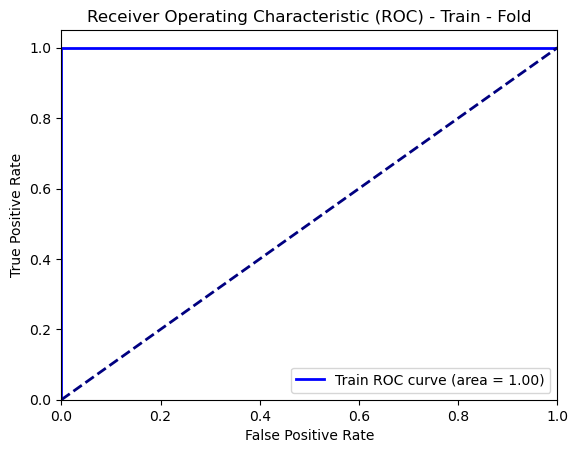

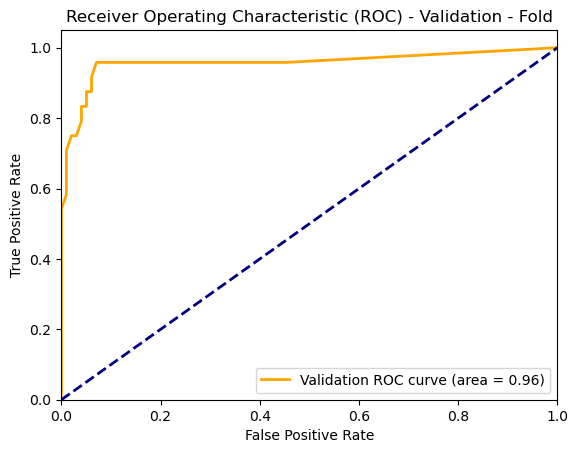

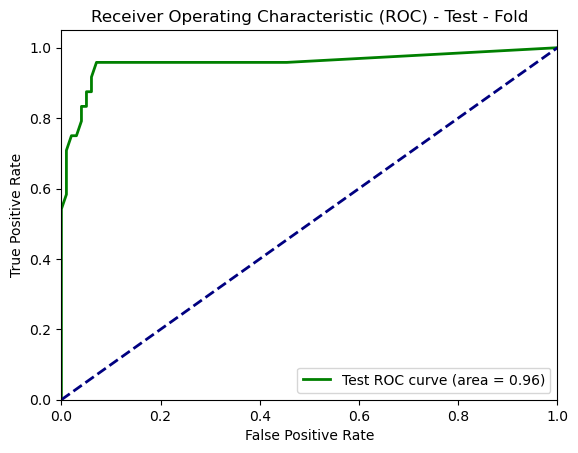

Confusion matrix, without normalization


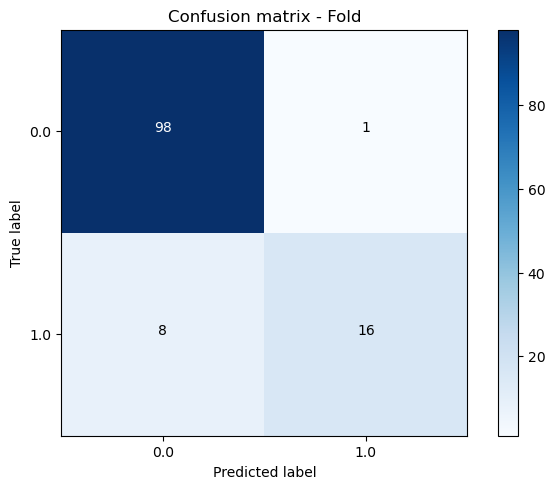

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96        99
         1.0       0.94      0.67      0.78        24

    accuracy                           0.93       123
   macro avg       0.93      0.83      0.87       123
weighted avg       0.93      0.93      0.92       123

Fold 2:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.983739837398374
Test AUC: 0.9972027972027971
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9972027972027971


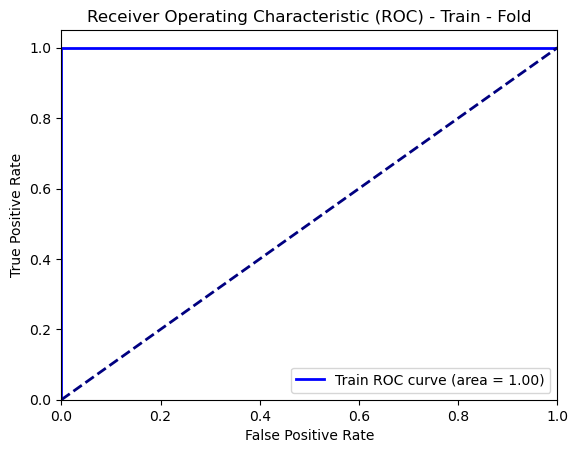

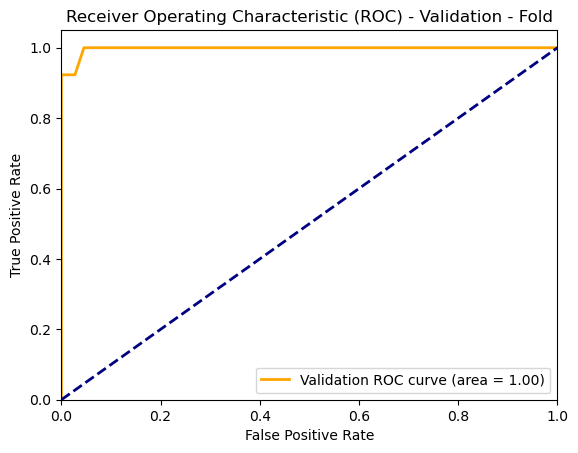

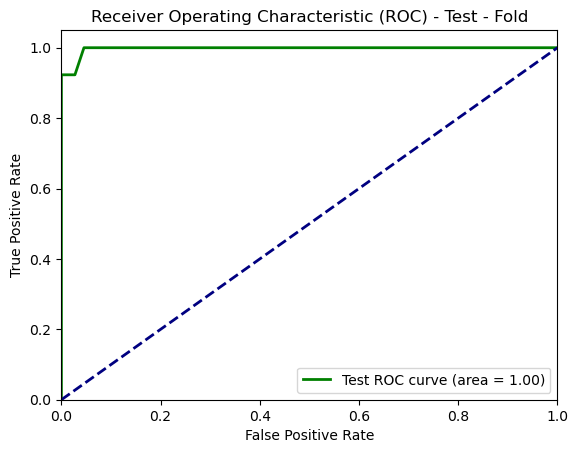

Confusion matrix, without normalization


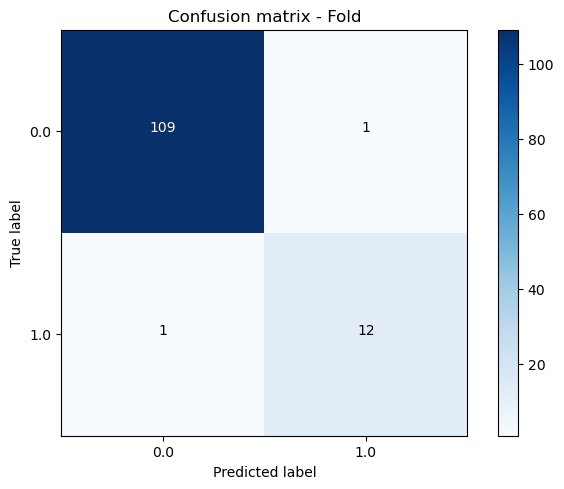

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       110
         1.0       0.92      0.92      0.92        13

    accuracy                           0.98       123
   macro avg       0.96      0.96      0.96       123
weighted avg       0.98      0.98      0.98       123

Fold 3:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.967479674796748
Test AUC: 0.9343093093093092
Validation Accuracy: 0.967479674796748
Validation AUC: 0.9343093093093092


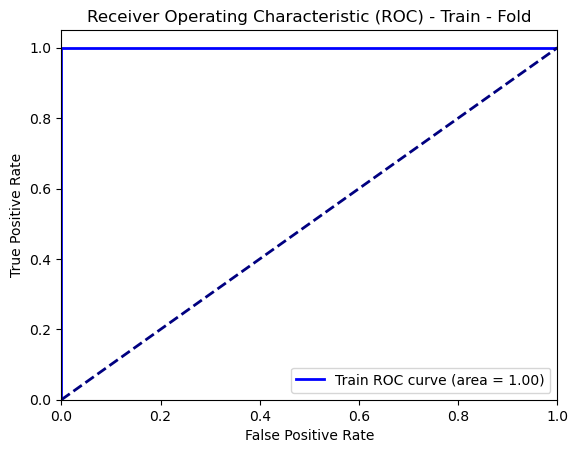

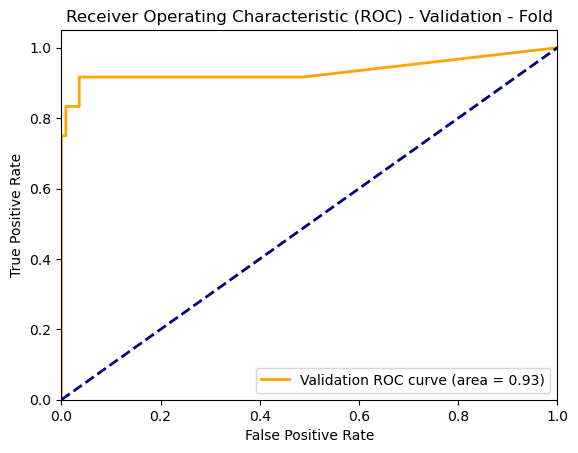

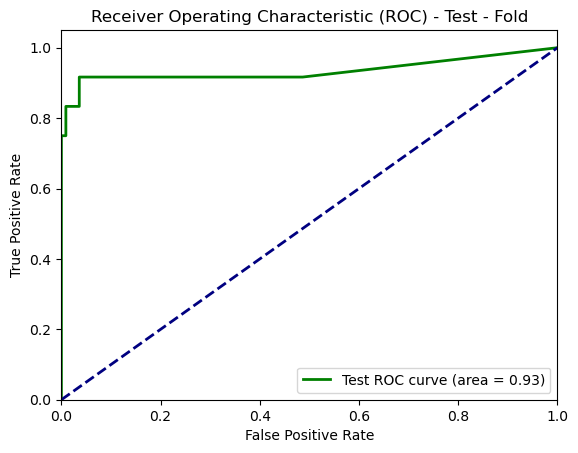

Confusion matrix, without normalization


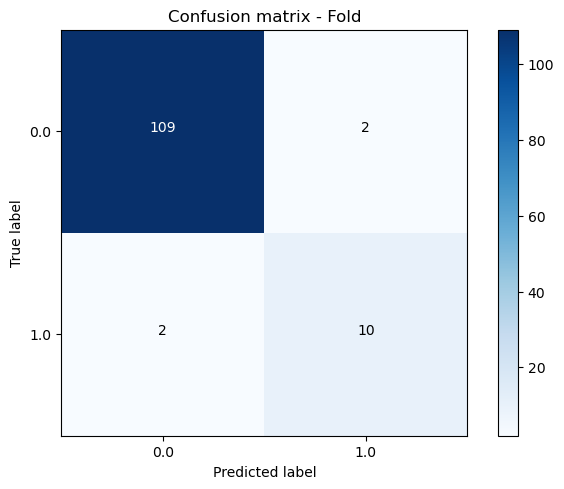

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       111
         1.0       0.83      0.83      0.83        12

    accuracy                           0.97       123
   macro avg       0.91      0.91      0.91       123
weighted avg       0.97      0.97      0.97       123

Fold 4:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.983739837398374
Test AUC: 0.9982517482517482
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9982517482517482


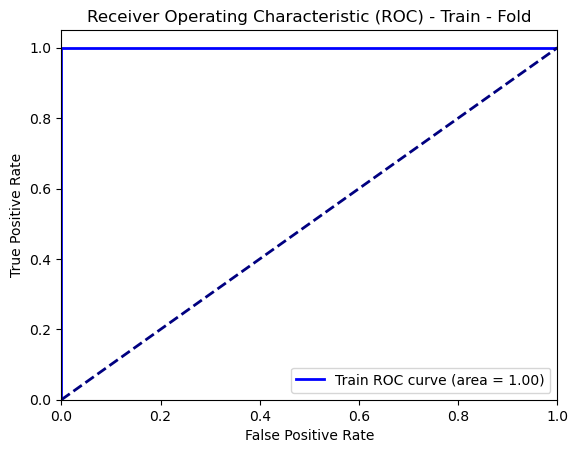

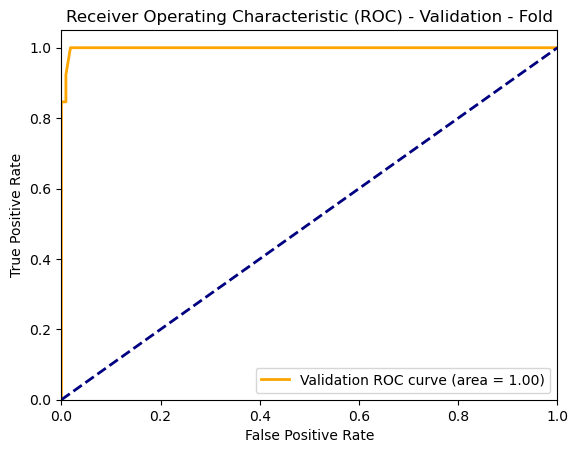

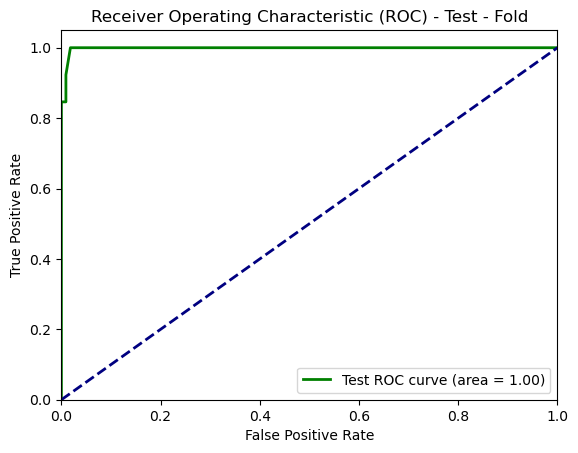

Confusion matrix, without normalization


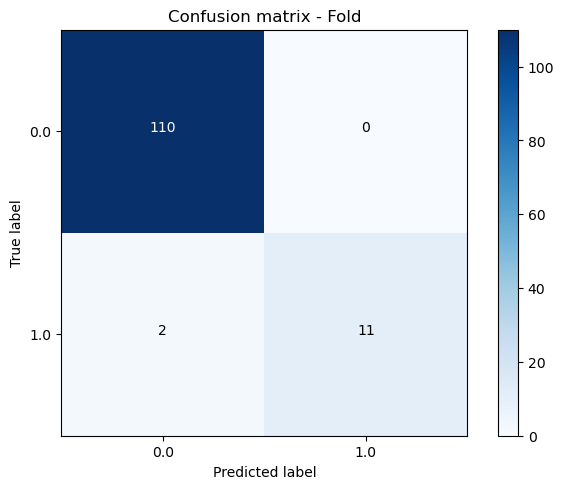

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 5:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.983739837398374
Test AUC: 0.9958041958041959
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9958041958041959


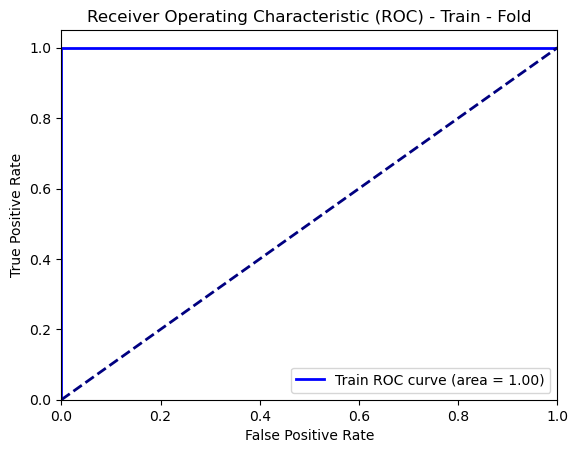

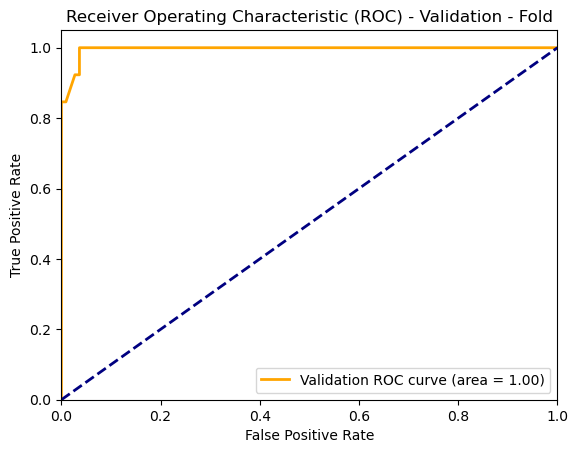

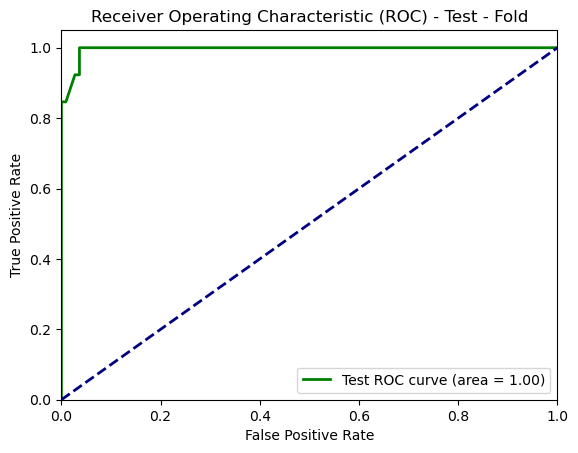

Confusion matrix, without normalization


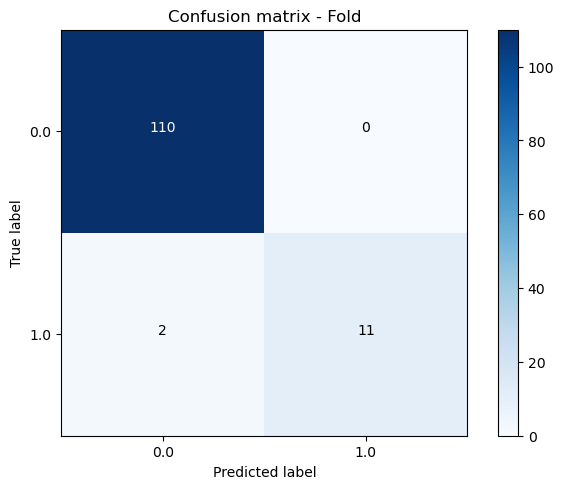

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Average Train Accuracy: 1.0
Average Validation Accuracy: 0.9691056910569106
Average Test Accuracy: 0.9691056910569106
Average Train AUC: 1.0
Average Validation AUC: 0.9765277515277514
Average Test AUC: 0.9765277515277514


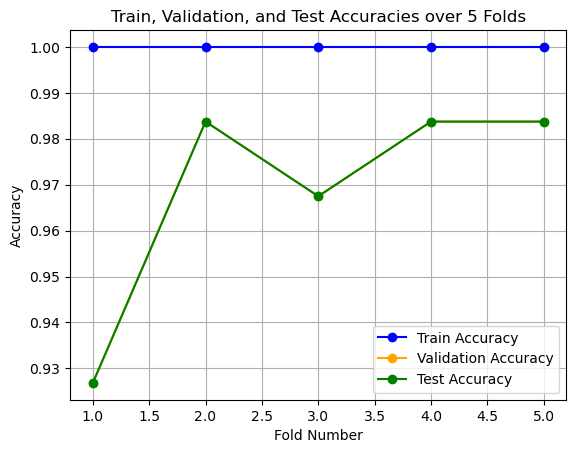

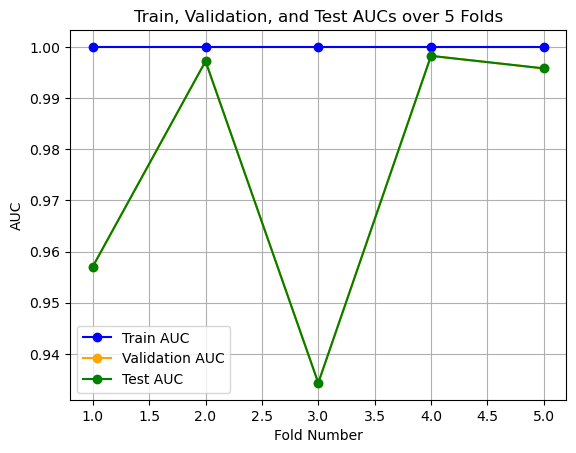

Fold 1:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.926829268292683
Test AUC: 0.9795875420875422
Validation Accuracy: 0.926829268292683
Validation AUC: 0.9795875420875422


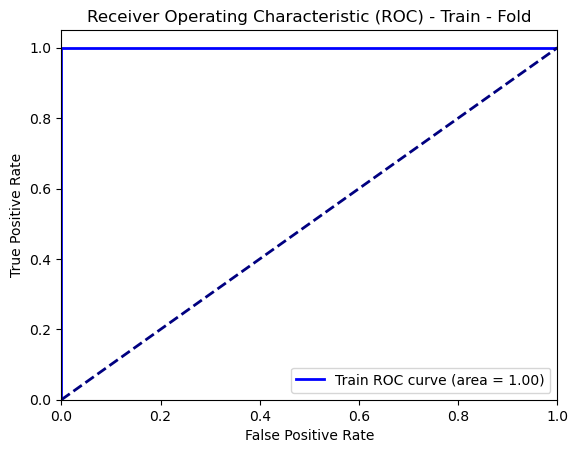

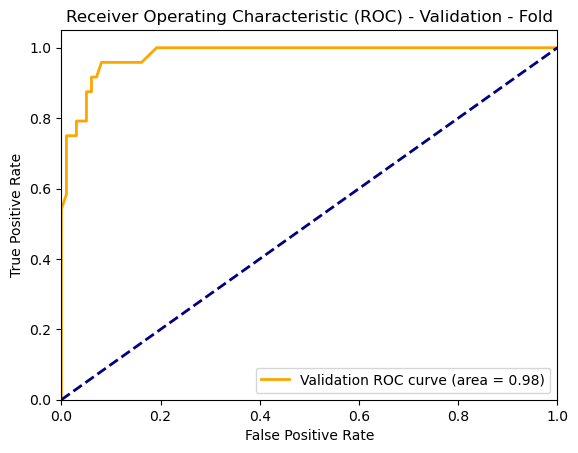

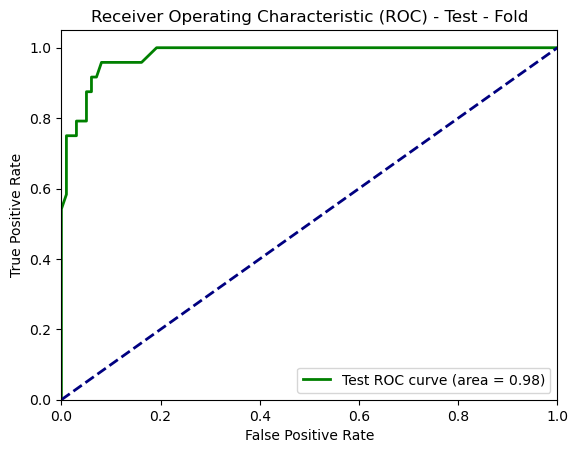

Confusion matrix, without normalization


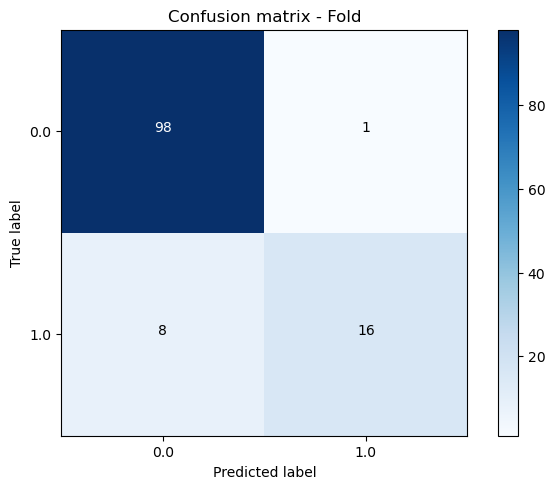

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96        99
         1.0       0.94      0.67      0.78        24

    accuracy                           0.93       123
   macro avg       0.93      0.83      0.87       123
weighted avg       0.93      0.93      0.92       123

Fold 2:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.983739837398374
Test AUC: 0.9979020979020978
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9979020979020978


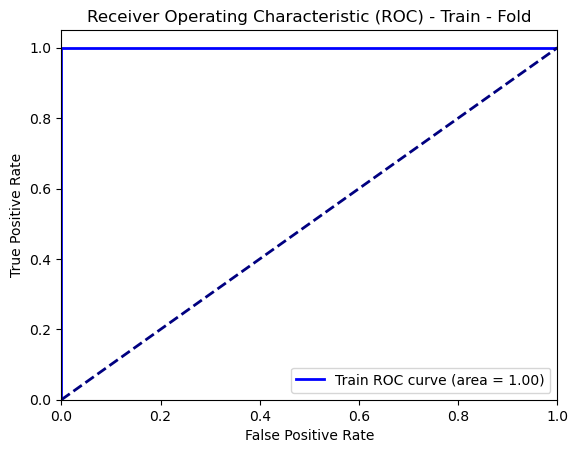

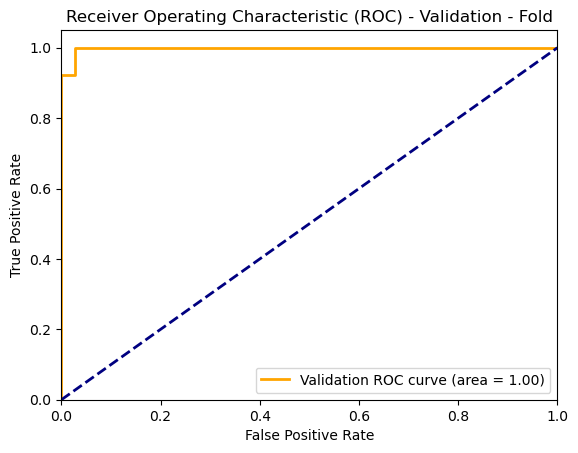

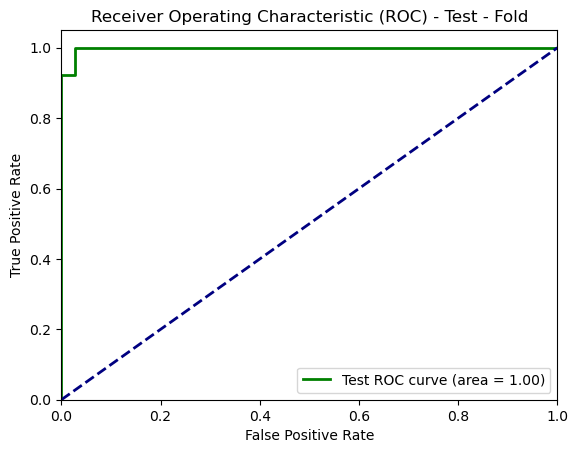

Confusion matrix, without normalization


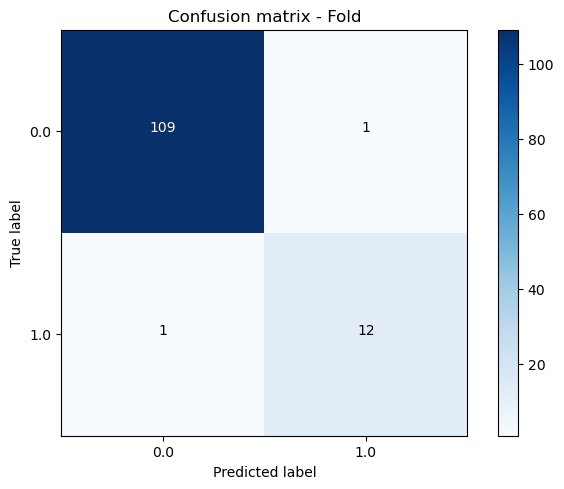

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       110
         1.0       0.92      0.92      0.92        13

    accuracy                           0.98       123
   macro avg       0.96      0.96      0.96       123
weighted avg       0.98      0.98      0.98       123

Fold 3:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.967479674796748
Test AUC: 0.933183183183183
Validation Accuracy: 0.967479674796748
Validation AUC: 0.933183183183183


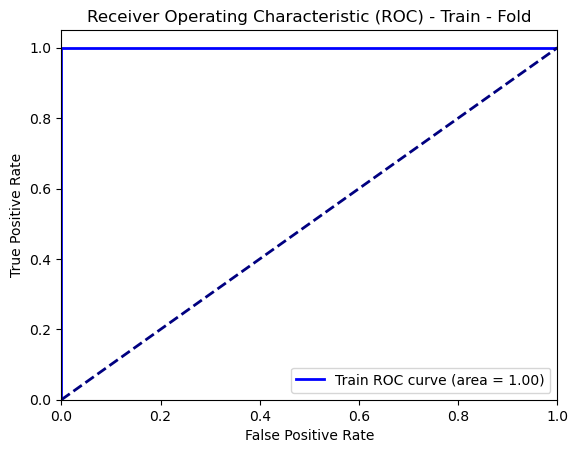

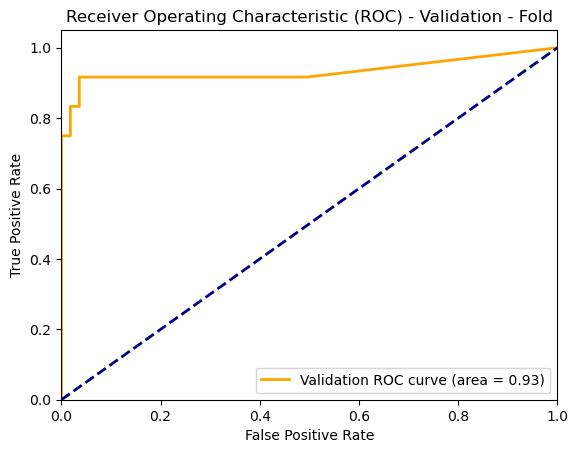

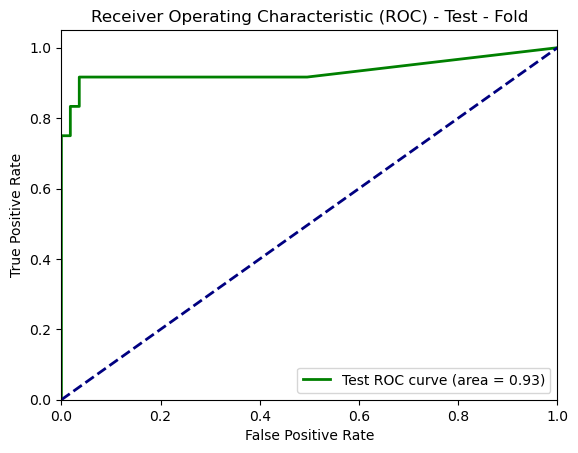

Confusion matrix, without normalization


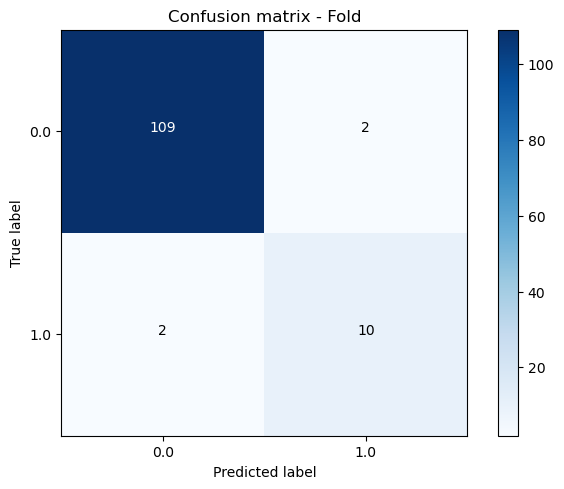

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       111
         1.0       0.83      0.83      0.83        12

    accuracy                           0.97       123
   macro avg       0.91      0.91      0.91       123
weighted avg       0.97      0.97      0.97       123

Fold 4:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.983739837398374
Test AUC: 0.9993006993006993
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9993006993006993


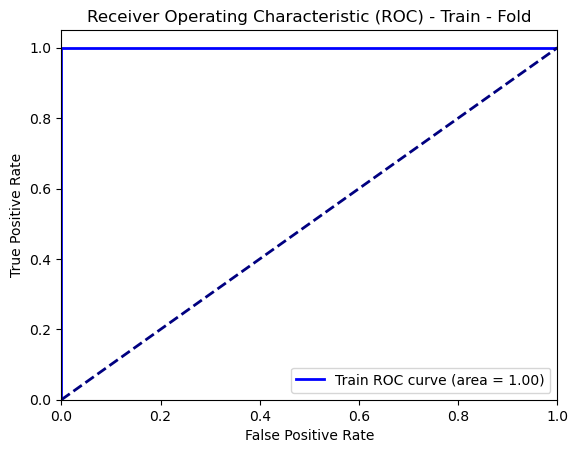

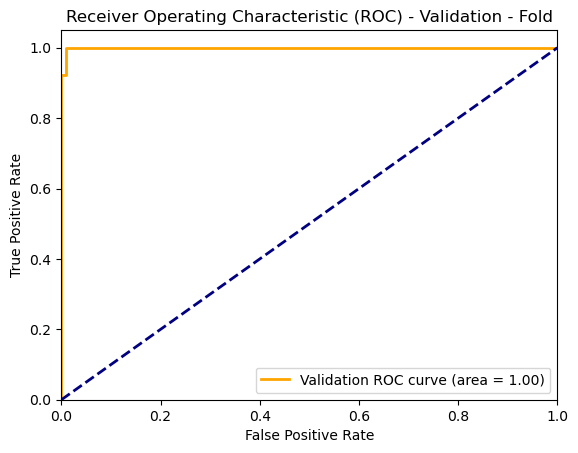

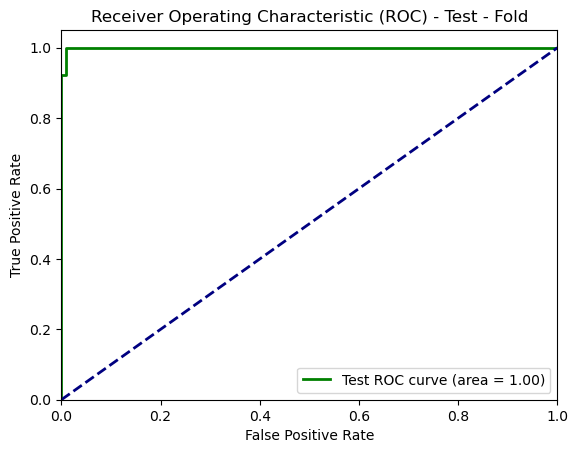

Confusion matrix, without normalization


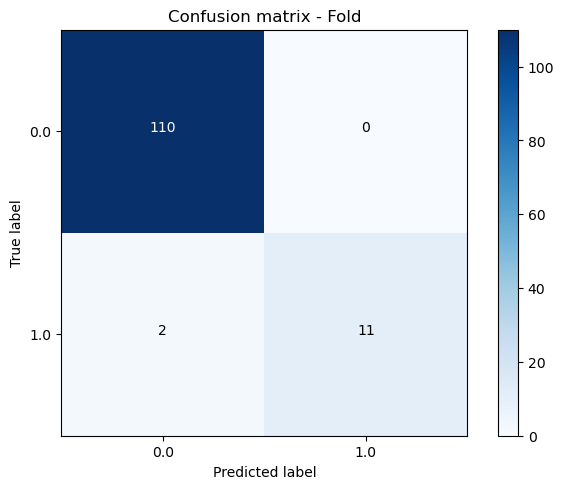

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 5:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.983739837398374
Test AUC: 0.9965034965034965
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9965034965034965


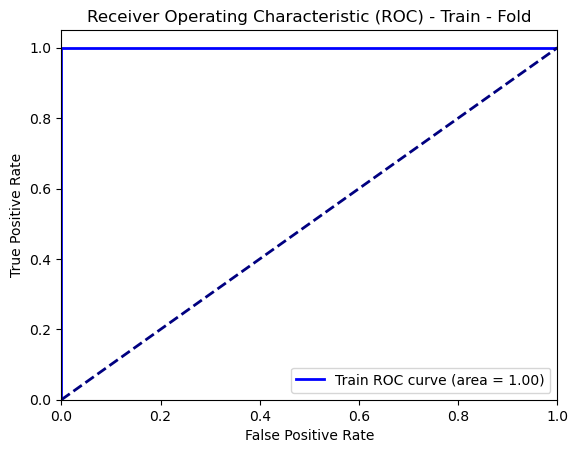

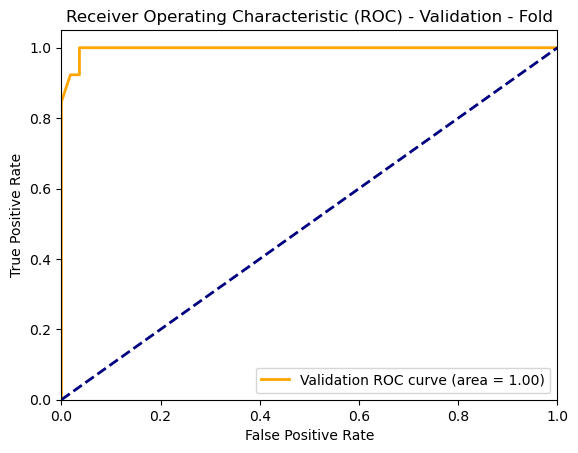

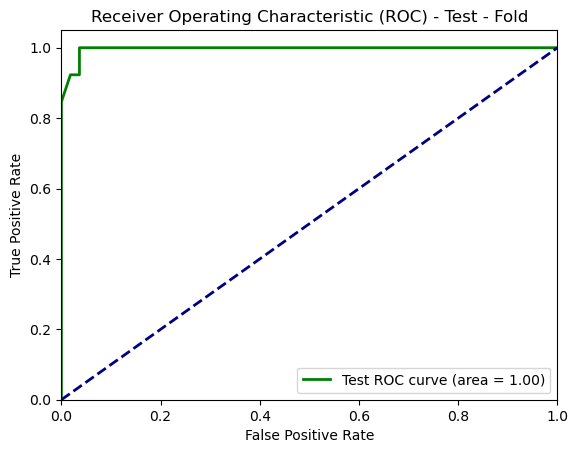

Confusion matrix, without normalization


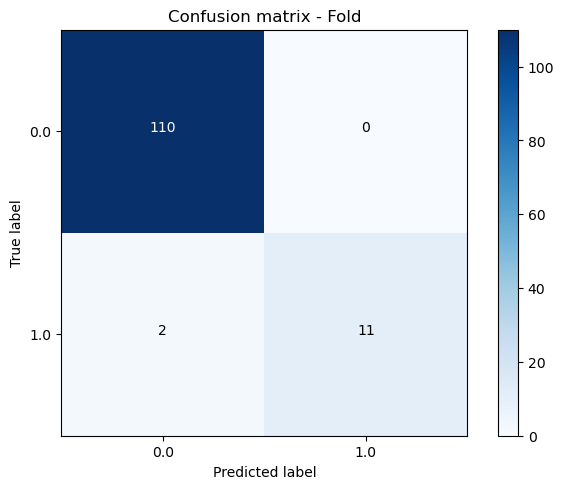

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Average Train Accuracy: 1.0
Average Validation Accuracy: 0.9691056910569106
Average Test Accuracy: 0.9691056910569106
Average Train AUC: 1.0
Average Validation AUC: 0.9812954037954038
Average Test AUC: 0.9812954037954038


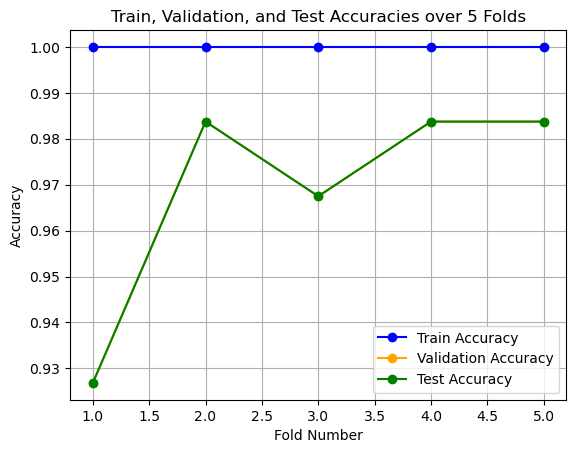

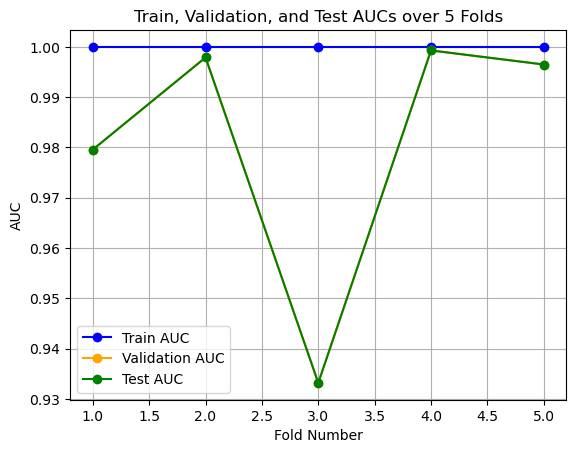

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Random Forest model
    model = RandomForestClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Random Forest model
    model = RandomForestClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()


Fold 1:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.9349593495934959
Test AUC: 0.8491161616161618
Validation Accuracy: 0.9349593495934959
Validation AUC: 0.8491161616161618


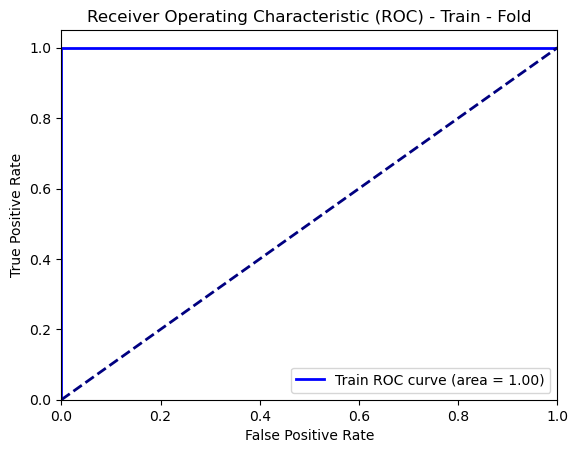

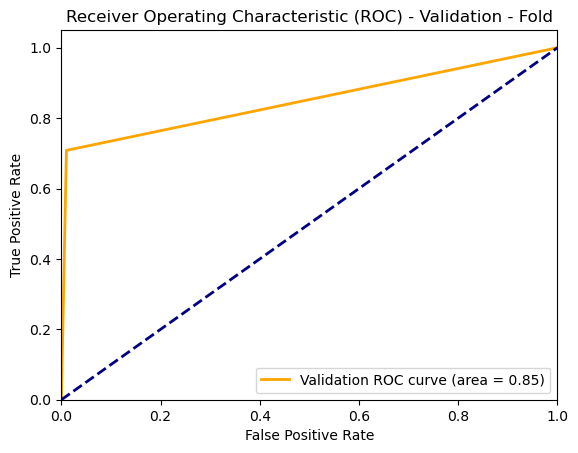

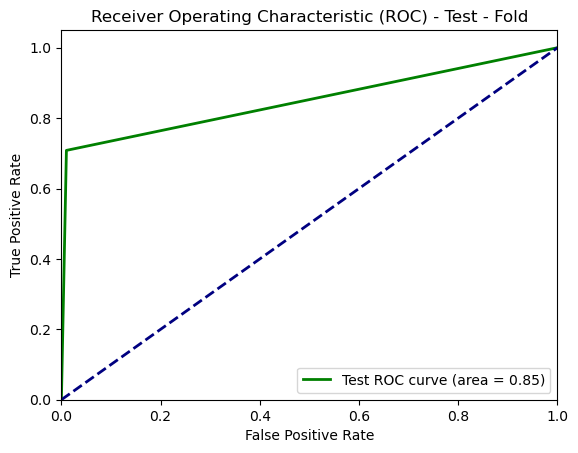

Confusion matrix, without normalization


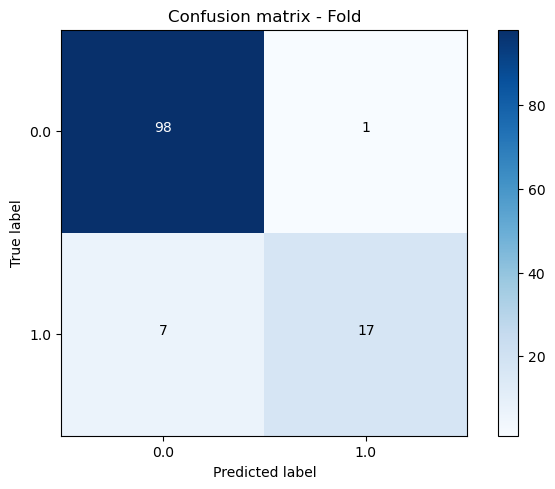

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        99
         1.0       0.94      0.71      0.81        24

    accuracy                           0.93       123
   macro avg       0.94      0.85      0.89       123
weighted avg       0.94      0.93      0.93       123

Fold 2:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.959349593495935
Test AUC: 0.8755244755244754
Validation Accuracy: 0.959349593495935
Validation AUC: 0.8755244755244754


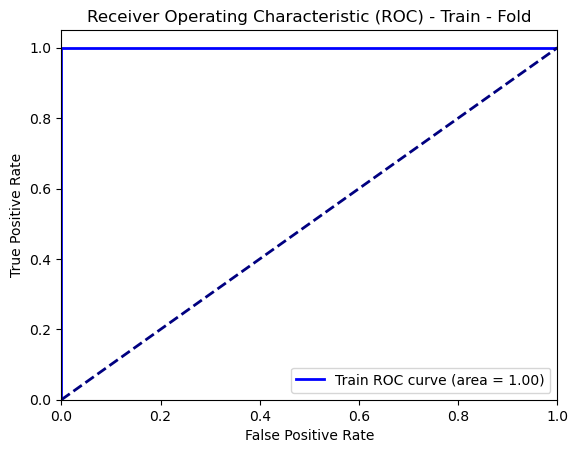

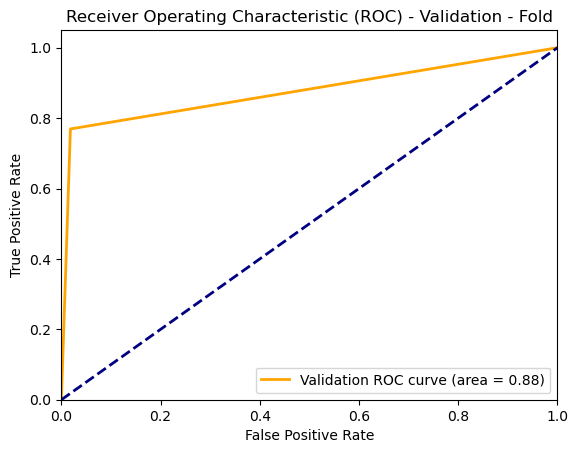

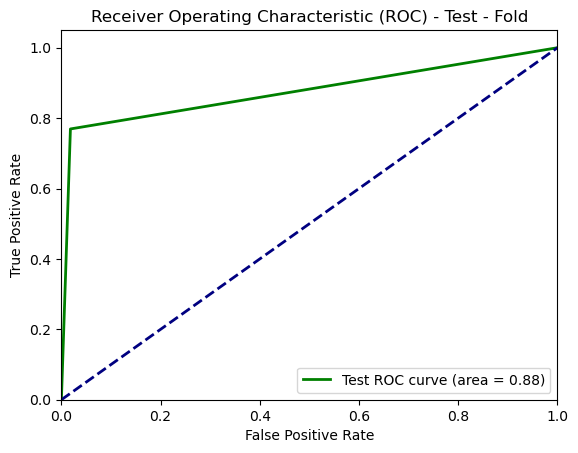

Confusion matrix, without normalization


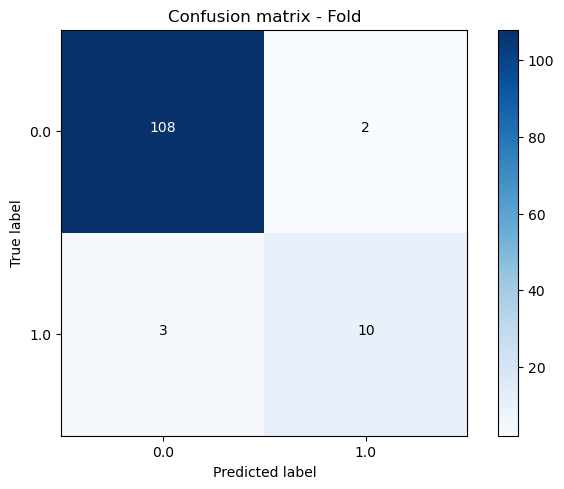

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       110
         1.0       0.83      0.77      0.80        13

    accuracy                           0.96       123
   macro avg       0.90      0.88      0.89       123
weighted avg       0.96      0.96      0.96       123

Fold 3:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.9512195121951219
Test AUC: 0.8614864864864865
Validation Accuracy: 0.9512195121951219
Validation AUC: 0.8614864864864865


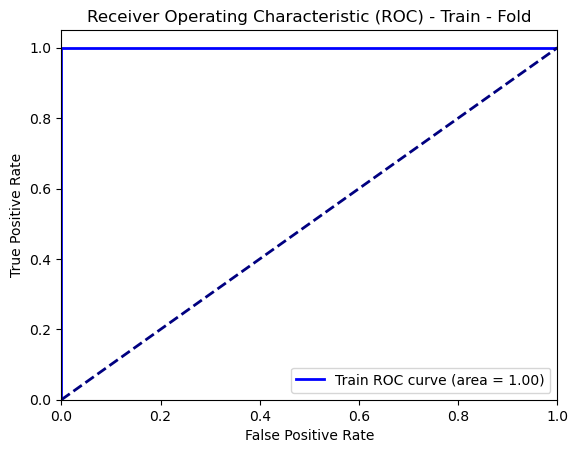

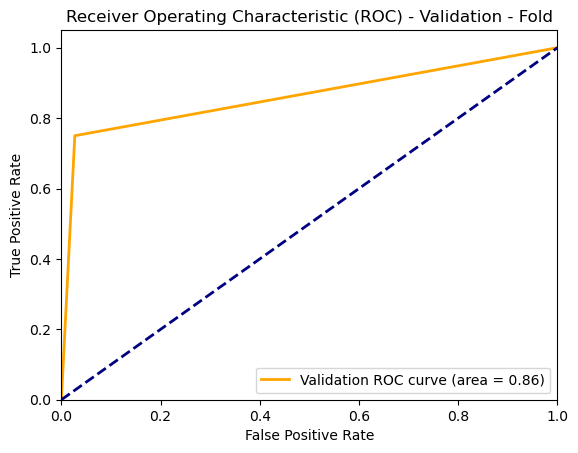

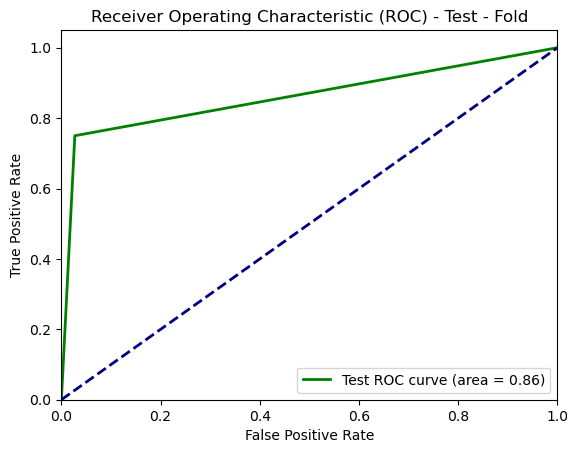

Confusion matrix, without normalization


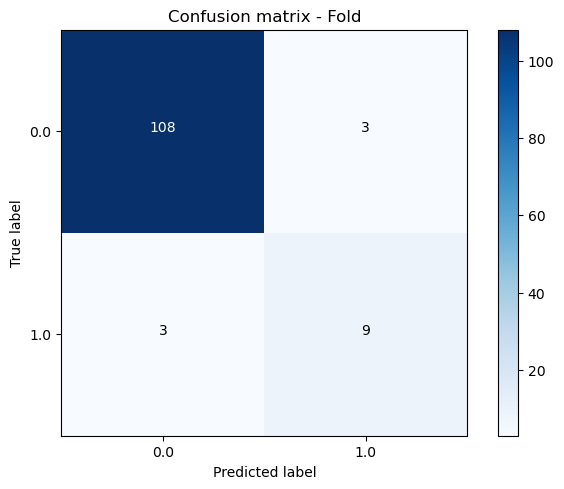

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       111
         1.0       0.75      0.75      0.75        12

    accuracy                           0.95       123
   macro avg       0.86      0.86      0.86       123
weighted avg       0.95      0.95      0.95       123

Fold 4:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.991869918699187
Test AUC: 0.9615384615384616
Validation Accuracy: 0.991869918699187
Validation AUC: 0.9615384615384616


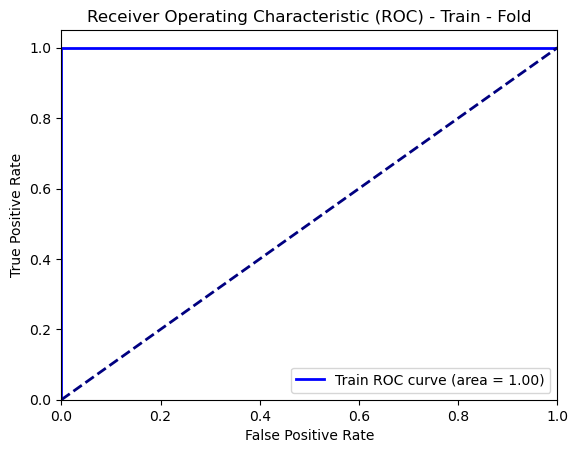

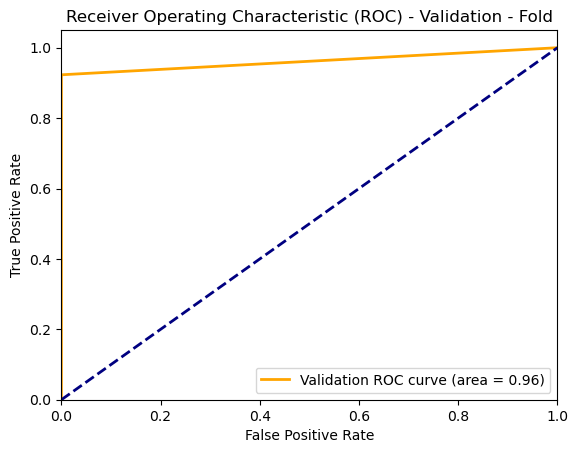

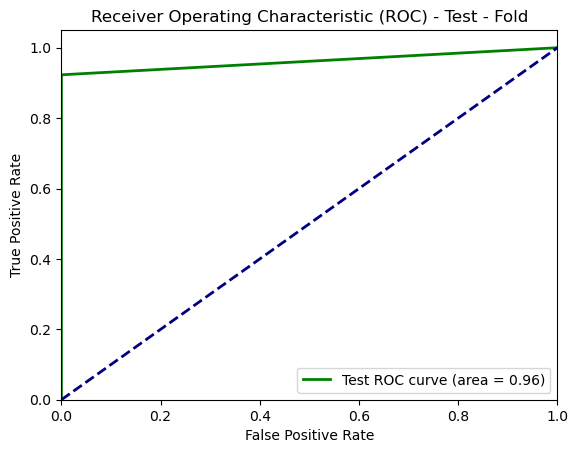

Confusion matrix, without normalization


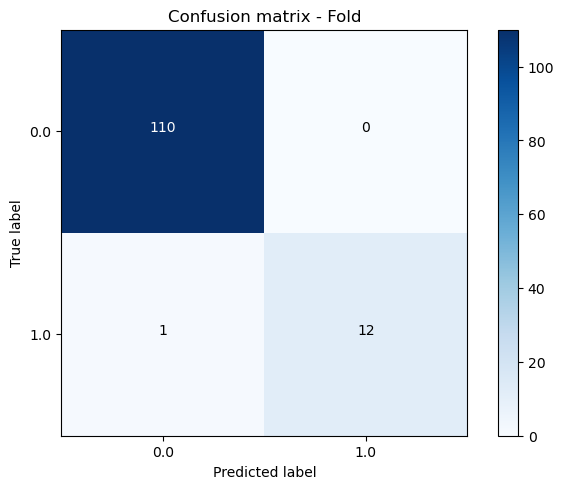

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       110
         1.0       1.00      0.92      0.96        13

    accuracy                           0.99       123
   macro avg       1.00      0.96      0.98       123
weighted avg       0.99      0.99      0.99       123

Fold 5:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.967479674796748
Test AUC: 0.947902097902098
Validation Accuracy: 0.967479674796748
Validation AUC: 0.947902097902098


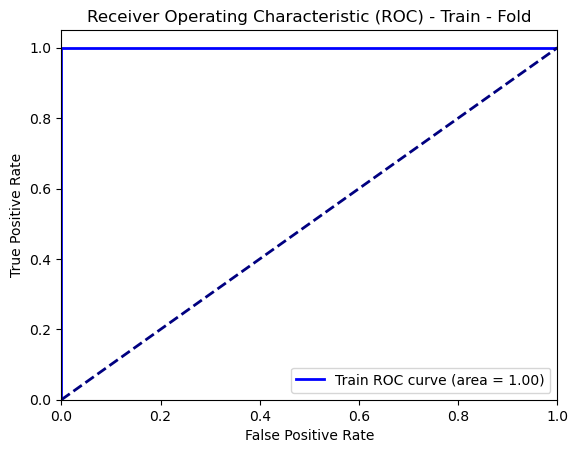

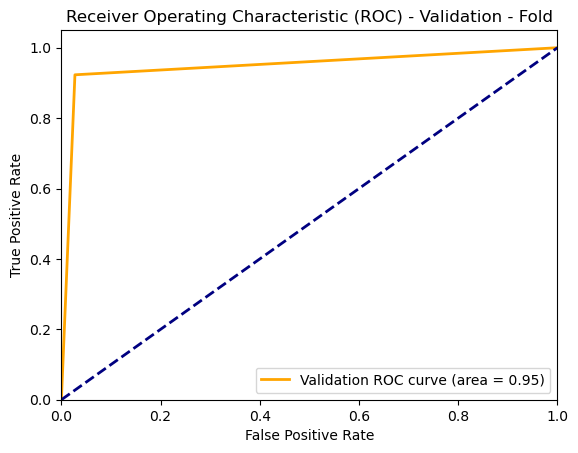

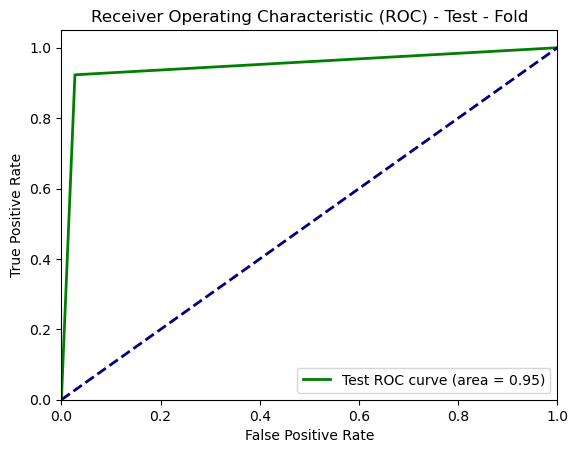

Confusion matrix, without normalization


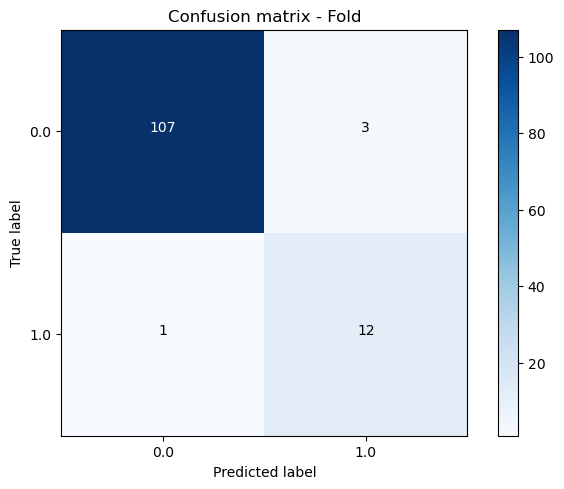

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       110
         1.0       0.80      0.92      0.86        13

    accuracy                           0.97       123
   macro avg       0.90      0.95      0.92       123
weighted avg       0.97      0.97      0.97       123

Average Train Accuracy: 1.0
Average Validation Accuracy: 0.9609756097560975
Average Test Accuracy: 0.9609756097560975
Average Train AUC: 1.0
Average Validation AUC: 0.8991135366135368
Average Test AUC: 0.8991135366135368


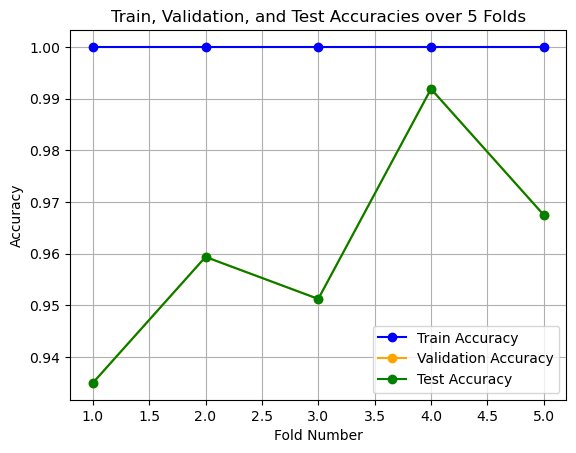

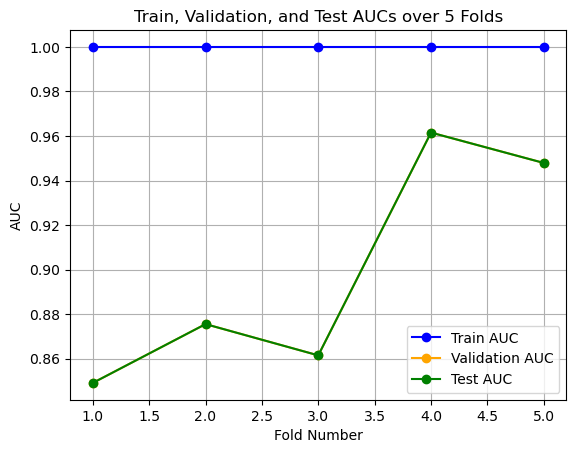

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Decision Tree model
    model = DecisionTreeClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()


Fold 1:
Train Accuracy: 0.991869918699187
Train AUC: 0.9991996798719488
Test Accuracy: 0.975609756097561
Test AUC: 0.9991582491582492
Validation Accuracy: 0.975609756097561
Validation AUC: 0.9991582491582492


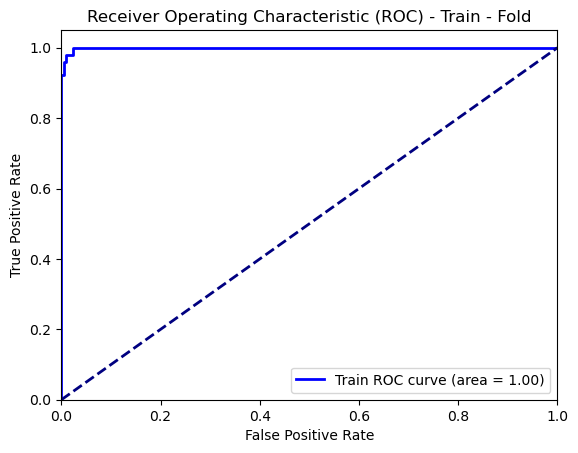

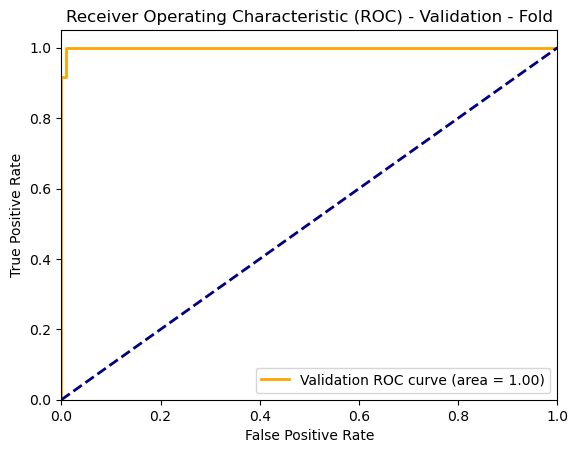

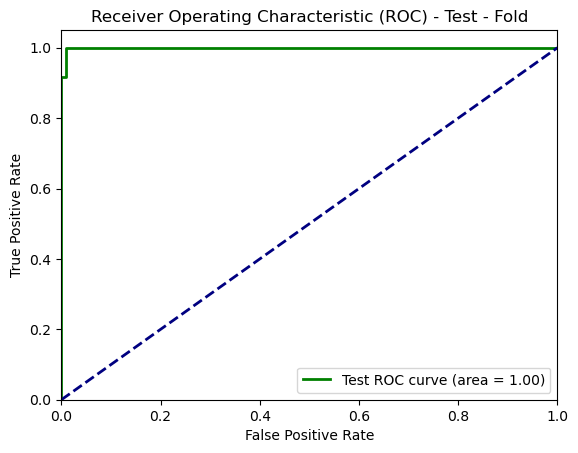

Confusion matrix, without normalization


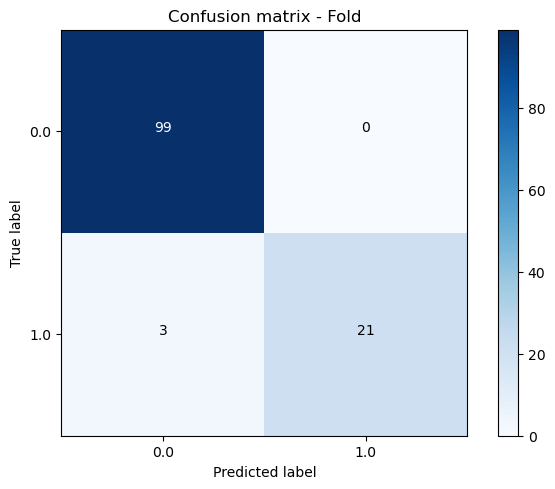

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        99
         1.0       1.00      0.88      0.93        24

    accuracy                           0.98       123
   macro avg       0.99      0.94      0.96       123
weighted avg       0.98      0.98      0.97       123

Fold 2:
Train Accuracy: 0.991869918699187
Train AUC: 0.999549887471868
Test Accuracy: 0.975609756097561
Test AUC: 0.9902097902097902
Validation Accuracy: 0.975609756097561
Validation AUC: 0.9902097902097902


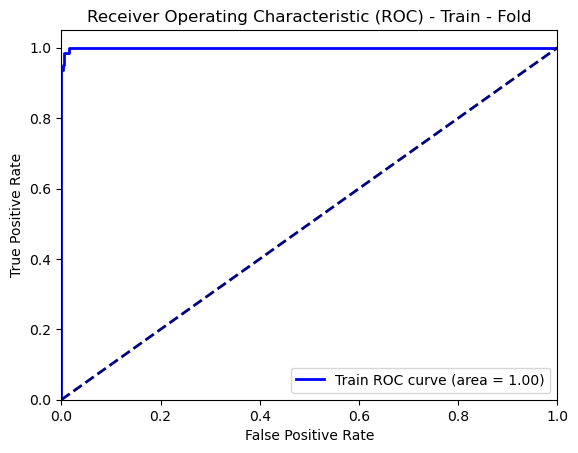

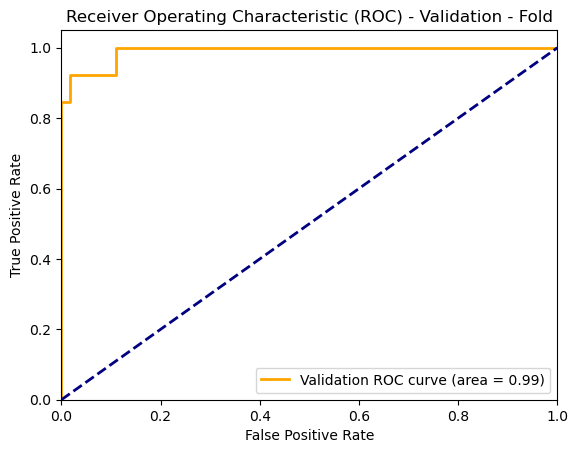

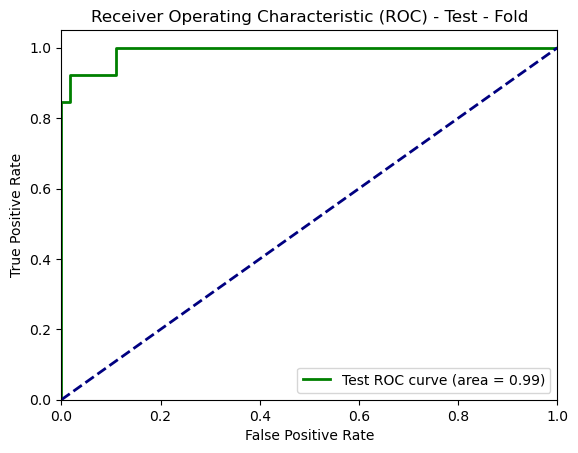

Confusion matrix, without normalization


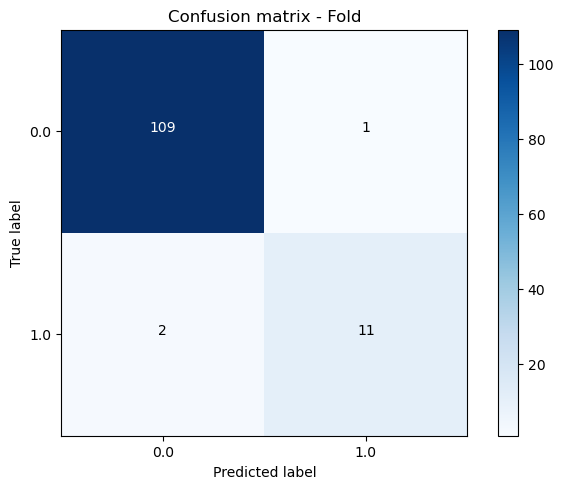

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       110
         1.0       0.92      0.85      0.88        13

    accuracy                           0.98       123
   macro avg       0.95      0.92      0.93       123
weighted avg       0.98      0.98      0.98       123

Fold 3:
Train Accuracy: 0.991869918699187
Train AUC: 0.9995929995929996
Test Accuracy: 0.983739837398374
Test AUC: 0.9534534534534533
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9534534534534533


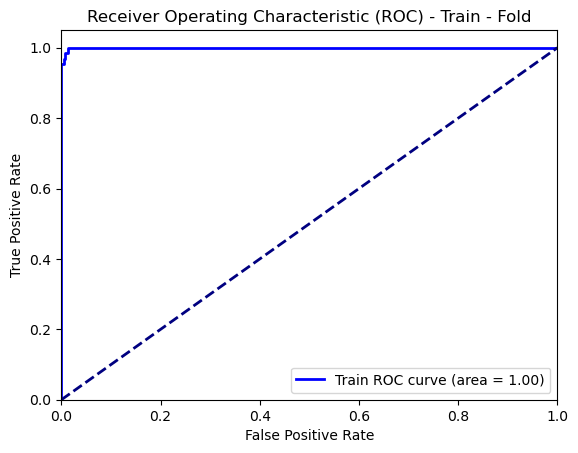

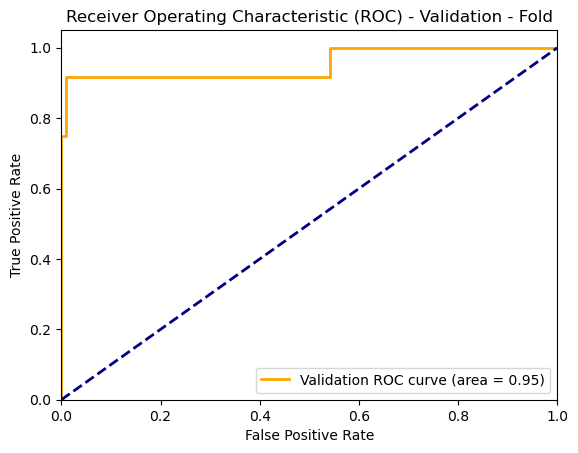

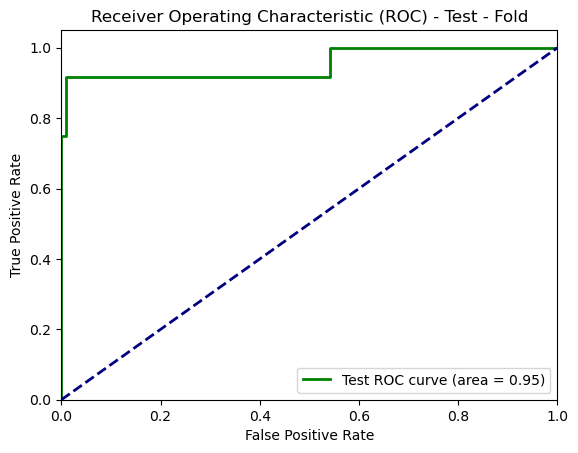

Confusion matrix, without normalization


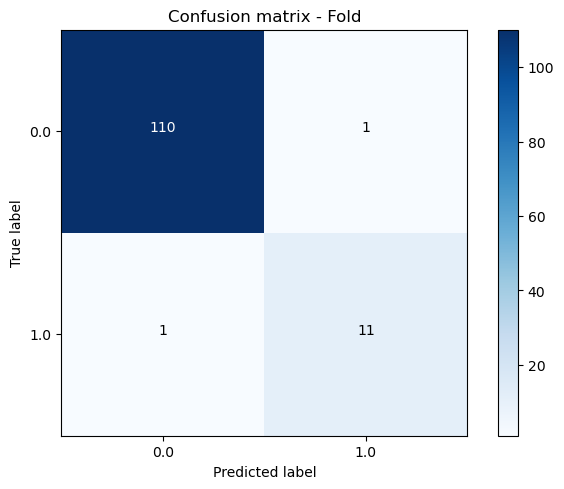

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       111
         1.0       0.92      0.92      0.92        12

    accuracy                           0.98       123
   macro avg       0.95      0.95      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 4:
Train Accuracy: 0.9878048780487805
Train AUC: 0.9991372843210803
Test Accuracy: 1.0
Test AUC: 1.0
Validation Accuracy: 1.0
Validation AUC: 1.0


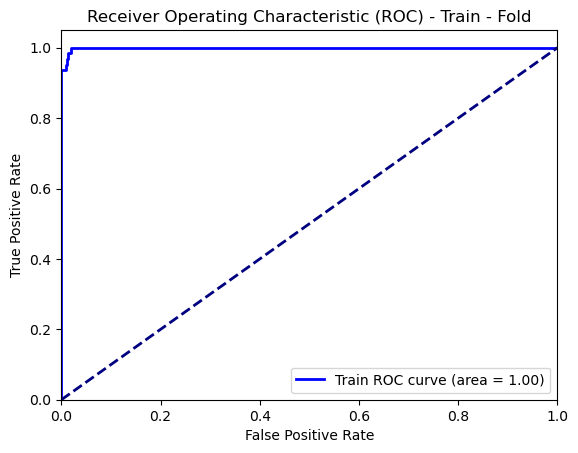

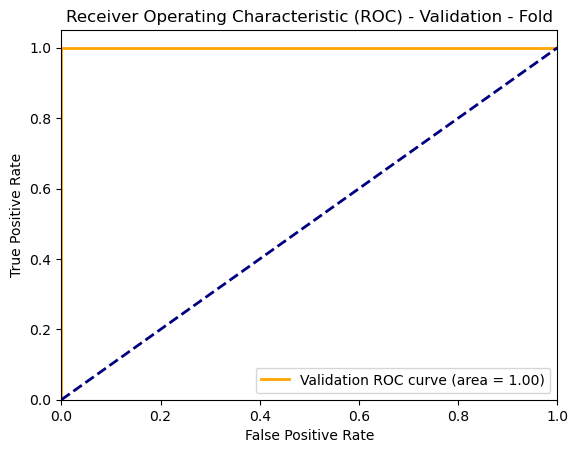

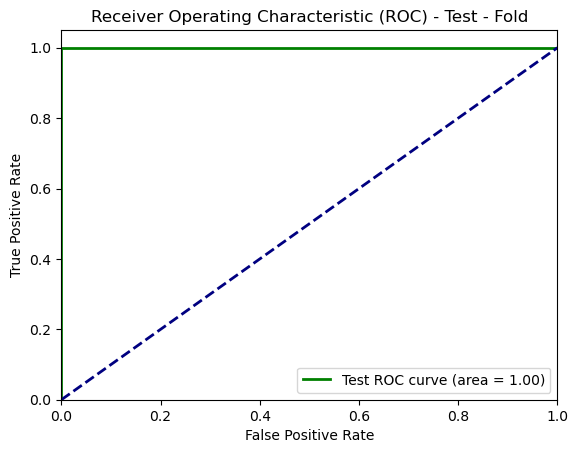

Confusion matrix, without normalization


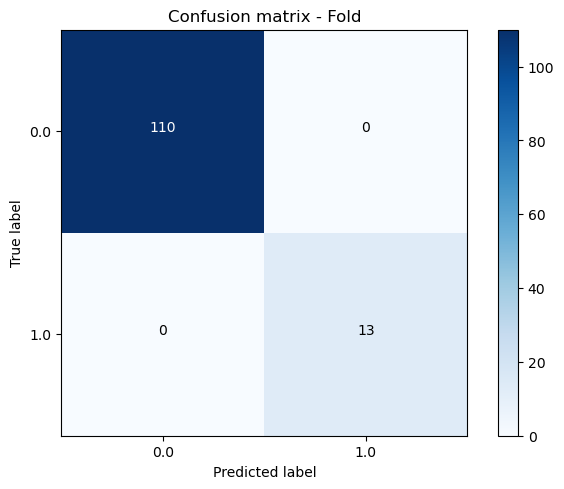

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

Fold 5:
Train Accuracy: 0.9959349593495935
Train AUC: 0.9993248312078019
Test Accuracy: 0.975609756097561
Test AUC: 0.9902097902097902
Validation Accuracy: 0.975609756097561
Validation AUC: 0.9902097902097902


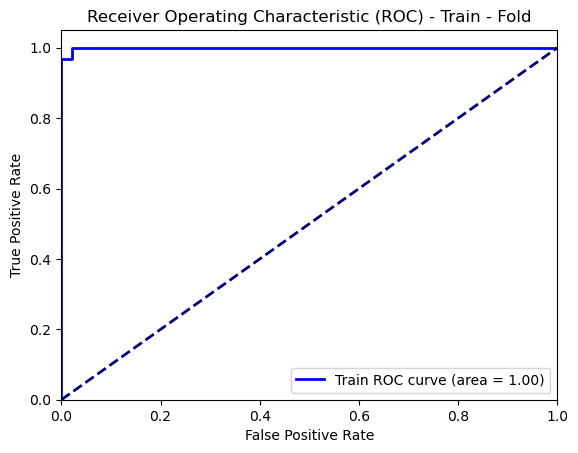

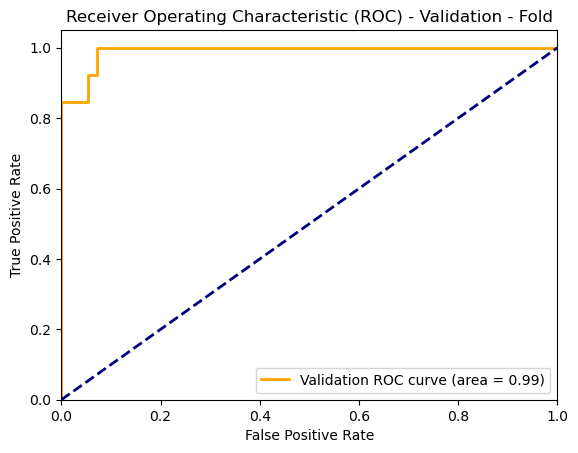

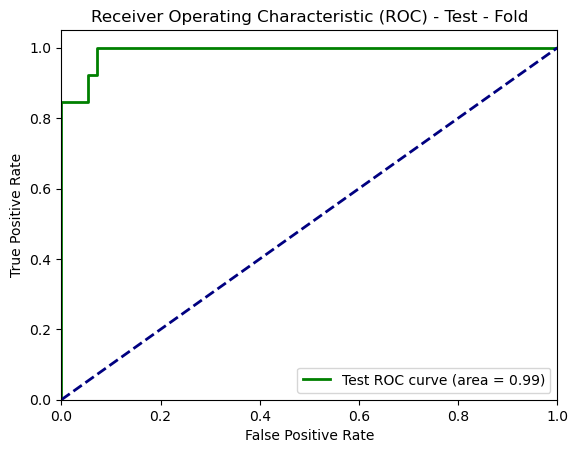

Confusion matrix, without normalization


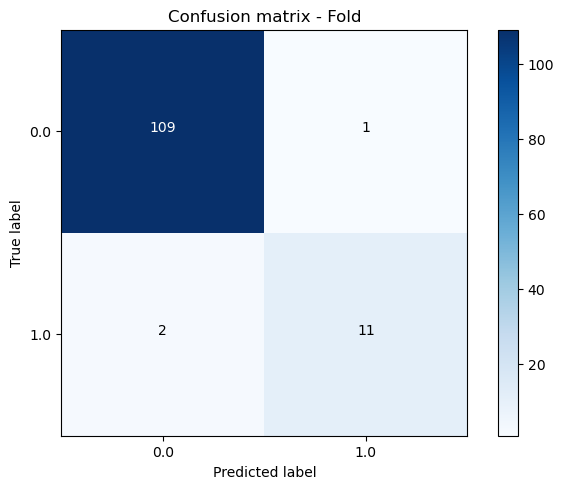

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       110
         1.0       0.92      0.85      0.88        13

    accuracy                           0.98       123
   macro avg       0.95      0.92      0.93       123
weighted avg       0.98      0.98      0.98       123

Average Train Accuracy: 0.991869918699187
Average Validation Accuracy: 0.9821138211382113
Average Test Accuracy: 0.9821138211382113
Average Train AUC: 0.9993609364931398
Average Validation AUC: 0.9866062566062566
Average Test AUC: 0.9866062566062566


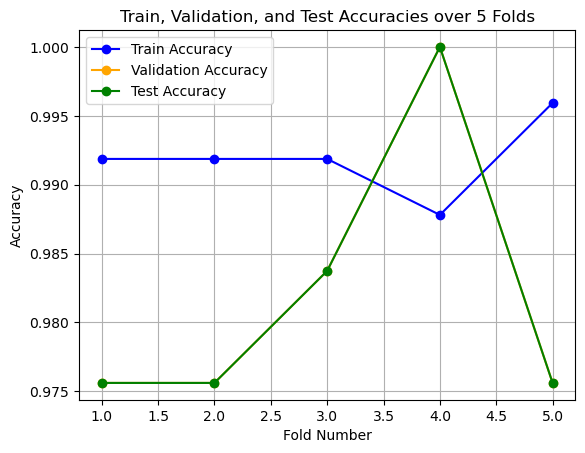

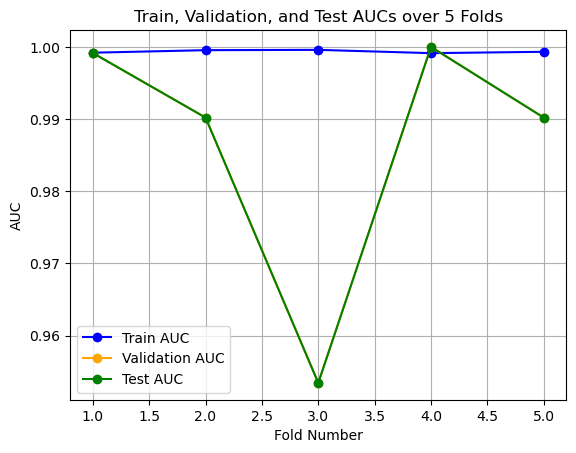

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # SVM model
    model = SVC(probability=True)

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()


Fold 1:
Train Accuracy: 0.9735772357723578
Train AUC: 0.9970654928638122
Test Accuracy: 0.926829268292683
Test AUC: 0.9509680134680134
Validation Accuracy: 0.926829268292683
Validation AUC: 0.9509680134680134


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

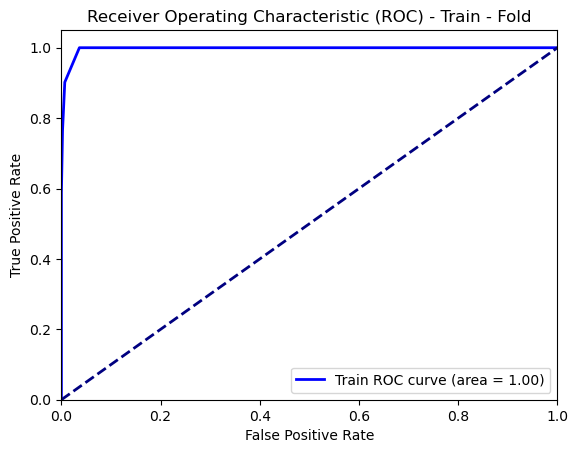

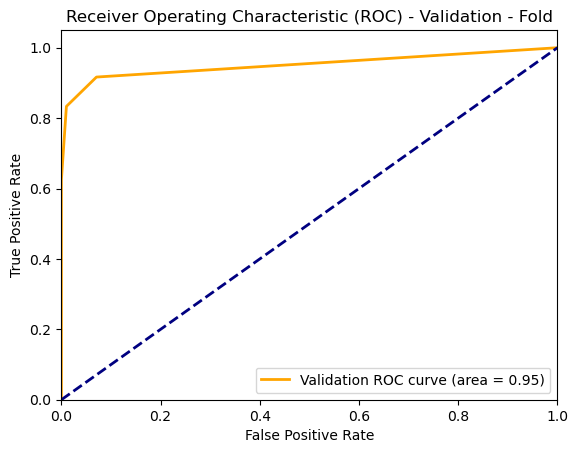

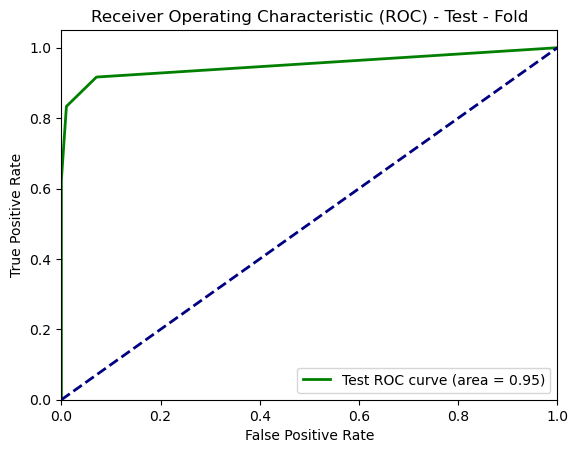

Confusion matrix, without normalization


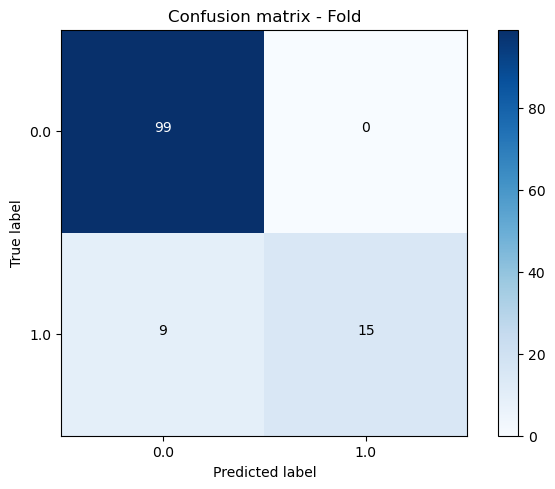

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        99
         1.0       1.00      0.62      0.77        24

    accuracy                           0.93       123
   macro avg       0.96      0.81      0.86       123
weighted avg       0.93      0.93      0.92       123

Fold 2:
Train Accuracy: 0.975609756097561
Train AUC: 0.9972243060765191
Test Accuracy: 0.959349593495935
Test AUC: 0.955944055944056
Validation Accuracy: 0.959349593495935
Validation AUC: 0.955944055944056


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

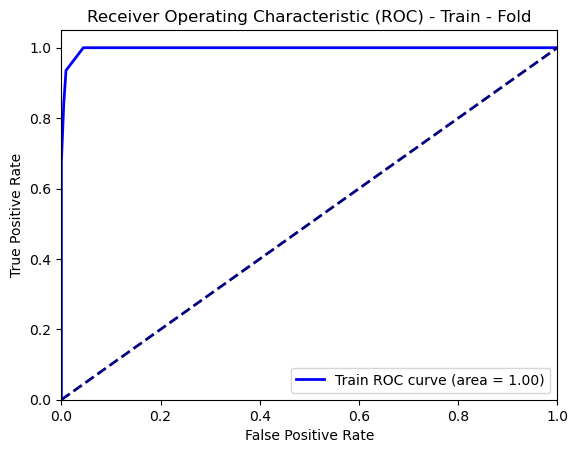

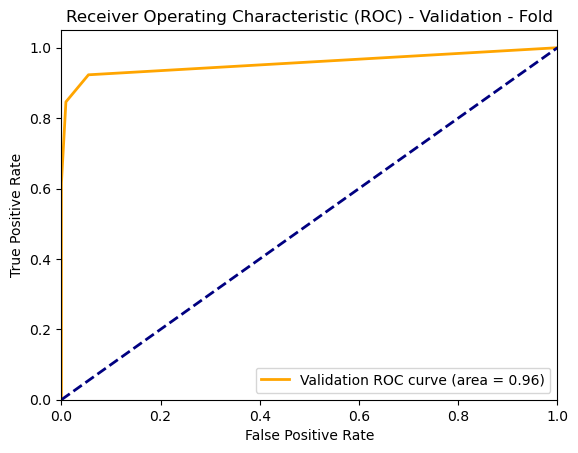

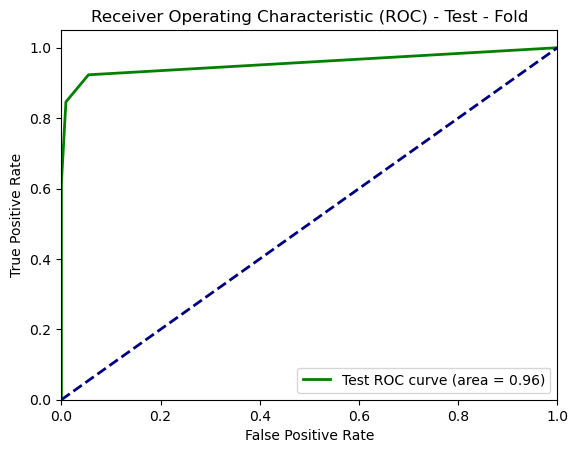

Confusion matrix, without normalization


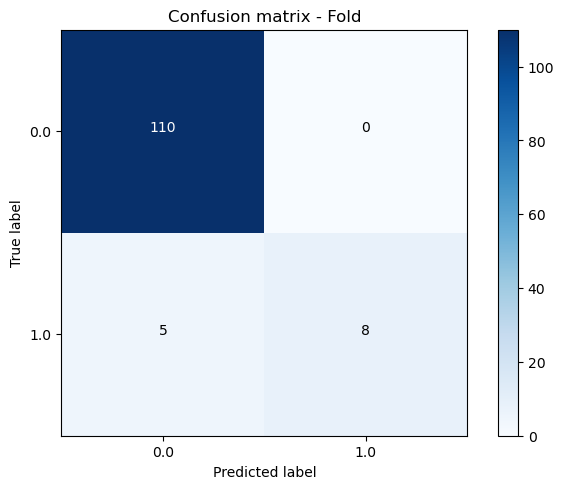

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       110
         1.0       1.00      0.62      0.76        13

    accuracy                           0.96       123
   macro avg       0.98      0.81      0.87       123
weighted avg       0.96      0.96      0.95       123

Fold 3:
Train Accuracy: 0.975609756097561
Train AUC: 0.9980019980019981
Test Accuracy: 0.967479674796748
Test AUC: 0.9538288288288287
Validation Accuracy: 0.967479674796748
Validation AUC: 0.9538288288288287


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

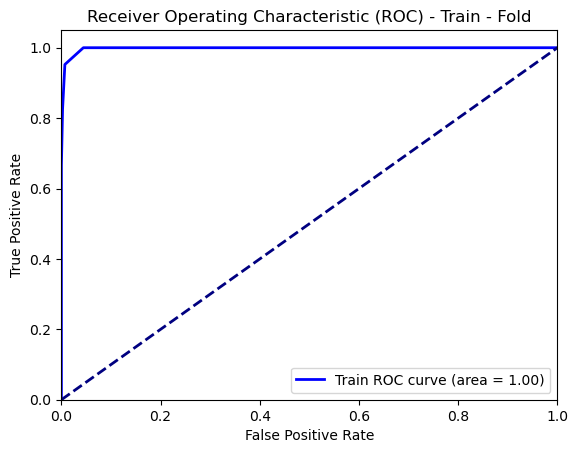

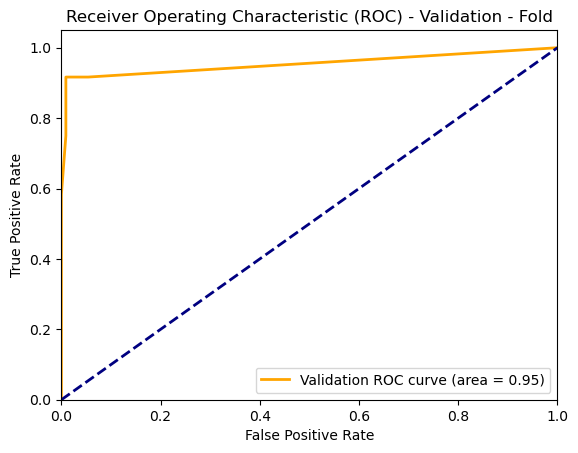

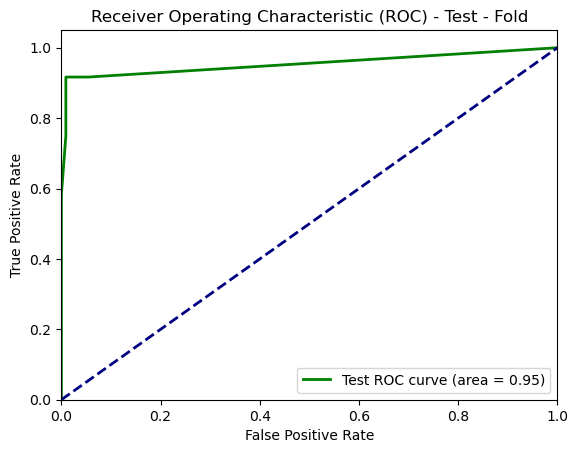

Confusion matrix, without normalization


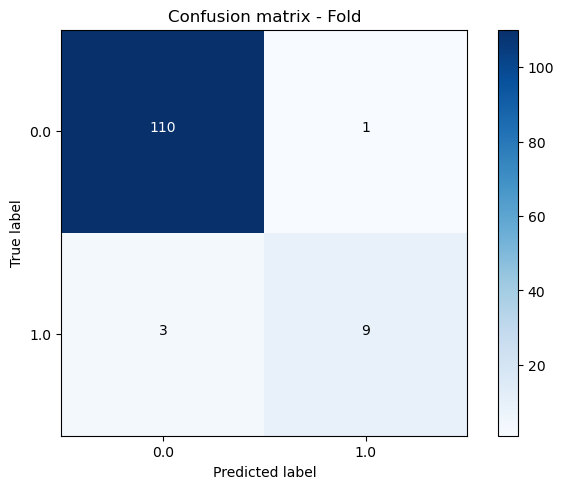

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       111
         1.0       0.90      0.75      0.82        12

    accuracy                           0.97       123
   macro avg       0.94      0.87      0.90       123
weighted avg       0.97      0.97      0.97       123

Fold 4:
Train Accuracy: 0.9715447154471545
Train AUC: 0.996324081020255
Test Accuracy: 0.983739837398374
Test AUC: 0.9594405594405595
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9594405594405595


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

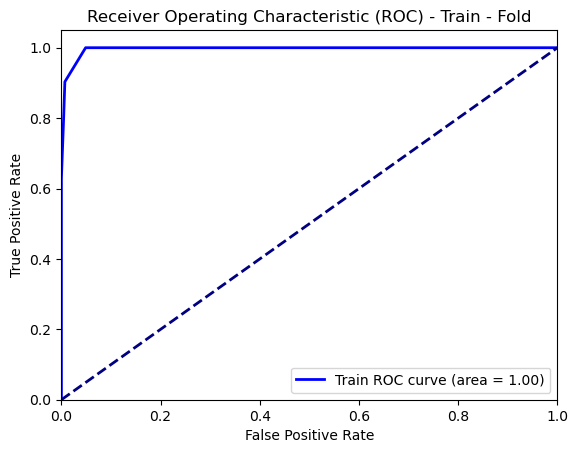

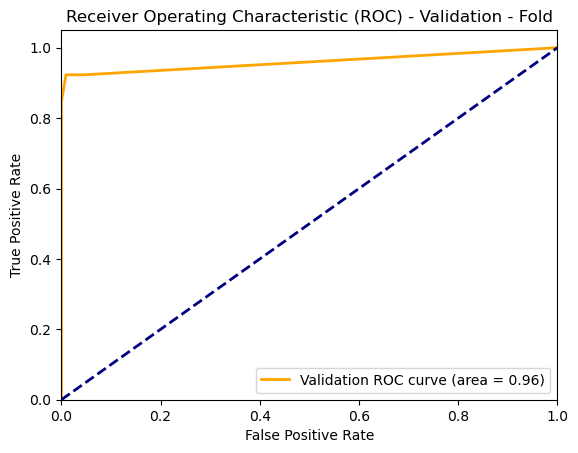

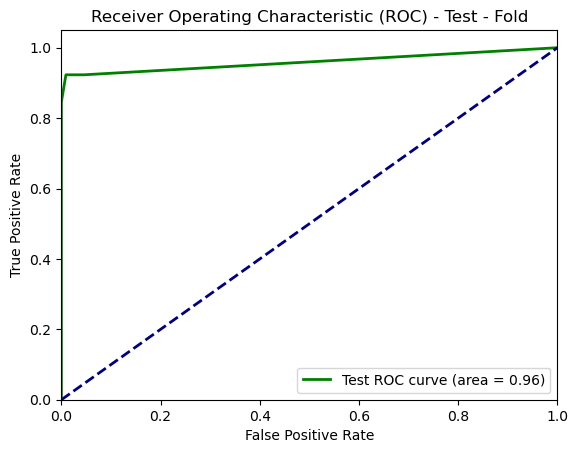

Confusion matrix, without normalization


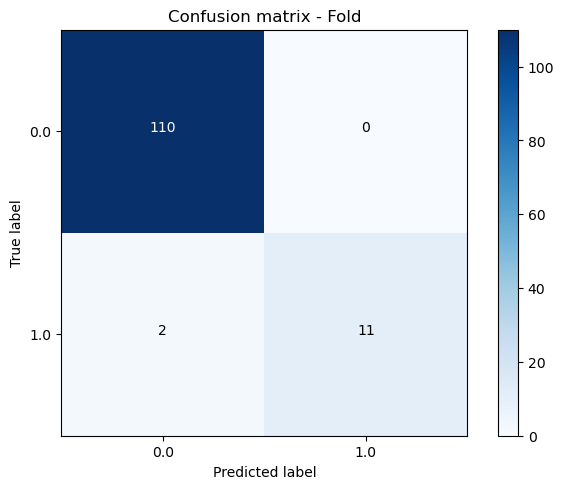

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 5:
Train Accuracy: 0.9695121951219512
Train AUC: 0.996642910727682
Test Accuracy: 0.967479674796748
Test AUC: 0.9587412587412587
Validation Accuracy: 0.967479674796748
Validation AUC: 0.9587412587412587


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

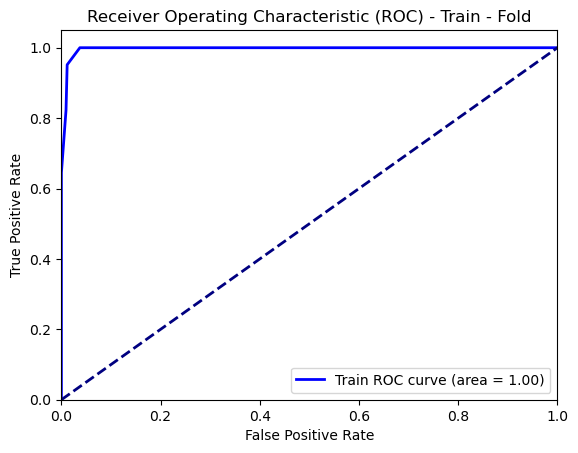

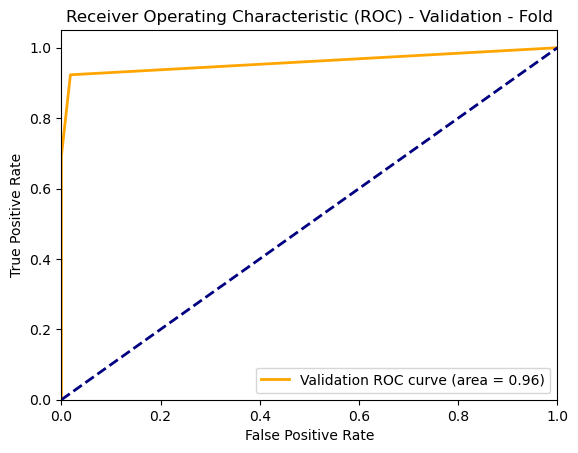

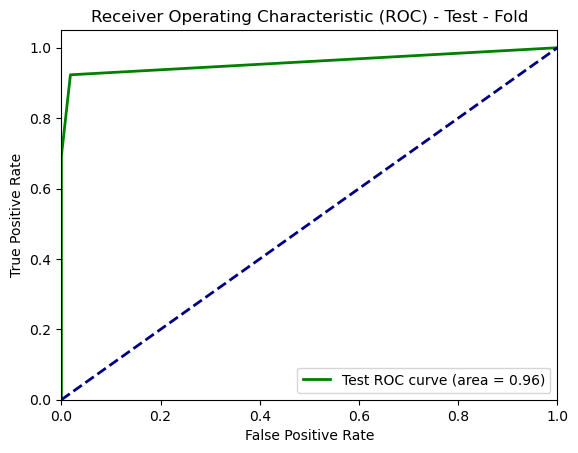

Confusion matrix, without normalization


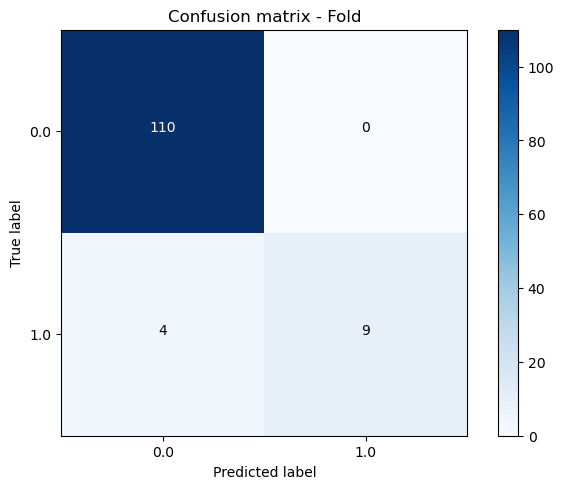

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       110
         1.0       1.00      0.69      0.82        13

    accuracy                           0.97       123
   macro avg       0.98      0.85      0.90       123
weighted avg       0.97      0.97      0.96       123

Average Train Accuracy: 0.9731707317073172
Average Validation Accuracy: 0.9609756097560975
Average Test Accuracy: 0.9609756097560975
Average Train AUC: 0.9970517577380533
Average Validation AUC: 0.9557845432845433
Average Test AUC: 0.9557845432845433


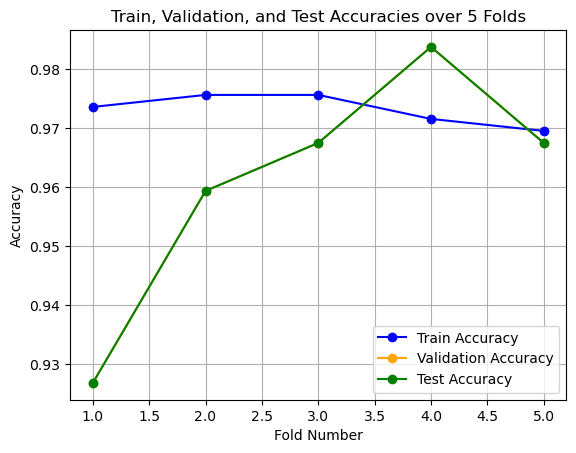

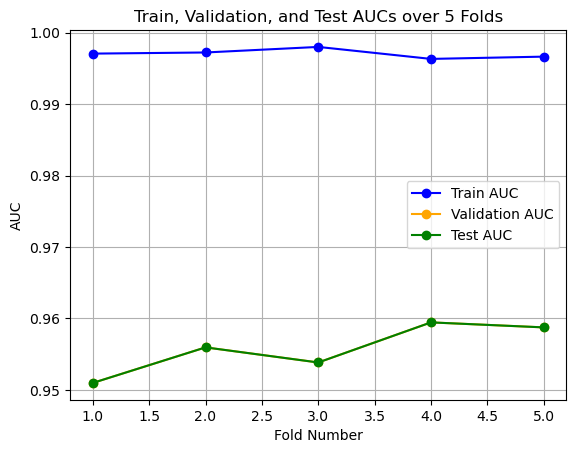

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # KNN model
    model = KNeighborsClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()


Fold 1:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.991869918699187
Test AUC: 0.9995791245791247
Validation Accuracy: 0.991869918699187
Validation AUC: 0.9995791245791247


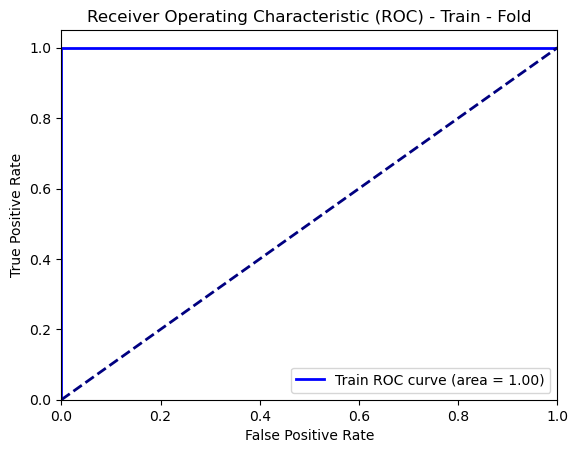

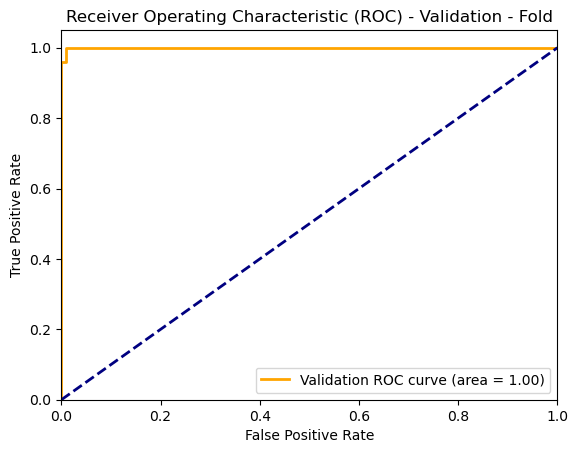

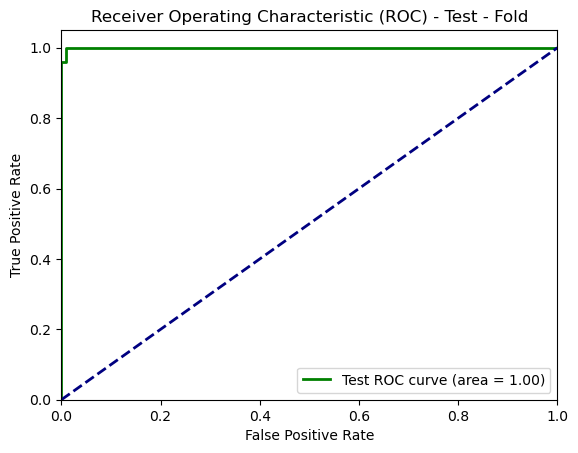

Confusion matrix, without normalization


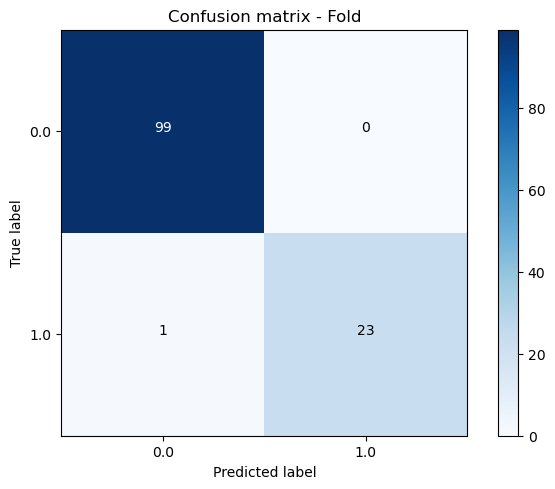

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        99
         1.0       1.00      0.96      0.98        24

    accuracy                           0.99       123
   macro avg       0.99      0.98      0.99       123
weighted avg       0.99      0.99      0.99       123

Fold 2:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.983739837398374
Test AUC: 0.983916083916084
Validation Accuracy: 0.983739837398374
Validation AUC: 0.983916083916084


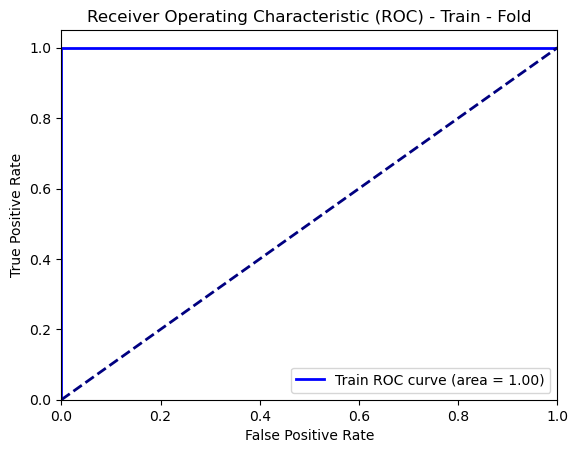

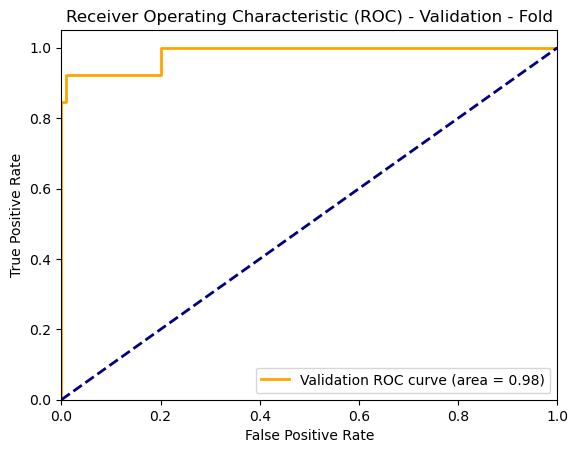

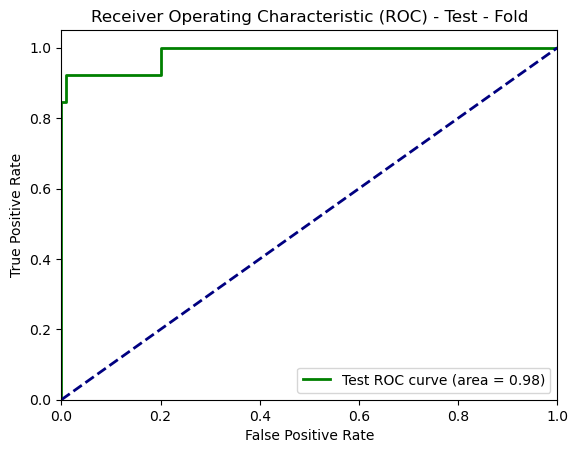

Confusion matrix, without normalization


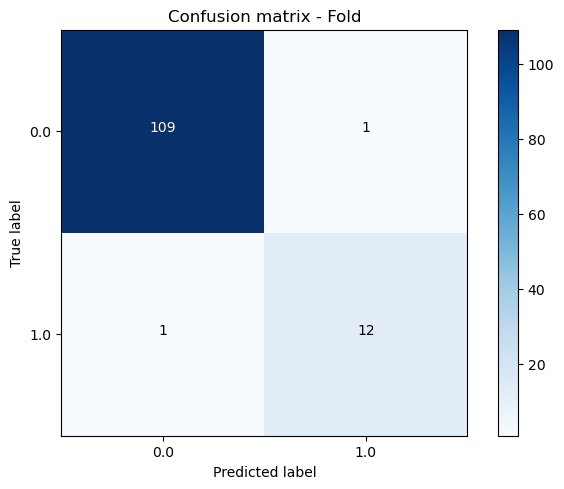

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       110
         1.0       0.92      0.92      0.92        13

    accuracy                           0.98       123
   macro avg       0.96      0.96      0.96       123
weighted avg       0.98      0.98      0.98       123

Fold 3:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.983739837398374
Test AUC: 0.9249249249249248
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9249249249249248


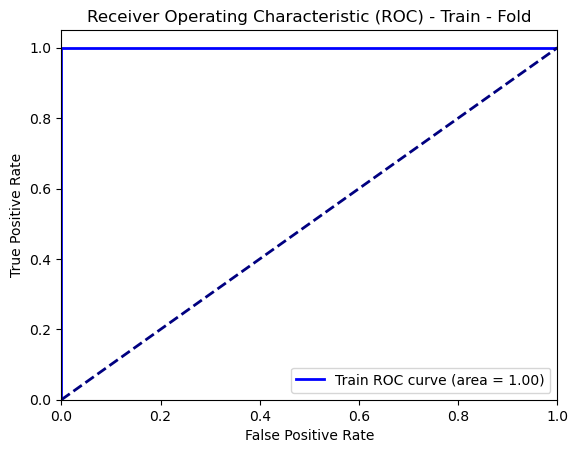

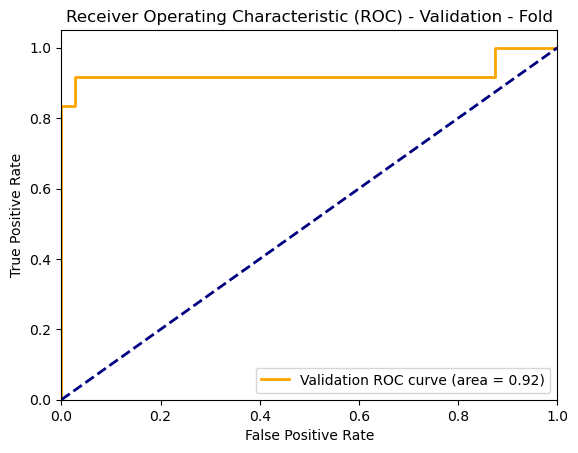

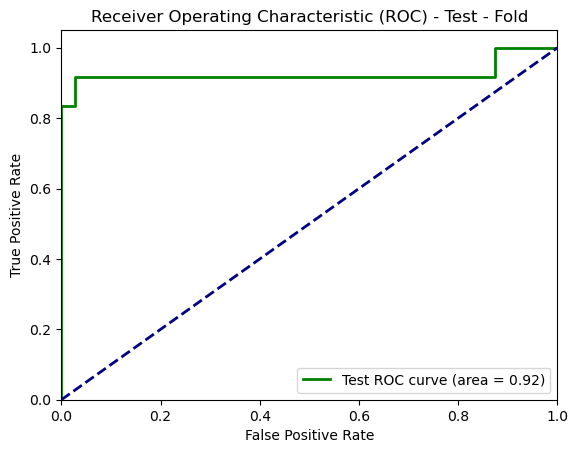

Confusion matrix, without normalization


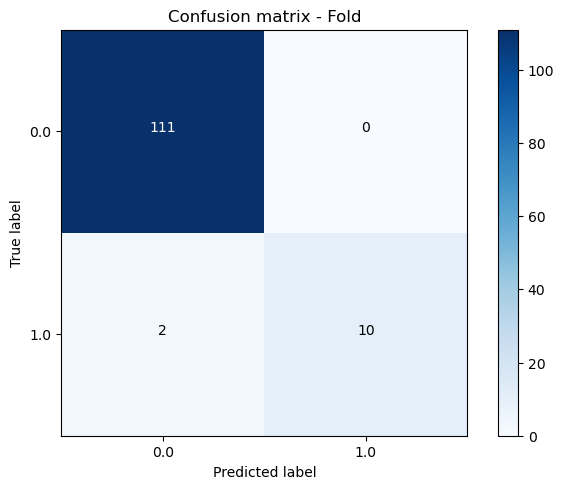

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       111
         1.0       1.00      0.83      0.91        12

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 4:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 1.0
Test AUC: 1.0
Validation Accuracy: 1.0
Validation AUC: 1.0


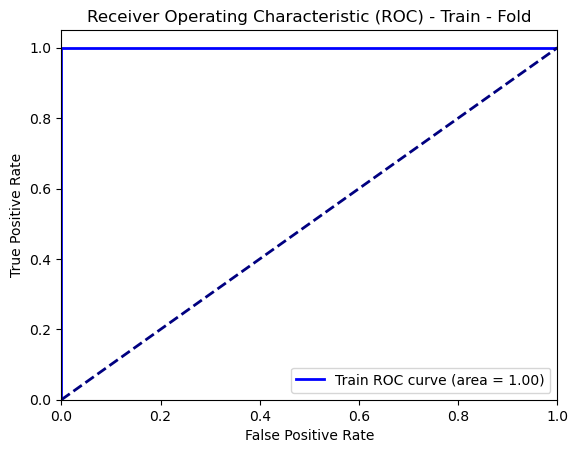

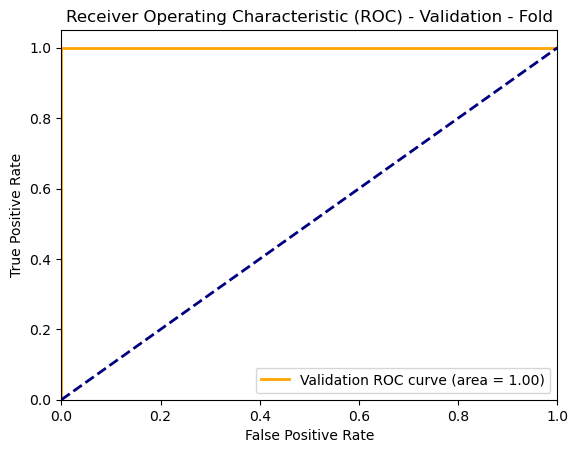

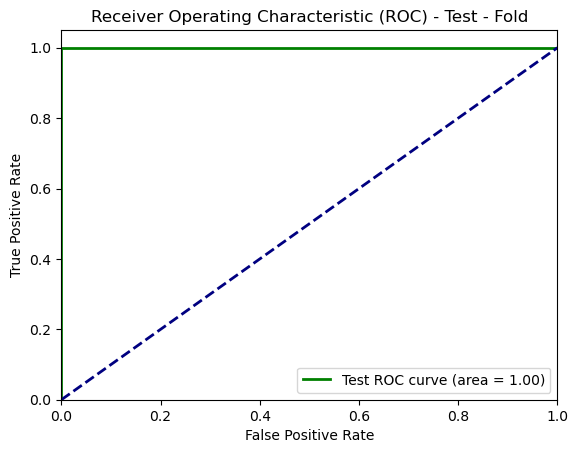

Confusion matrix, without normalization


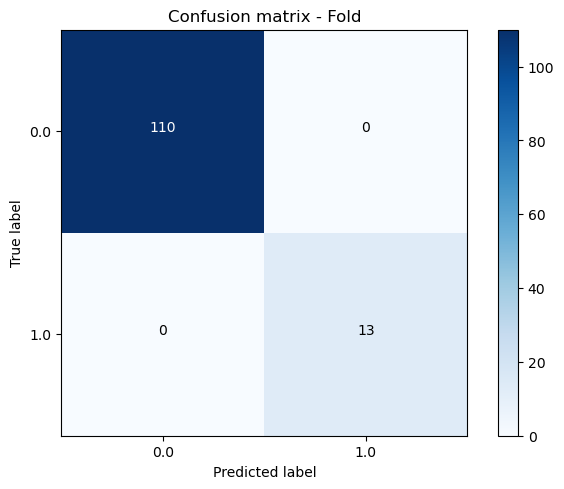

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

Fold 5:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.959349593495935
Test AUC: 0.9923076923076923
Validation Accuracy: 0.959349593495935
Validation AUC: 0.9923076923076923


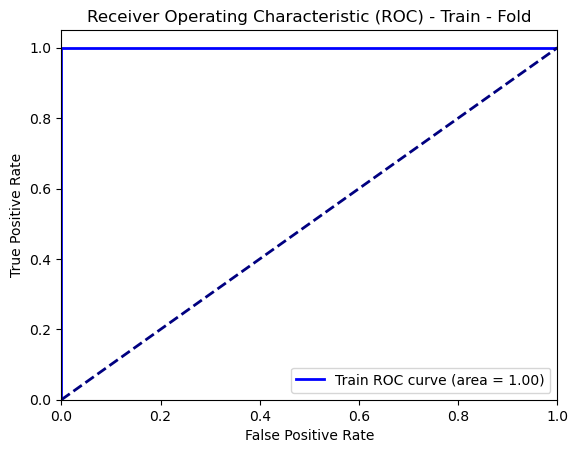

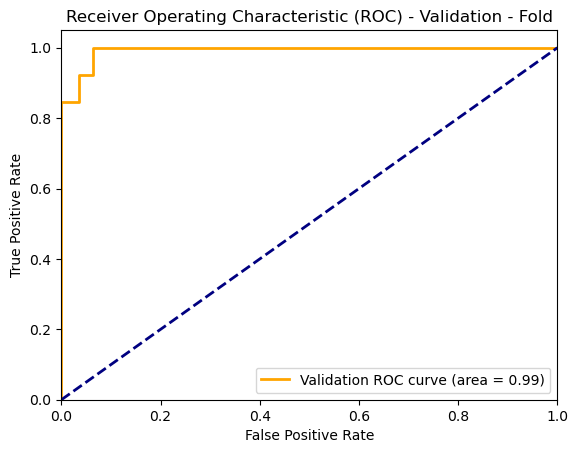

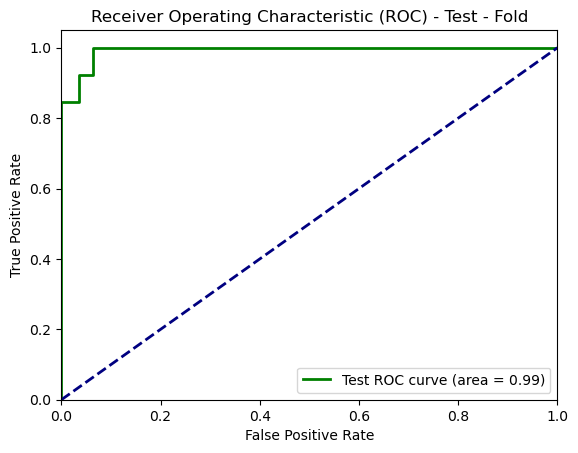

Confusion matrix, without normalization


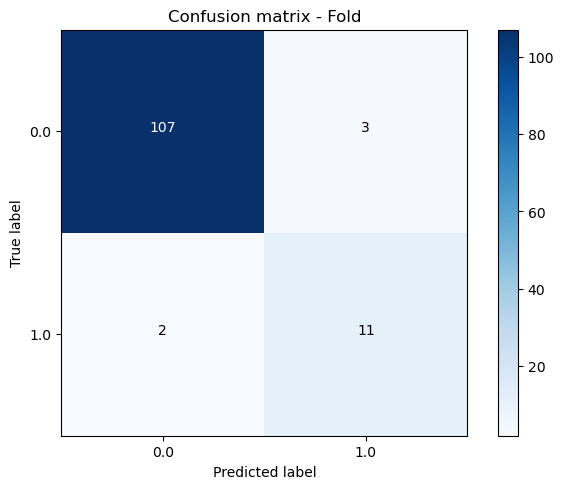

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       110
         1.0       0.79      0.85      0.81        13

    accuracy                           0.96       123
   macro avg       0.88      0.91      0.90       123
weighted avg       0.96      0.96      0.96       123

Average Train Accuracy: 1.0
Average Validation Accuracy: 0.983739837398374
Average Test Accuracy: 0.983739837398374
Average Train AUC: 1.0
Average Validation AUC: 0.9801455651455651
Average Test AUC: 0.9801455651455651


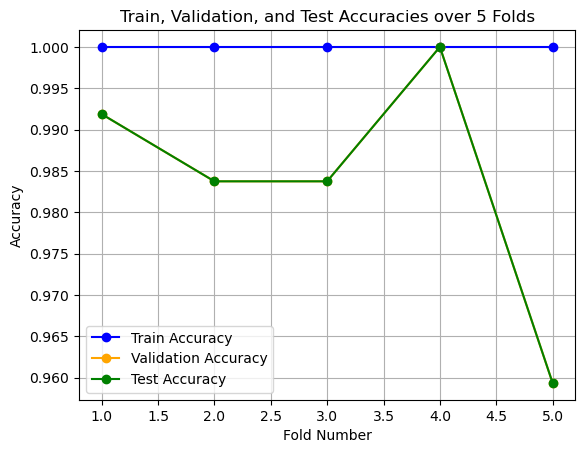

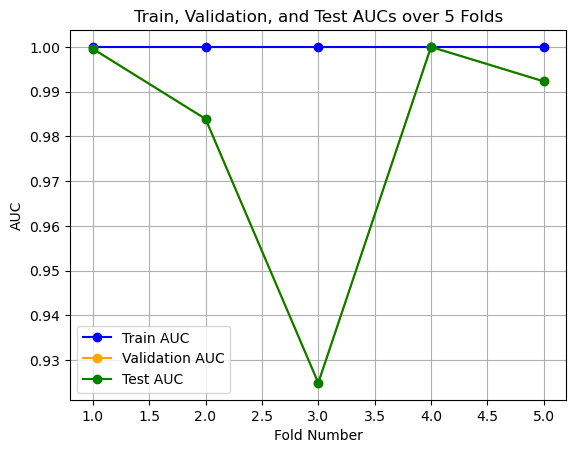

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()


Fold 1:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.9512195121951219
Test AUC: 0.9869528619528619
Validation Accuracy: 0.9512195121951219
Validation AUC: 0.9869528619528619


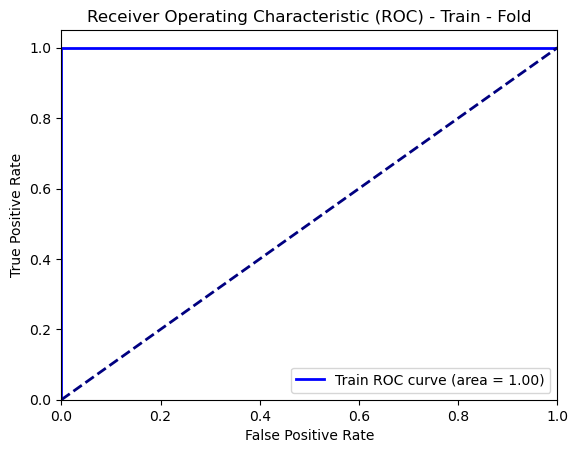

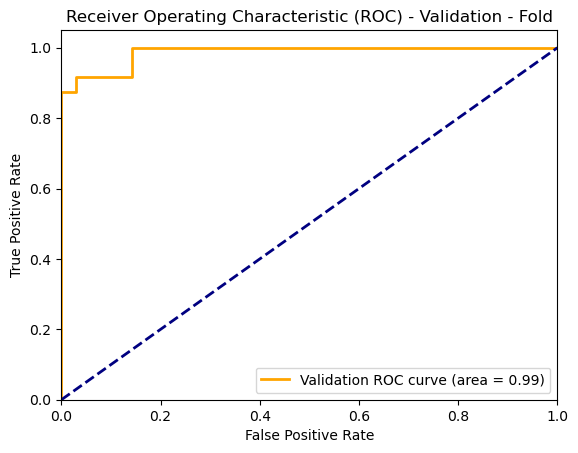

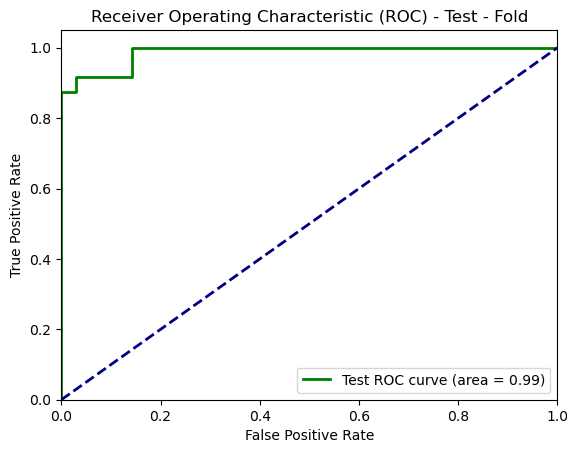

Confusion matrix, without normalization


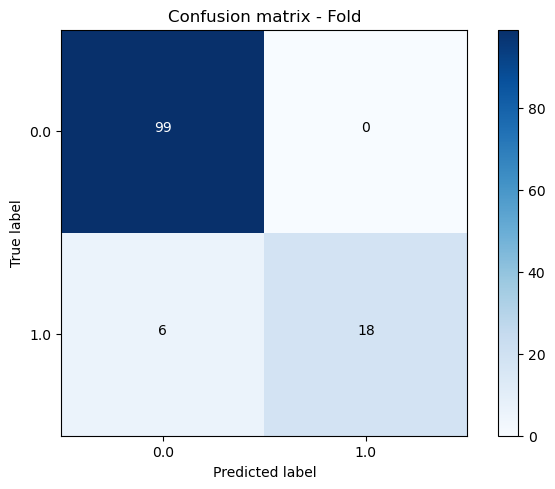

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        99
         1.0       1.00      0.75      0.86        24

    accuracy                           0.95       123
   macro avg       0.97      0.88      0.91       123
weighted avg       0.95      0.95      0.95       123

Fold 2:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.991869918699187
Test AUC: 0.9692307692307692
Validation Accuracy: 0.991869918699187
Validation AUC: 0.9692307692307692


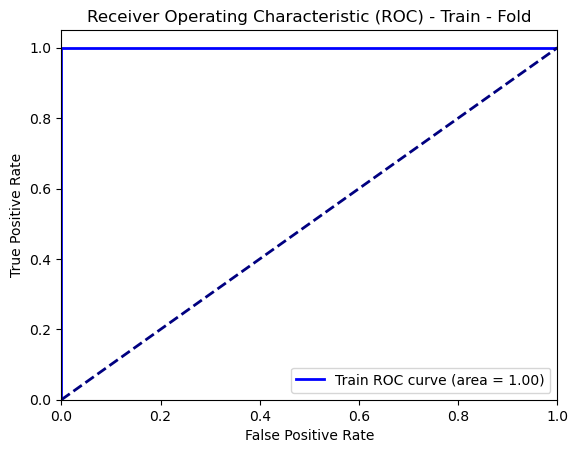

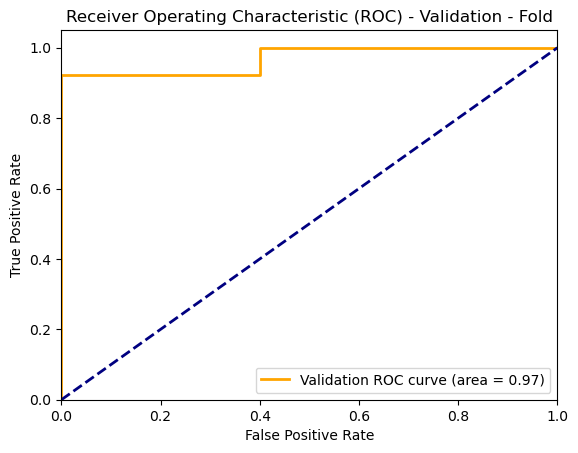

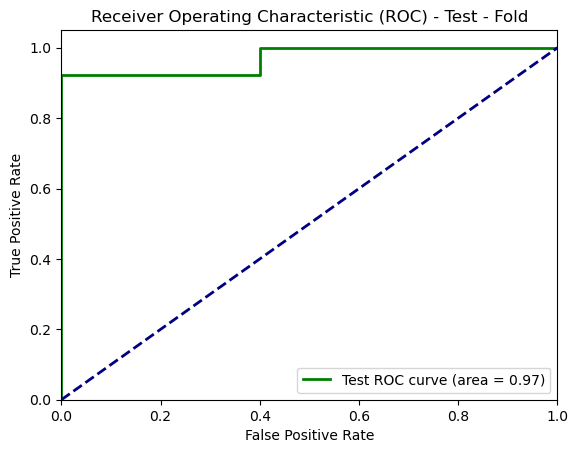

Confusion matrix, without normalization


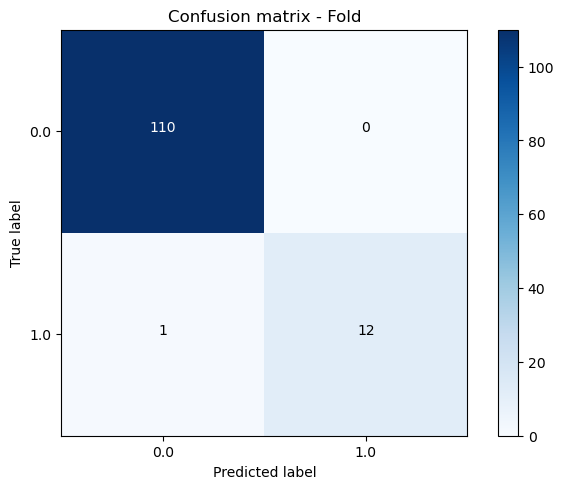

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       110
         1.0       1.00      0.92      0.96        13

    accuracy                           0.99       123
   macro avg       1.00      0.96      0.98       123
weighted avg       0.99      0.99      0.99       123

Fold 3:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.991869918699187
Test AUC: 0.963963963963964
Validation Accuracy: 0.991869918699187
Validation AUC: 0.963963963963964


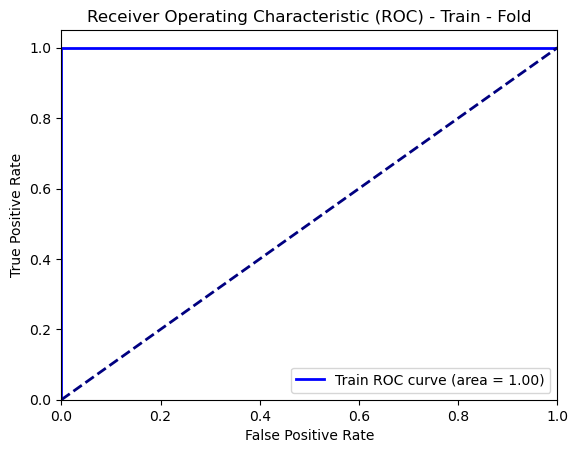

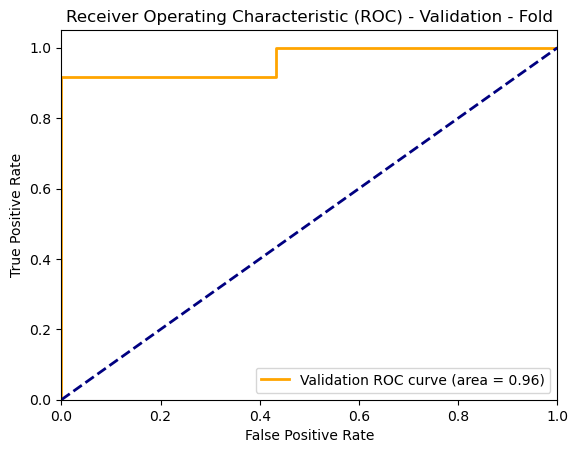

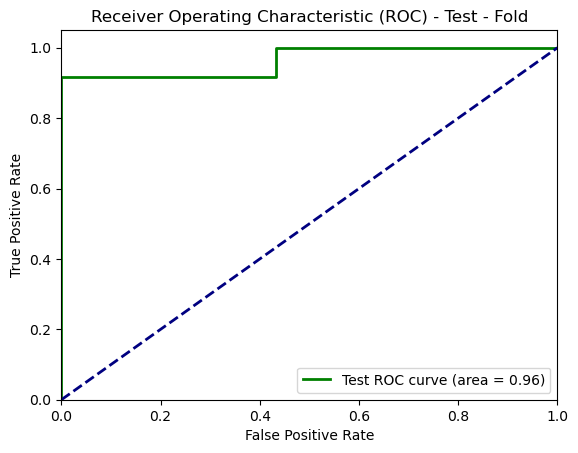

Confusion matrix, without normalization


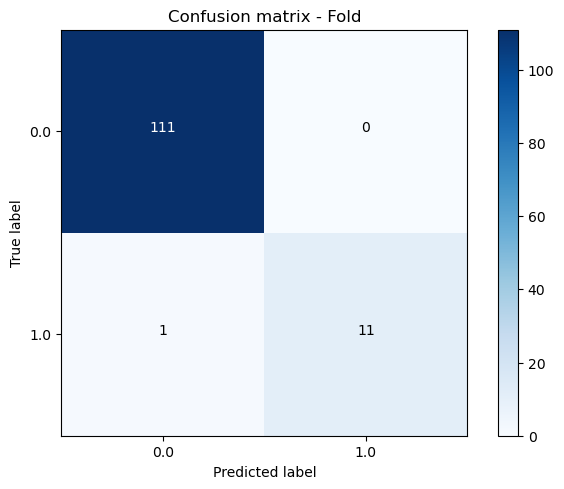

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       111
         1.0       1.00      0.92      0.96        12

    accuracy                           0.99       123
   macro avg       1.00      0.96      0.98       123
weighted avg       0.99      0.99      0.99       123

Fold 4:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.975609756097561
Test AUC: 0.9804195804195804
Validation Accuracy: 0.975609756097561
Validation AUC: 0.9804195804195804


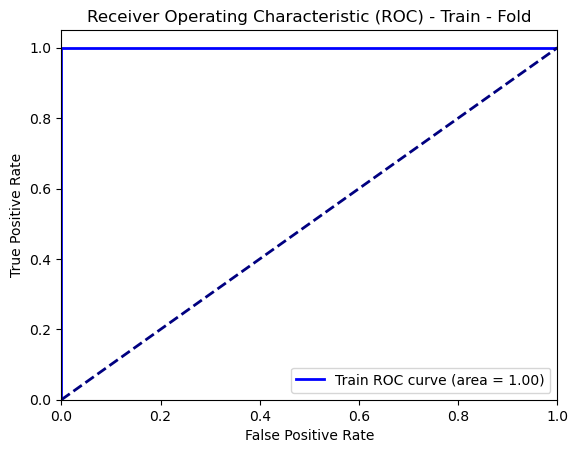

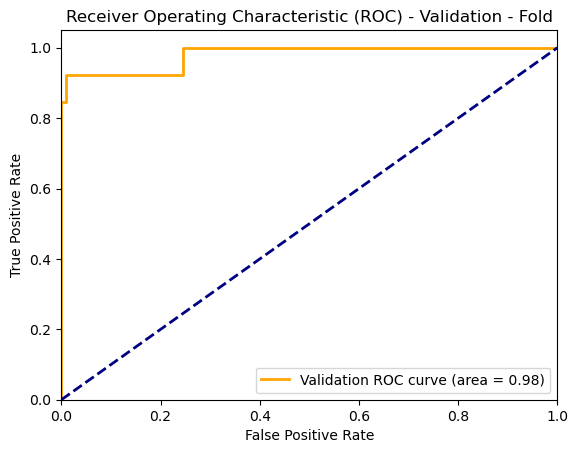

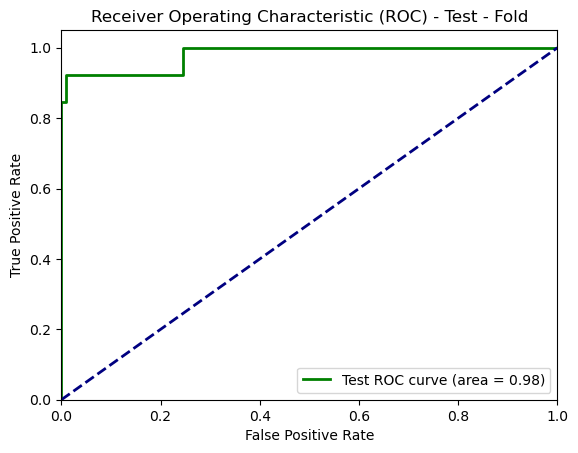

Confusion matrix, without normalization


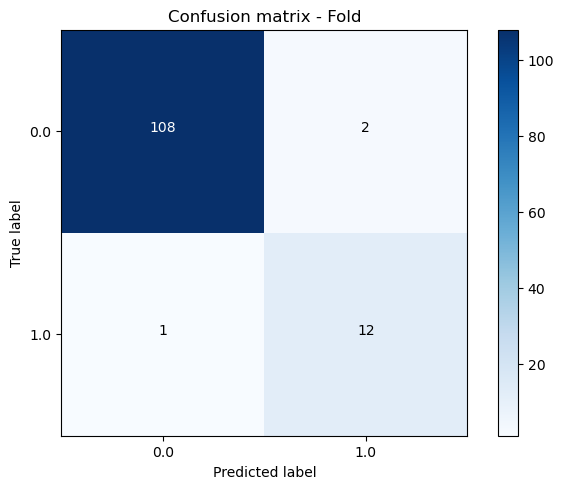

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       110
         1.0       0.86      0.92      0.89        13

    accuracy                           0.98       123
   macro avg       0.92      0.95      0.94       123
weighted avg       0.98      0.98      0.98       123

Fold 5:
Train Accuracy: 1.0
Train AUC: 1.0
Test Accuracy: 0.975609756097561
Test AUC: 0.9916083916083915
Validation Accuracy: 0.975609756097561
Validation AUC: 0.9916083916083915


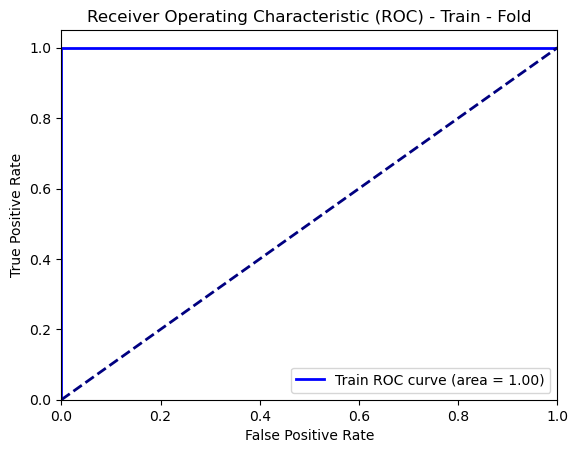

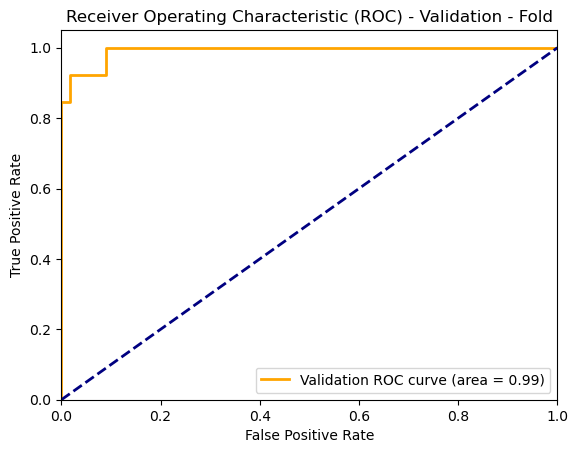

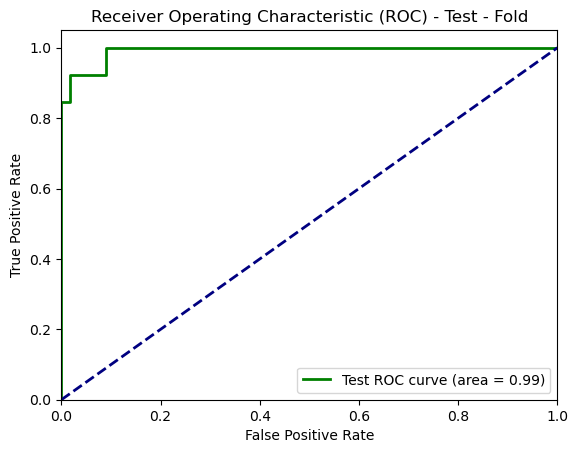

Confusion matrix, without normalization


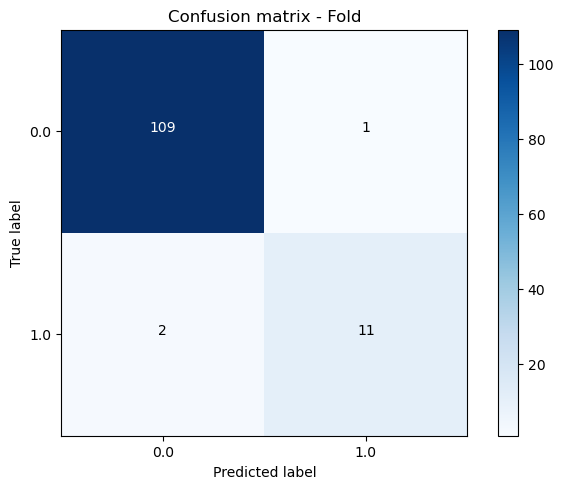

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       110
         1.0       0.92      0.85      0.88        13

    accuracy                           0.98       123
   macro avg       0.95      0.92      0.93       123
weighted avg       0.98      0.98      0.98       123

Average Train Accuracy: 1.0
Average Validation Accuracy: 0.9772357723577235
Average Test Accuracy: 0.9772357723577235
Average Train AUC: 1.0
Average Validation AUC: 0.9784351134351134
Average Test AUC: 0.9784351134351134


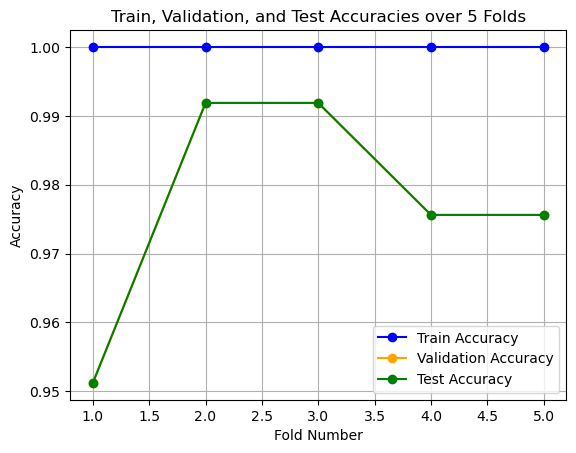

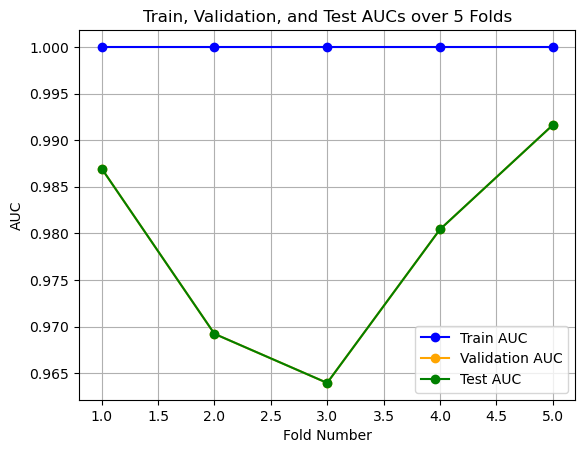

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # AdaBoost model
    model = AdaBoostClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()


Fold 1:
Train Accuracy: 0.983739837398374
Train AUC: 0.975412387177093
Test Accuracy: 0.975609756097561
Test AUC: 0.9987373737373738
Validation Accuracy: 0.975609756097561
Validation AUC: 0.9987373737373738


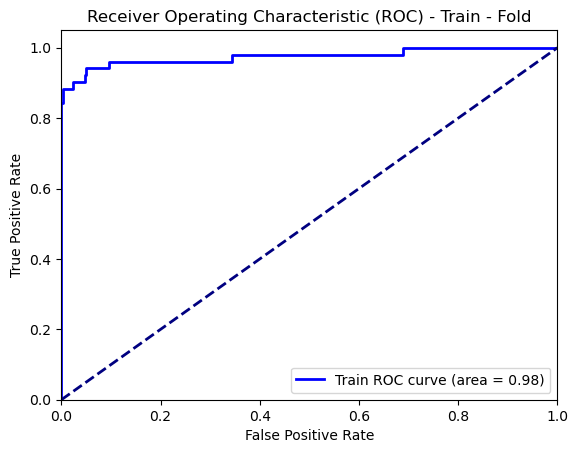

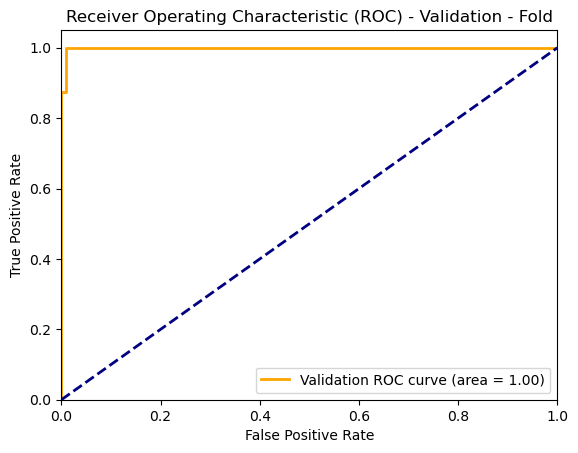

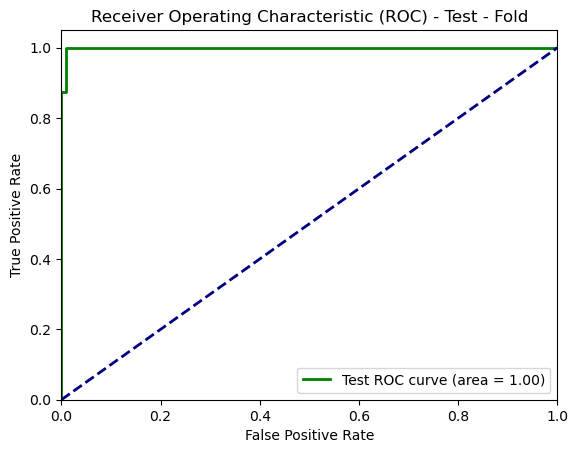

Confusion matrix, without normalization


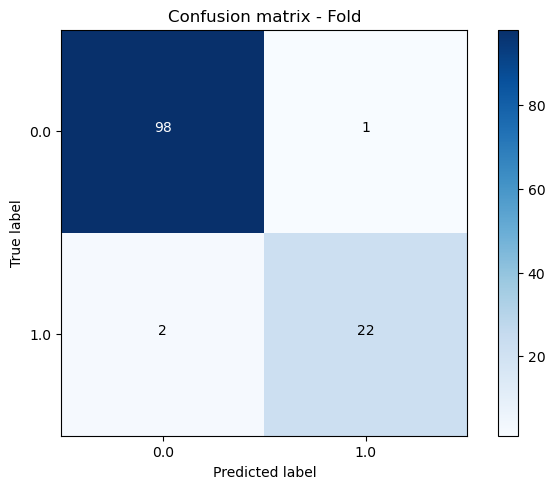

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        99
         1.0       0.96      0.92      0.94        24

    accuracy                           0.98       123
   macro avg       0.97      0.95      0.96       123
weighted avg       0.98      0.98      0.98       123

Fold 2:
Train Accuracy: 0.9857723577235772
Train AUC: 0.9832708177044261
Test Accuracy: 0.983739837398374
Test AUC: 0.9867132867132866
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9867132867132866


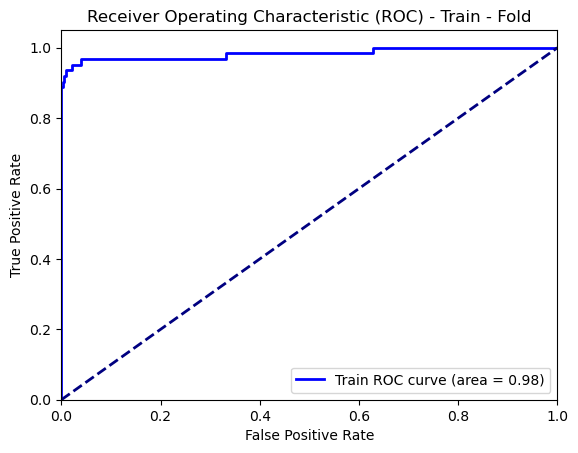

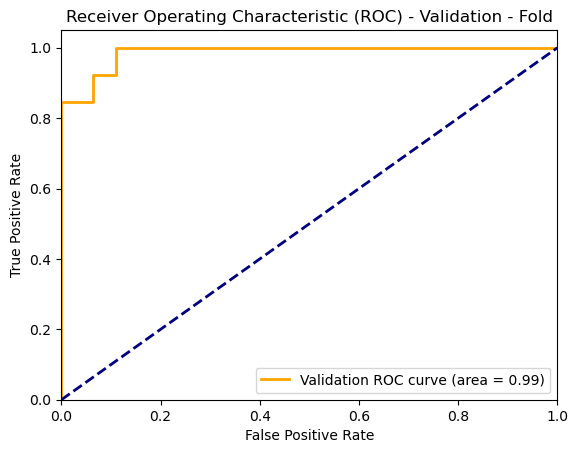

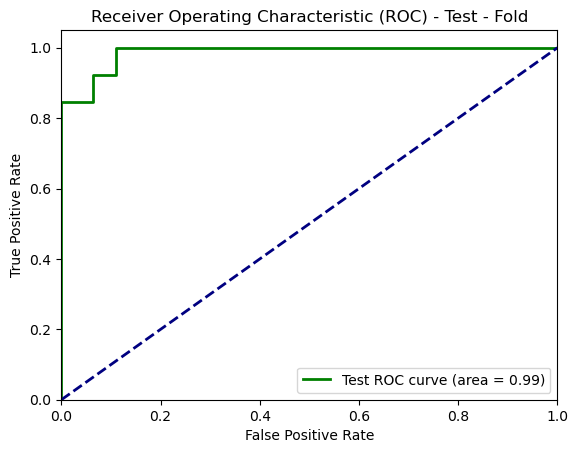

Confusion matrix, without normalization


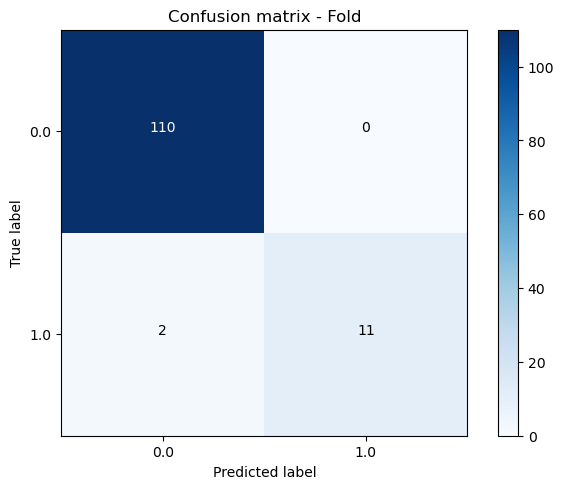

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 3:
Train Accuracy: 0.9857723577235772
Train AUC: 0.9926369926369927
Test Accuracy: 0.967479674796748
Test AUC: 0.9406906906906907
Validation Accuracy: 0.967479674796748
Validation AUC: 0.9406906906906907


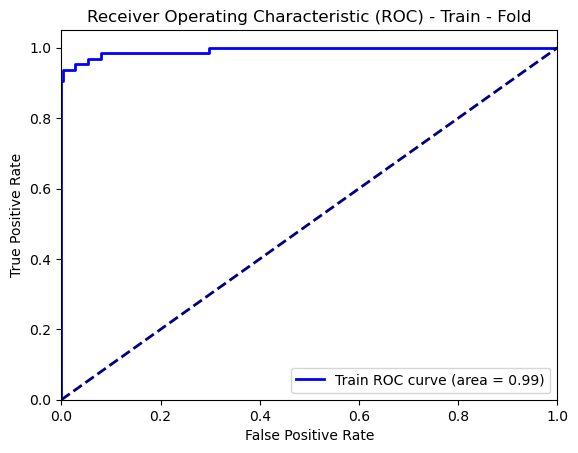

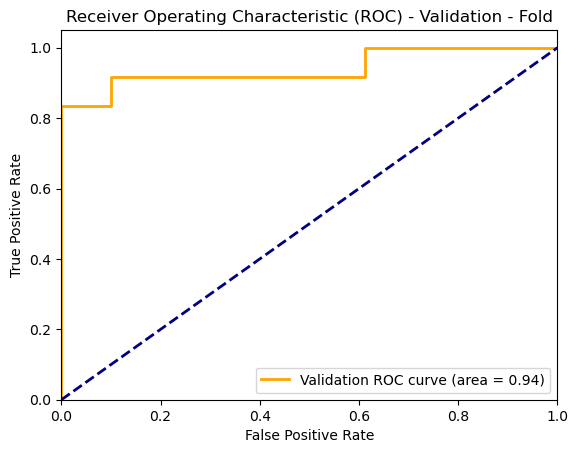

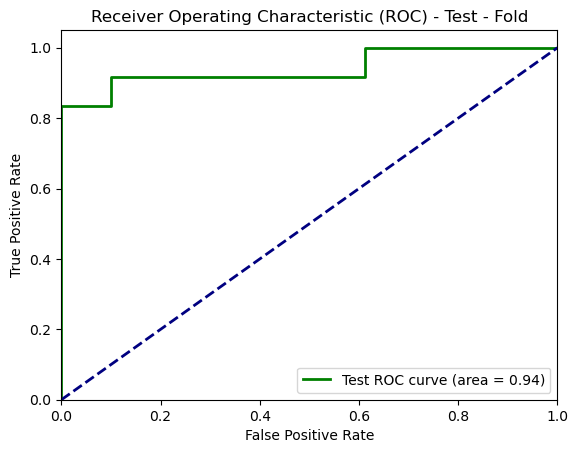

Confusion matrix, without normalization


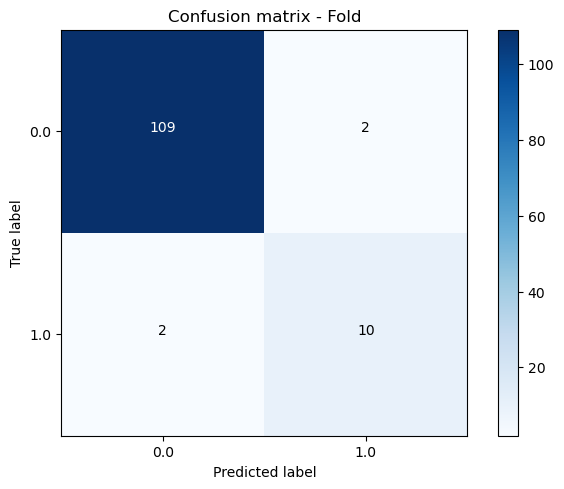

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       111
         1.0       0.83      0.83      0.83        12

    accuracy                           0.97       123
   macro avg       0.91      0.91      0.91       123
weighted avg       0.97      0.97      0.97       123

Fold 4:
Train Accuracy: 0.983739837398374
Train AUC: 0.9814328582145536
Test Accuracy: 0.983739837398374
Test AUC: 0.9986013986013986
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9986013986013986


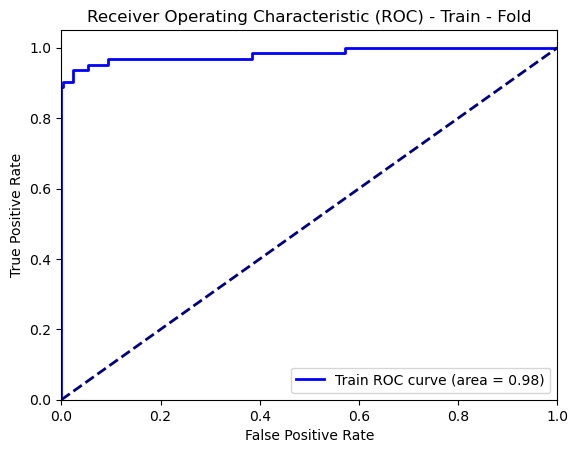

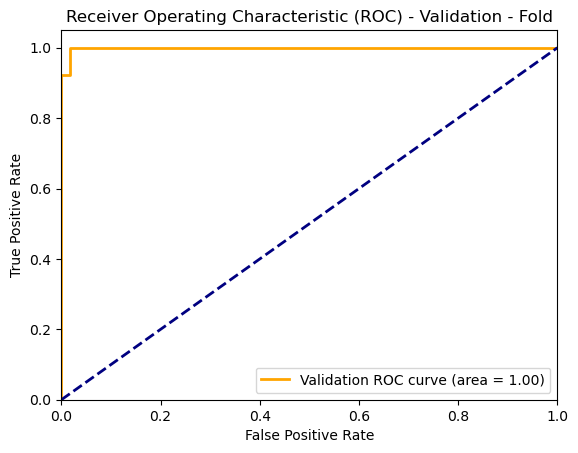

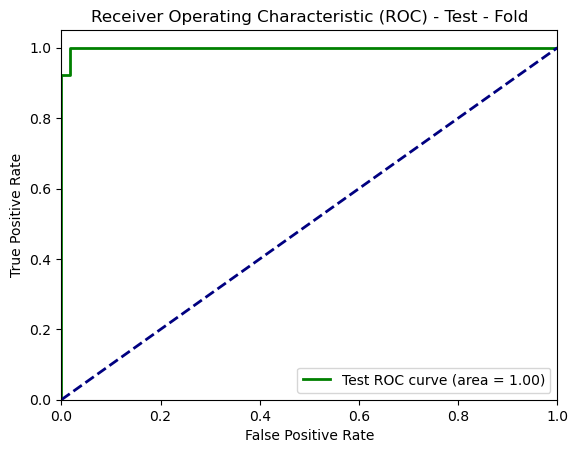

Confusion matrix, without normalization


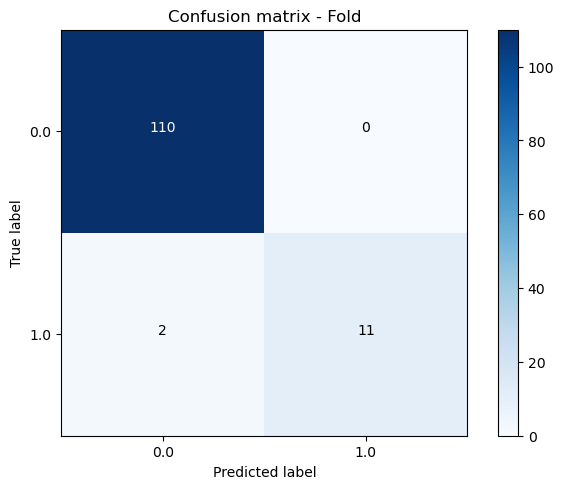

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 5:
Train Accuracy: 0.9817073170731707
Train AUC: 0.9879219804951238
Test Accuracy: 0.983739837398374
Test AUC: 0.962937062937063
Validation Accuracy: 0.983739837398374
Validation AUC: 0.962937062937063


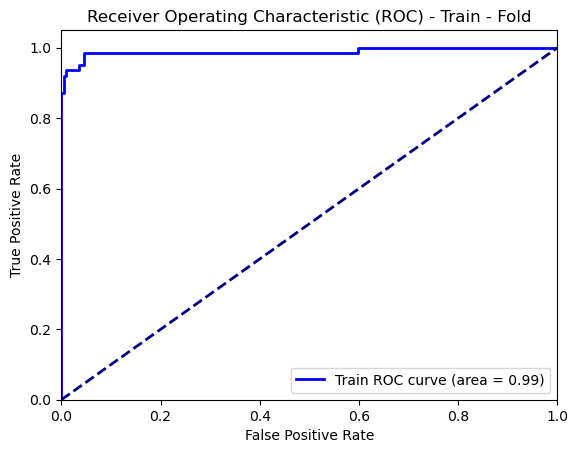

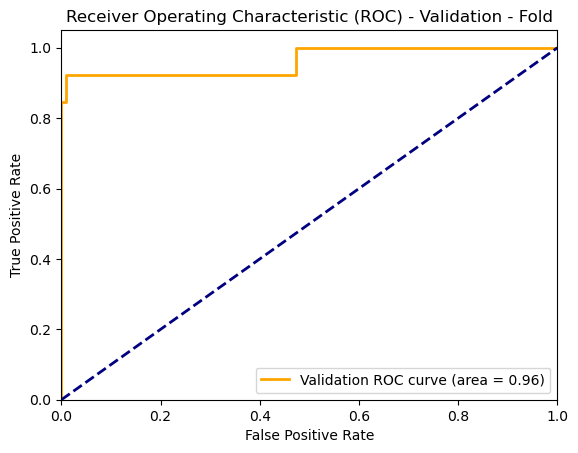

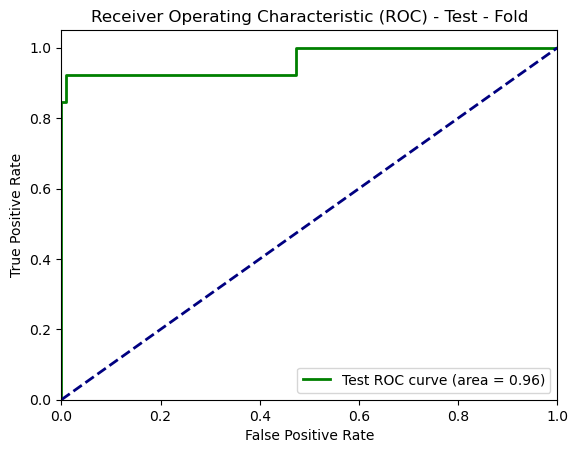

Confusion matrix, without normalization


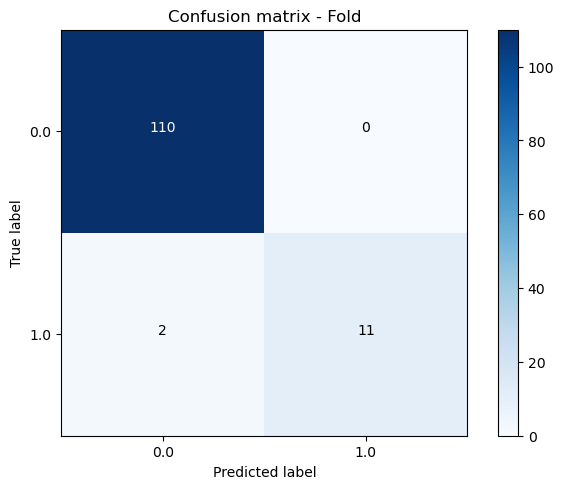

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Average Train Accuracy: 0.9841463414634146
Average Validation Accuracy: 0.9788617886178862
Average Test Accuracy: 0.9788617886178862
Average Train AUC: 0.9841350072456378
Average Validation AUC: 0.9775359625359625
Average Test AUC: 0.9775359625359625


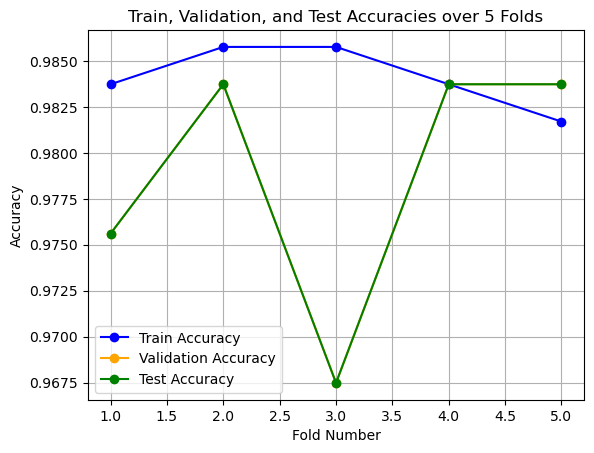

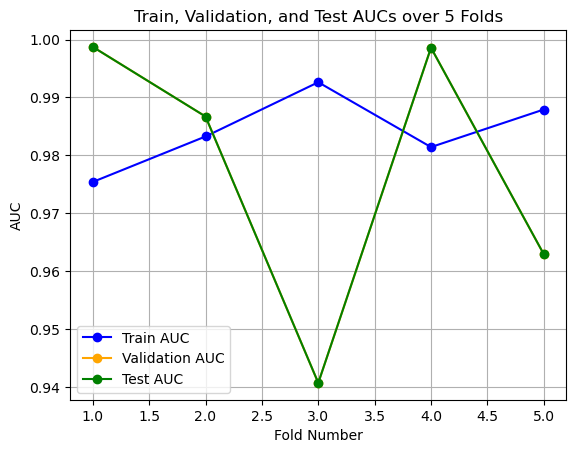

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Logistic Regression model
    model = LogisticRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()


Fold 1:
Train Accuracy: 0.983739837398374
Train AUC: 0.975412387177093
Test Accuracy: 0.975609756097561
Test AUC: 0.9987373737373738
Validation Accuracy: 0.975609756097561
Validation AUC: 0.9987373737373738


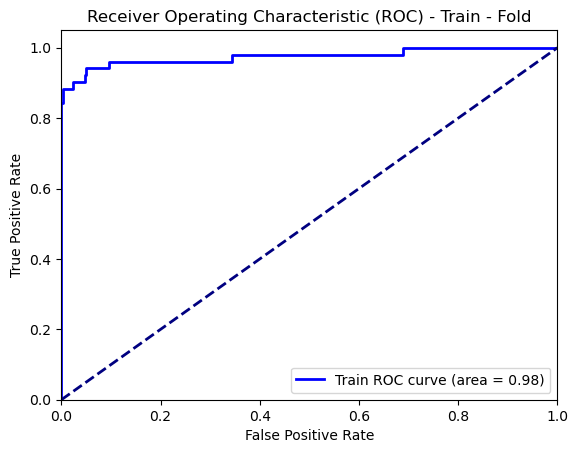

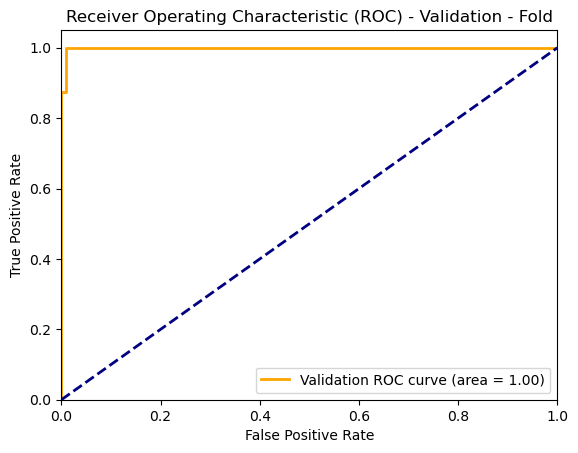

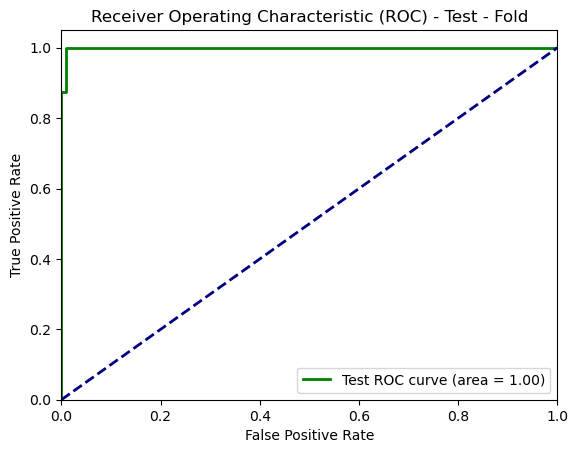

Confusion matrix, without normalization


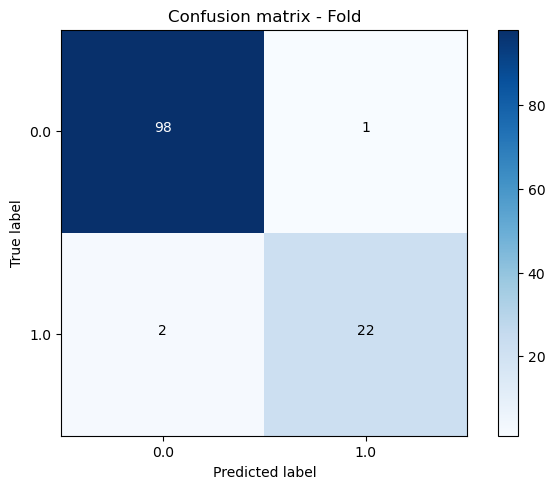

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        99
         1.0       0.96      0.92      0.94        24

    accuracy                           0.98       123
   macro avg       0.97      0.95      0.96       123
weighted avg       0.98      0.98      0.98       123

Fold 2:
Train Accuracy: 0.9857723577235772
Train AUC: 0.9832708177044261
Test Accuracy: 0.983739837398374
Test AUC: 0.9867132867132866
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9867132867132866


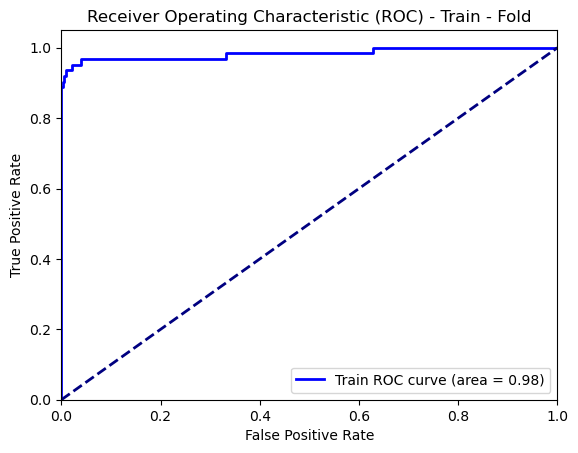

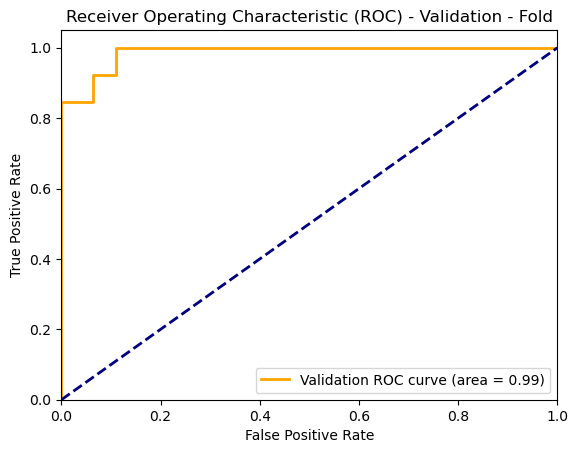

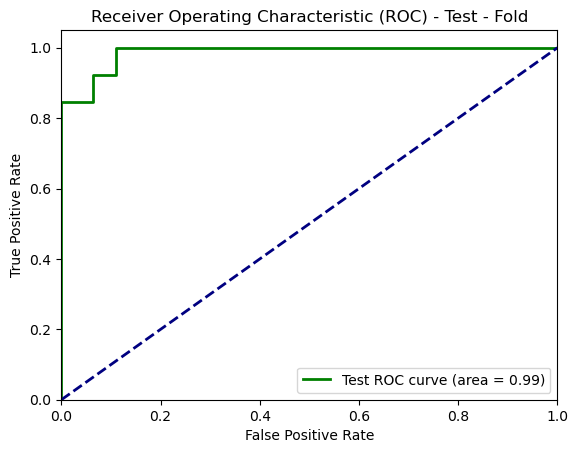

Confusion matrix, without normalization


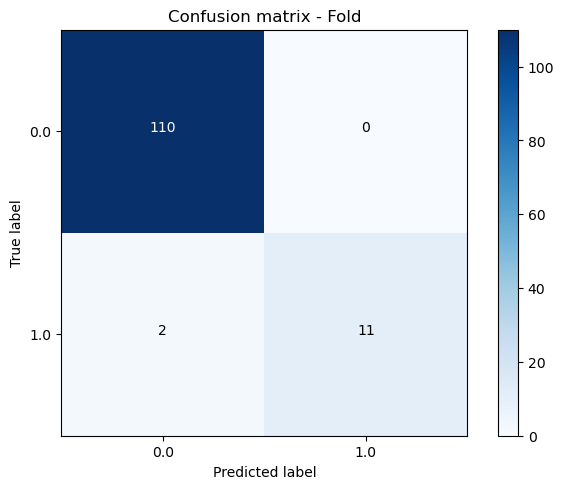

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 3:
Train Accuracy: 0.9857723577235772
Train AUC: 0.9926369926369927
Test Accuracy: 0.967479674796748
Test AUC: 0.9406906906906907
Validation Accuracy: 0.967479674796748
Validation AUC: 0.9406906906906907


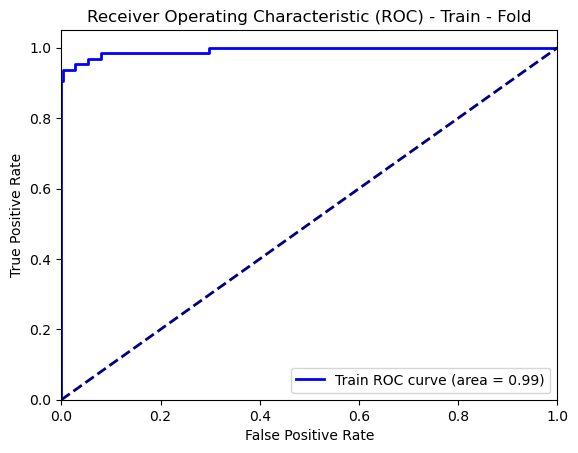

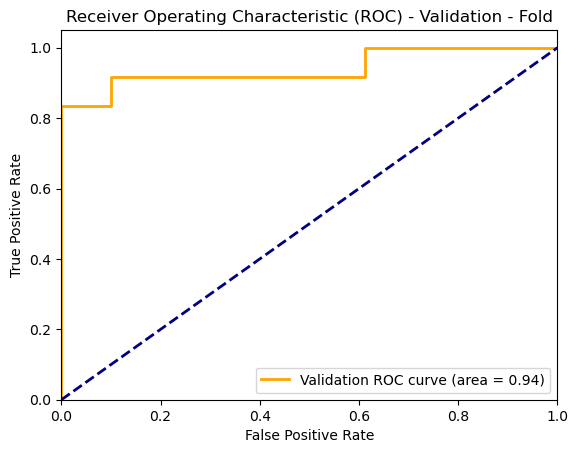

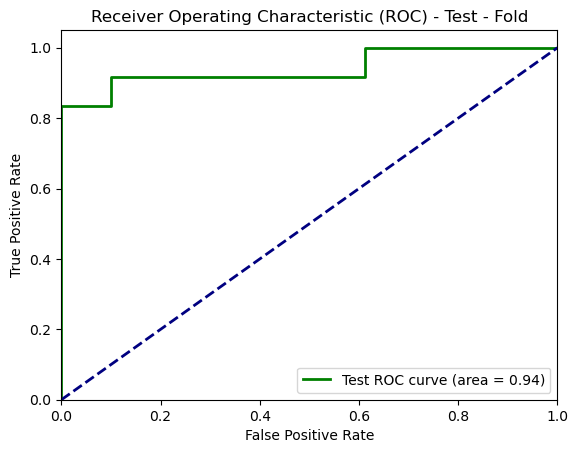

Confusion matrix, without normalization


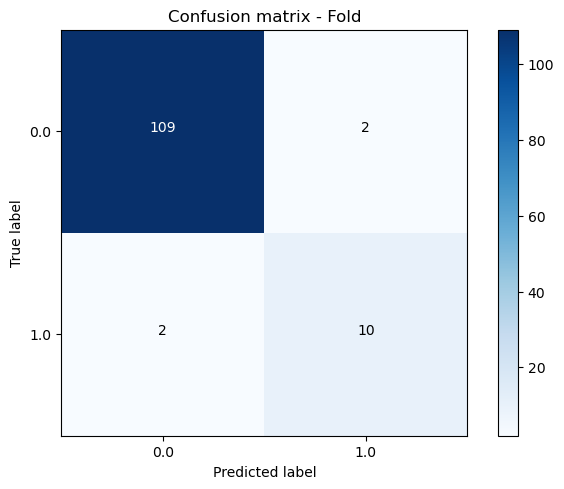

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       111
         1.0       0.83      0.83      0.83        12

    accuracy                           0.97       123
   macro avg       0.91      0.91      0.91       123
weighted avg       0.97      0.97      0.97       123

Fold 4:
Train Accuracy: 0.983739837398374
Train AUC: 0.9814328582145536
Test Accuracy: 0.983739837398374
Test AUC: 0.9986013986013986
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9986013986013986


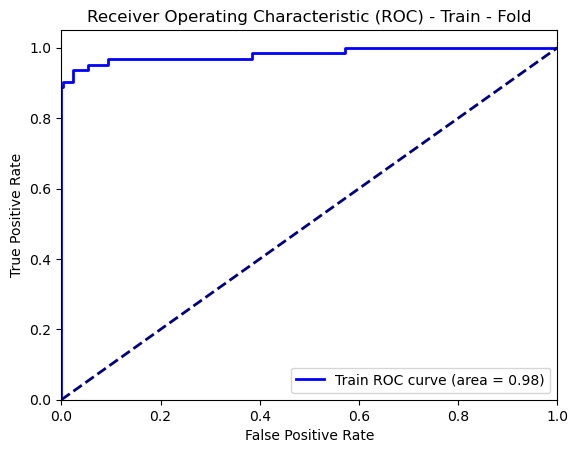

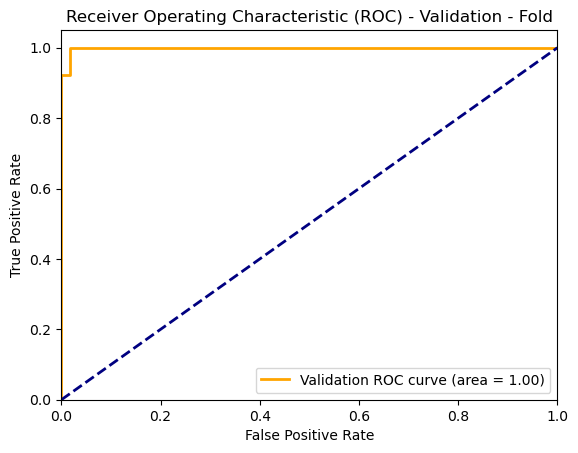

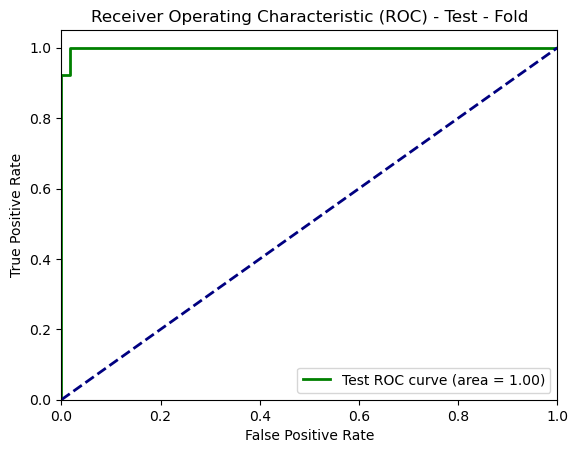

Confusion matrix, without normalization


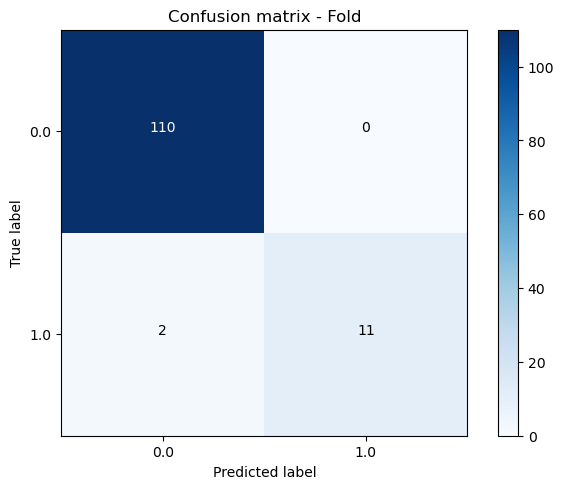

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 5:
Train Accuracy: 0.9817073170731707
Train AUC: 0.9879219804951238
Test Accuracy: 0.983739837398374
Test AUC: 0.962937062937063
Validation Accuracy: 0.983739837398374
Validation AUC: 0.962937062937063


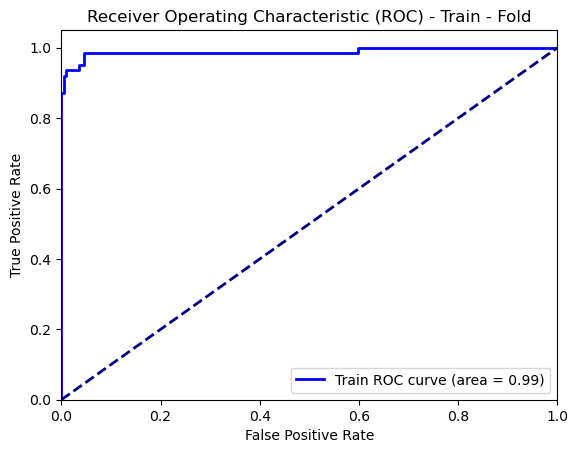

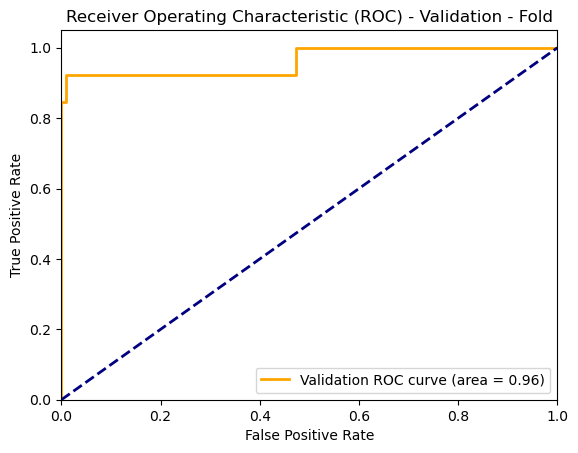

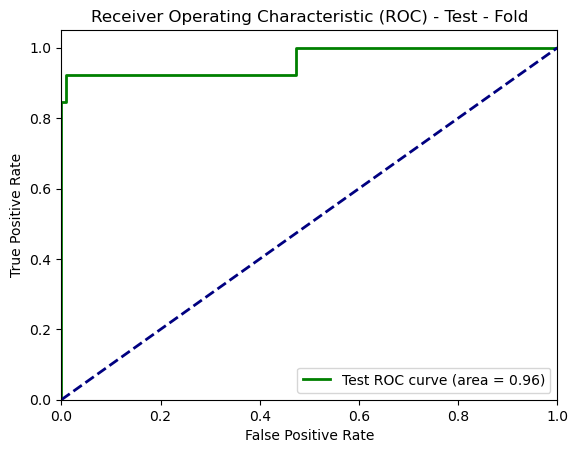

Confusion matrix, without normalization


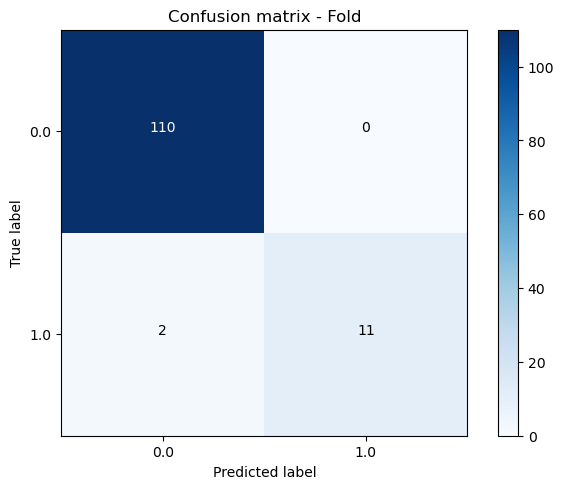

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Average Train Accuracy: 0.9841463414634146
Average Validation Accuracy: 0.9788617886178862
Average Test Accuracy: 0.9788617886178862
Average Train AUC: 0.9841350072456378
Average Validation AUC: 0.9775359625359625
Average Test AUC: 0.9775359625359625
Class 0.0 - Average Precision: 0.9816821106821108, Average Recall: 0.9943761943761944, Average F1-Score: 0.9879759156141065
Class 1.0 - Average Precision: 0.9579710144927536, Average Recall: 0.8576923076923076, Average F1-Score: 0.9039007092198581


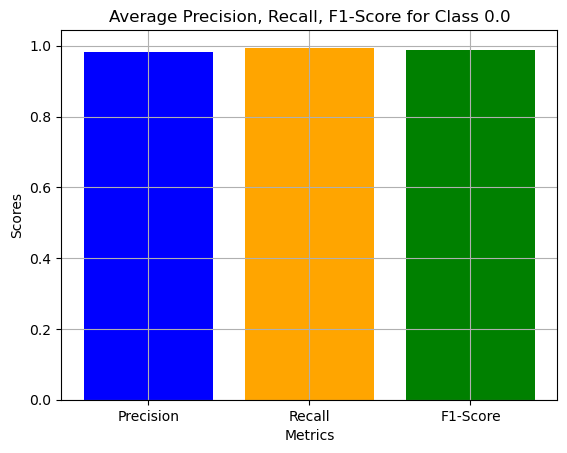

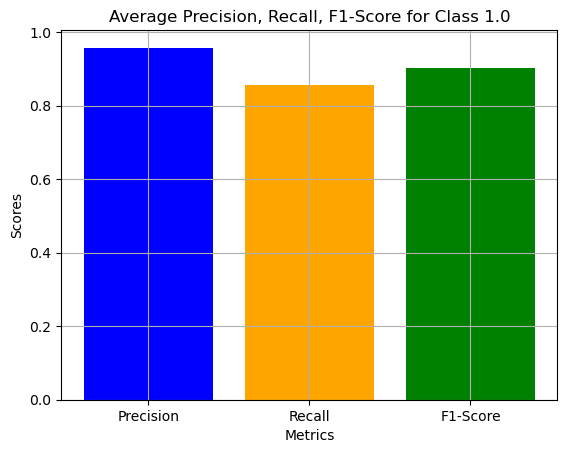

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []
precision_list = []
recall_list = []
f1_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Logistic Regression model
    model = LogisticRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred, output_dict=True)
    class_report_list.append(class_report)

    # Extract precision, recall, f1-score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, test_pred, average=None)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y_test, test_pred))
    print("=" * 50)

# Calculate and print average accuracies, AUCs, precision, recall, and f1-scores
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

for i, cls in enumerate(np.unique(y)):
    print(f"Class {cls} - Average Precision: {avg_precision[i]}, Average Recall: {avg_recall[i]}, Average F1-Score: {avg_f1[i]}")

# Create bar charts for average precision, recall, f1-score for each class
classes = np.unique(y)

for i, cls in enumerate(classes):
    x = np.arange(3)
    metrics = [avg_precision[i], avg_recall[i], avg_f1[i]]
    labels = ['Precision', 'Recall', 'F1-Score']

    plt.figure()
    plt.bar(x, metrics, color=['blue', 'orange', 'green'])
    plt.xticks(x, labels)
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title(f'Average Precision, Recall, F1-Score for Class {cls}')
    plt.grid(True)
    plt.show()


Original number of features: 12
Reduced number of features after PCA: 11
Fold 1:
Train Accuracy: 0.9898373983739838
Train AUC: 0.989329064959317
Test Accuracy: 0.967479674796748
Test AUC: 0.9945286195286195
Validation Accuracy: 0.967479674796748
Validation AUC: 0.9945286195286195


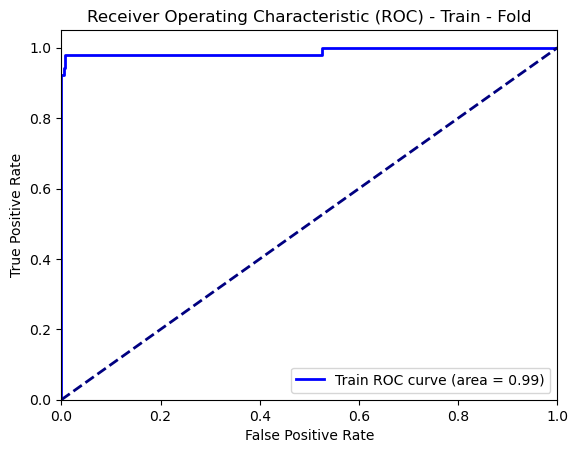

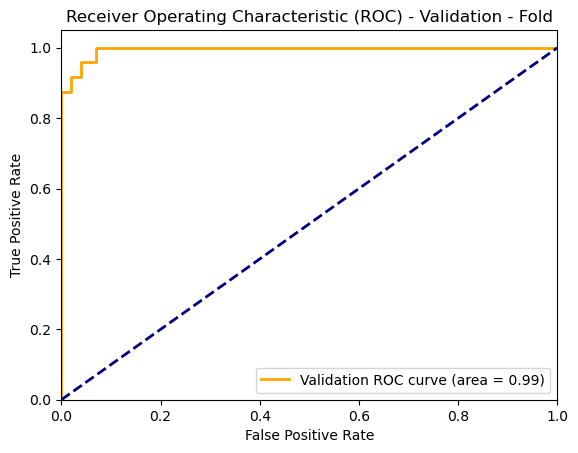

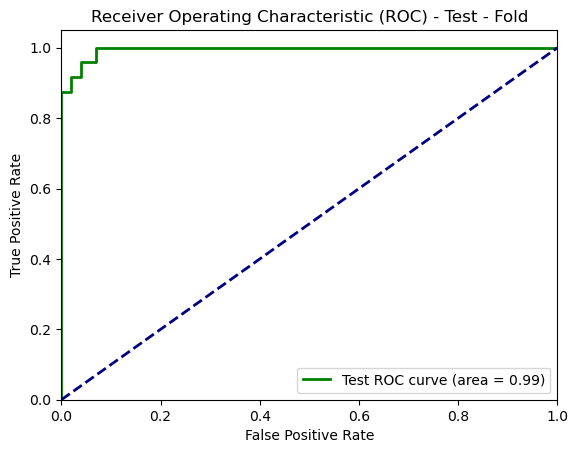

Confusion matrix, without normalization


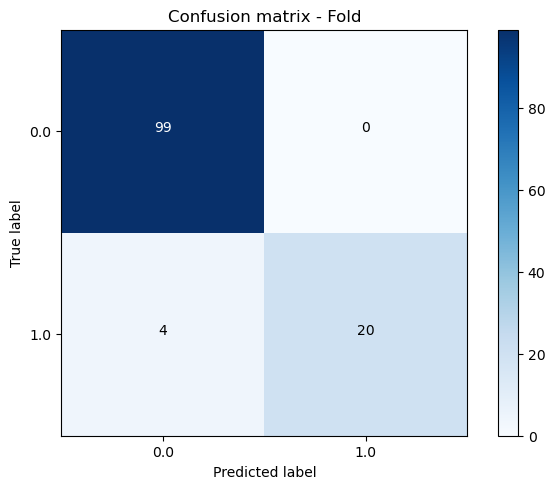

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        99
         1.0       1.00      0.83      0.91        24

    accuracy                           0.97       123
   macro avg       0.98      0.92      0.94       123
weighted avg       0.97      0.97      0.97       123

Fold 2:
Train Accuracy: 0.9898373983739838
Train AUC: 0.9933983495873968
Test Accuracy: 0.975609756097561
Test AUC: 0.990909090909091
Validation Accuracy: 0.975609756097561
Validation AUC: 0.990909090909091


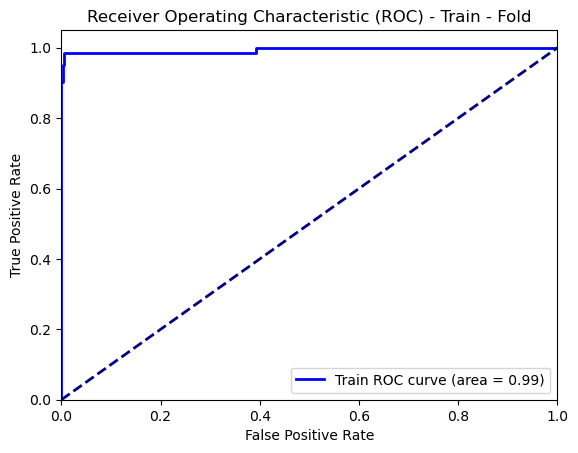

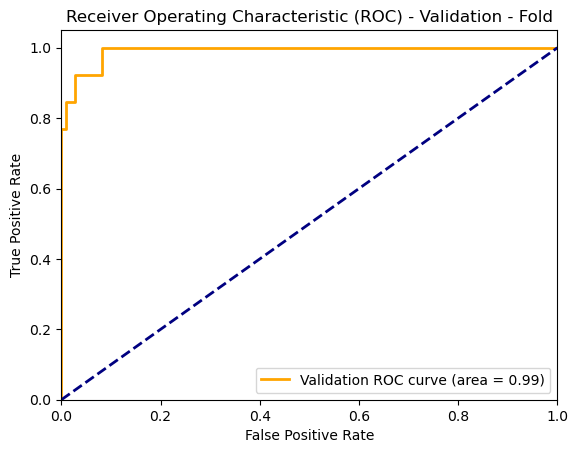

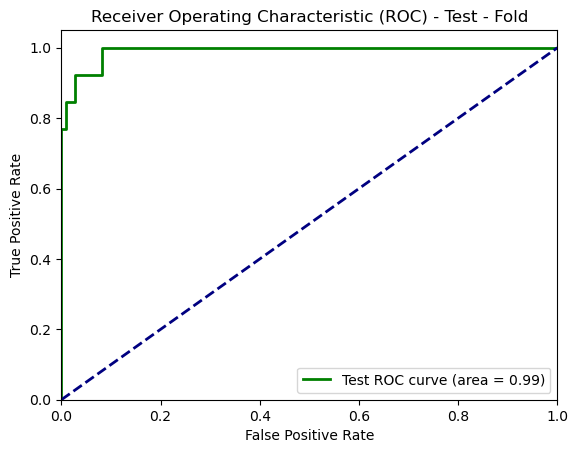

Confusion matrix, without normalization


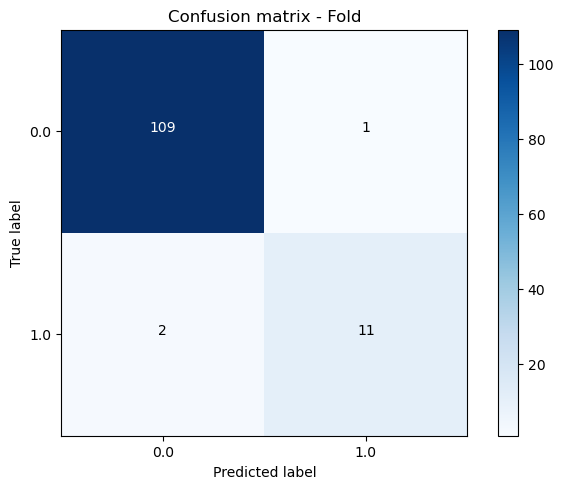

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       110
         1.0       0.92      0.85      0.88        13

    accuracy                           0.98       123
   macro avg       0.95      0.92      0.93       123
weighted avg       0.98      0.98      0.98       123

Fold 3:
Train Accuracy: 0.9898373983739838
Train AUC: 0.9995559995559995
Test Accuracy: 0.983739837398374
Test AUC: 0.9234234234234233
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9234234234234233


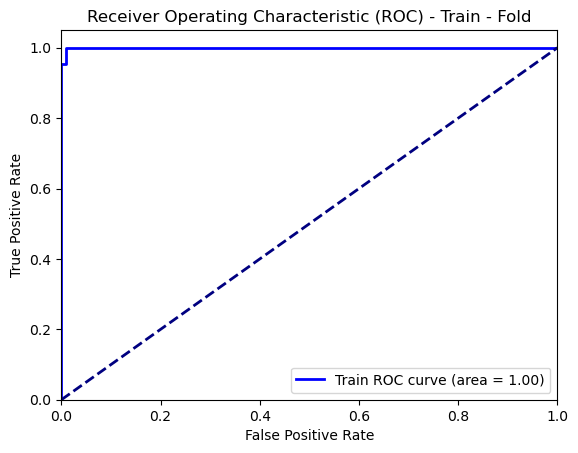

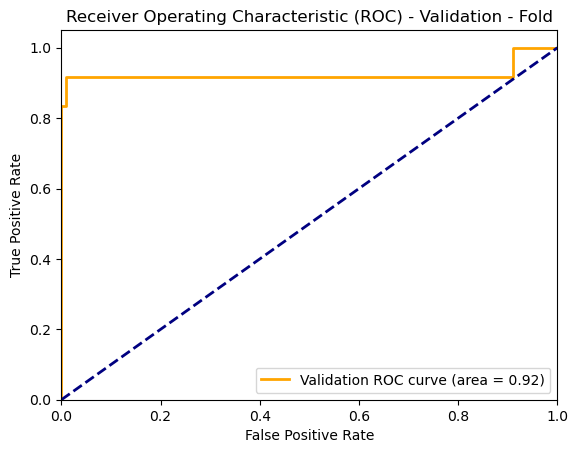

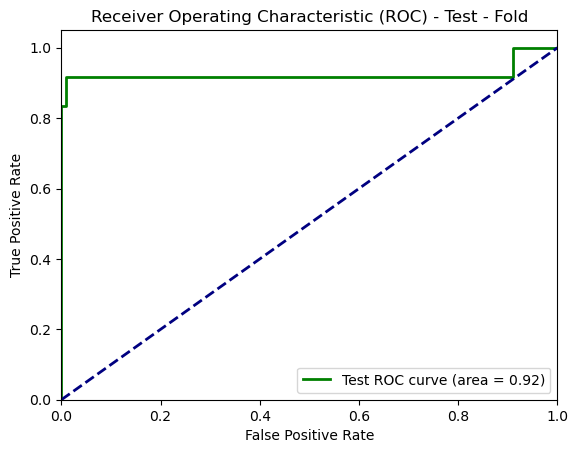

Confusion matrix, without normalization


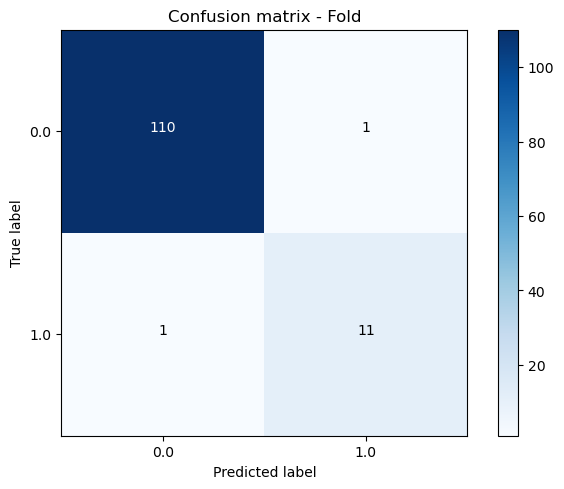

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       111
         1.0       0.92      0.92      0.92        12

    accuracy                           0.98       123
   macro avg       0.95      0.95      0.95       123
weighted avg       0.98      0.98      0.98       123

Fold 4:
Train Accuracy: 0.9857723577235772
Train AUC: 0.9917479369842459
Test Accuracy: 1.0
Test AUC: 1.0
Validation Accuracy: 1.0
Validation AUC: 1.0


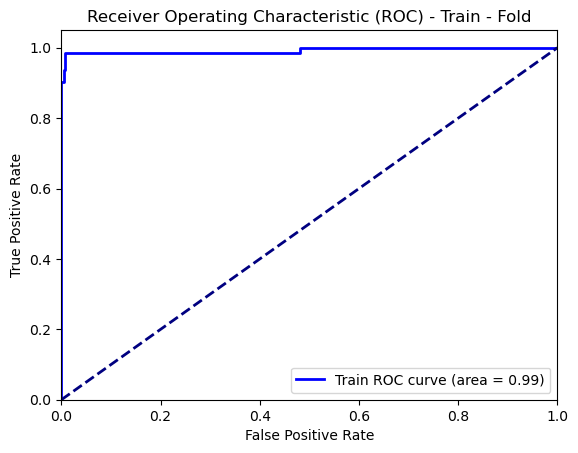

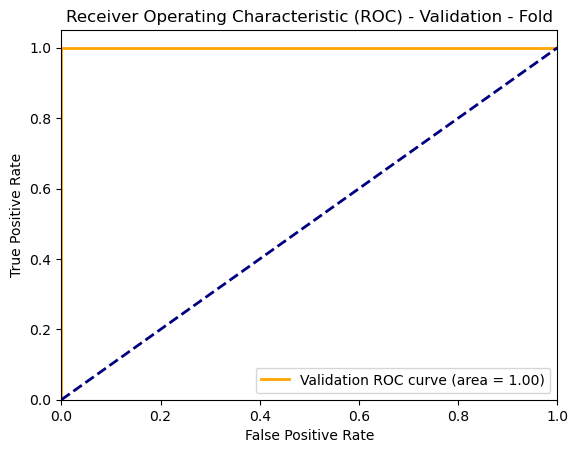

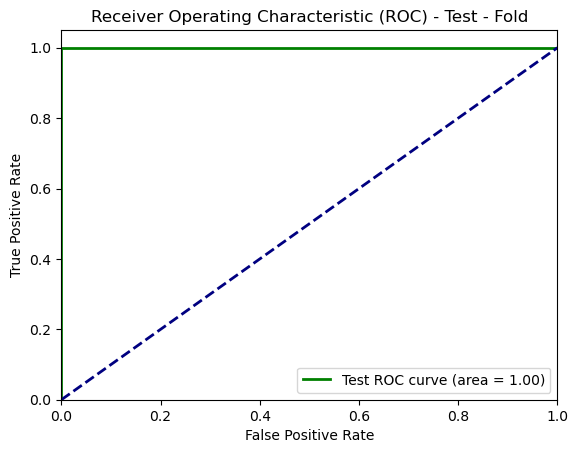

Confusion matrix, without normalization


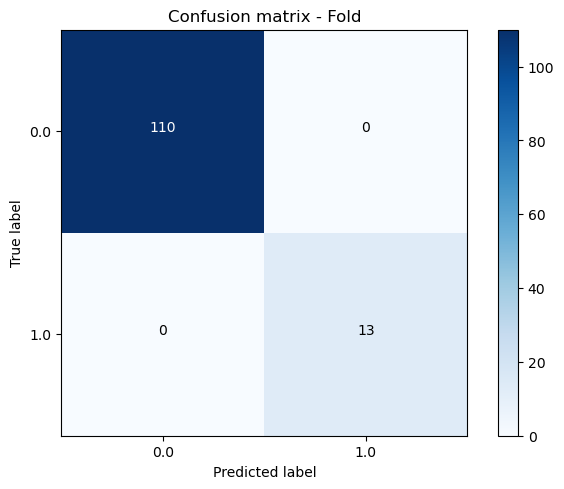

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

Fold 5:
Train Accuracy: 0.991869918699187
Train AUC: 0.991410352588147
Test Accuracy: 0.983739837398374
Test AUC: 0.9881118881118881
Validation Accuracy: 0.983739837398374
Validation AUC: 0.9881118881118881


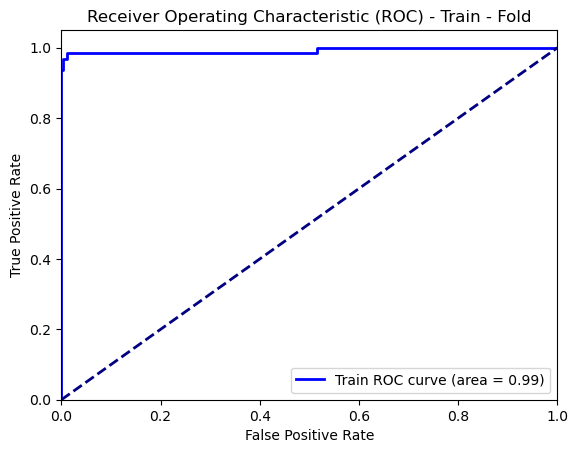

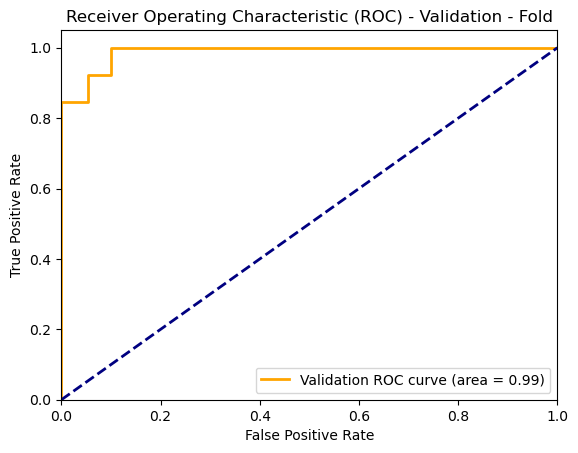

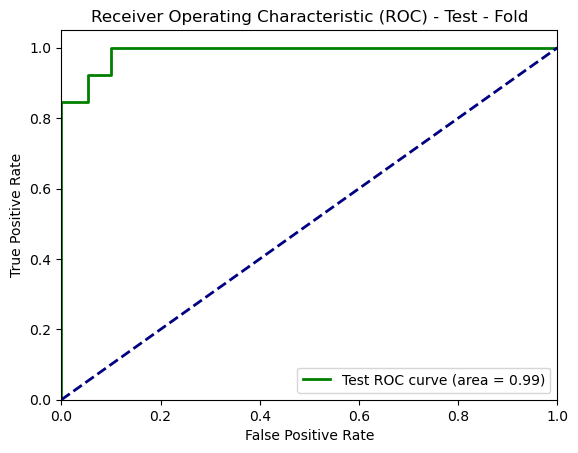

Confusion matrix, without normalization


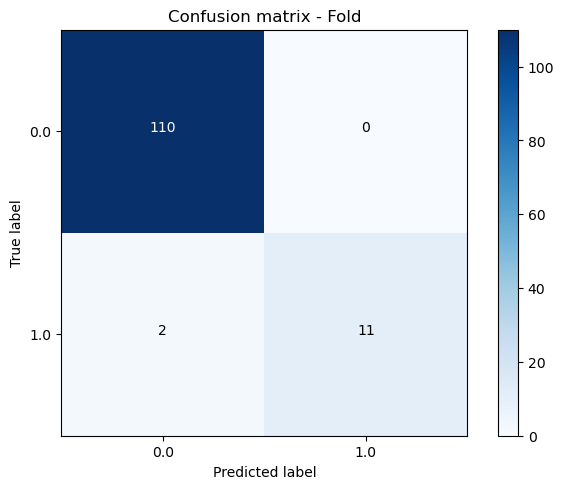

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       110
         1.0       1.00      0.85      0.92        13

    accuracy                           0.98       123
   macro avg       0.99      0.92      0.95       123
weighted avg       0.98      0.98      0.98       123

Average Train Accuracy: 0.9894308943089432
Average Validation Accuracy: 0.9821138211382113
Average Test Accuracy: 0.9821138211382113
Average Train AUC: 0.9930883407350214
Average Validation AUC: 0.9793946043946044
Average Test AUC: 0.9793946043946044


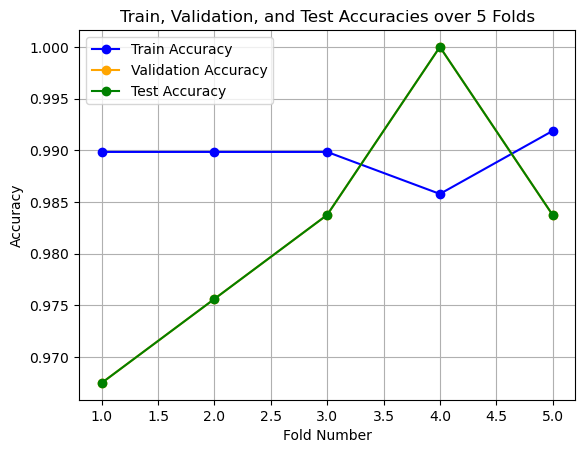

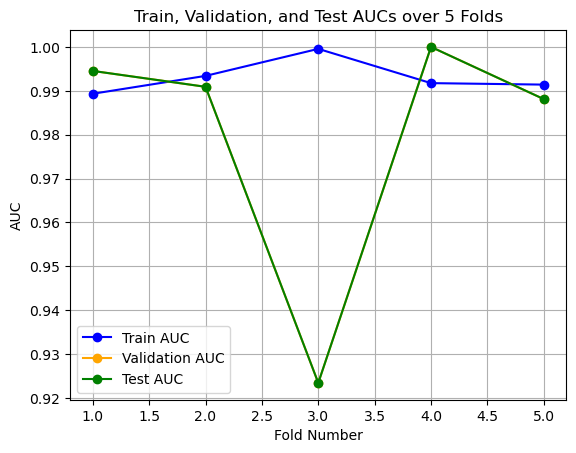

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Import PCA

# Initialize lists to store metrics
train_acc_list = []
val_acc_list = []
test_acc_list = []
class_report_list = []
train_auc_list = []
val_auc_list = []
test_auc_list = []

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA transformation
pca = PCA(n_components=0.95)  # Retain 95% of variance, adjust as needed
X_pca = pca.fit_transform(X_scaled)
print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Iterate through folds
for fold_num, (train_index, test_index) in enumerate(kf.split(X_pca), 1):
    print(f"Fold {fold_num}:")
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # SVM model
    model = SVC(probability=True)

    # Train the model
    model.fit(X_train, y_train)

    # Train set
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    # Validation set
    val_pred = model.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_acc_list.append(val_acc)

    # Test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    # Classification Report
    class_report = classification_report(y_test, test_pred)
    class_report_list.append(class_report)

    # ROC Curve and AUC for Train set
    train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    train_auc = auc(train_fpr, train_tpr)
    train_auc_list.append(train_auc)

    # ROC Curve and AUC for Validation set
    val_fpr, val_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    val_auc = auc(val_fpr, val_tpr)
    val_auc_list.append(val_auc)

    # ROC Curve and AUC for Test set
    test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    test_auc = auc(test_fpr, test_tpr)
    test_auc_list.append(test_auc)

    # Print Train Accuracy and AUC
    print("Train Accuracy:", train_acc)
    print("Train AUC:", train_auc)

    # Print Test Accuracy and AUC
    print("Test Accuracy:", test_acc)
    print("Test AUC:", test_auc)

    # Print Validation Accuracy and AUC
    print("Validation Accuracy:", val_acc)
    print("Validation AUC:", val_auc)

    # Plot ROC Curve for Train set
    plt.figure()
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Train - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Validation set
    plt.figure()
    plt.plot(val_fpr, val_tpr, color='orange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Validation - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Plot ROC Curve for Test set
    plt.figure()
    plt.plot(test_fpr, test_tpr, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Test - Fold')
    plt.legend(loc="lower right")
    plt.show()

    # Print Confusion Matrix
    cm = confusion_matrix(y_test, test_pred)
    plot_confusion_matrix(cm, classes=np.unique(y), title='Confusion matrix - Fold', normalize=False)
    plt.show()

    # Print Classification Report
    print("Classification Report:")
    print(class_report)
    print("=" * 50)

# Calculate and print average accuracies and AUCs
avg_train_acc = np.mean(train_acc_list)
avg_val_acc = np.mean(val_acc_list)
avg_test_acc = np.mean(test_acc_list)
avg_train_auc = np.mean(train_auc_list)
avg_val_auc = np.mean(val_auc_list)
avg_test_auc = np.mean(test_auc_list)

print(f"Average Train Accuracy: {avg_train_acc}")
print(f"Average Validation Accuracy: {avg_val_acc}")
print(f"Average Test Accuracy: {avg_test_acc}")
print(f"Average Train AUC: {avg_train_auc}")
print(f"Average Validation AUC: {avg_val_auc}")
print(f"Average Test AUC: {avg_test_auc}")

# Create line chart for accuracies and AUCs
folds = list(range(1, kf.get_n_splits() + 1))

plt.figure()
plt.plot(folds, train_acc_list, marker='o', color='blue', label='Train Accuracy')
plt.plot(folds, val_acc_list, marker='o', color='orange', label='Validation Accuracy')
plt.plot(folds, test_acc_list, marker='o', color='green', label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Train, Validation, and Test Accuracies over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(folds, train_auc_list, marker='o', color='blue', label='Train AUC')
plt.plot(folds, val_auc_list, marker='o', color='orange', label='Validation AUC')
plt.plot(folds, test_auc_list, marker='o', color='green', label='Test AUC')
plt.xlabel('Fold Number')
plt.ylabel('AUC')
plt.title('Train, Validation, and Test AUCs over 5 Folds')
plt.legend()
plt.grid(True)
plt.show()


Original number of features: 12
Reduced number of features after RR: 10
Evaluating RF
Evaluating DT
Evaluating Logistic
Evaluating XGBoost
Evaluating AdaBoost
Evaluating SVC
Evaluating kNN
Average Test Accuracy for each model:
RF: 0.97
DT: 0.94
Logistic: 0.98
XGBoost: 0.98
AdaBoost: 0.98
SVC: 0.98
kNN: 0.97
      Model  Accuracy
0        RF  0.965854
1        DT  0.941463
2  Logistic  0.980488
3   XGBoost  0.980488
4  AdaBoost  0.977236
5       SVC  0.983740
6       kNN  0.967480


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

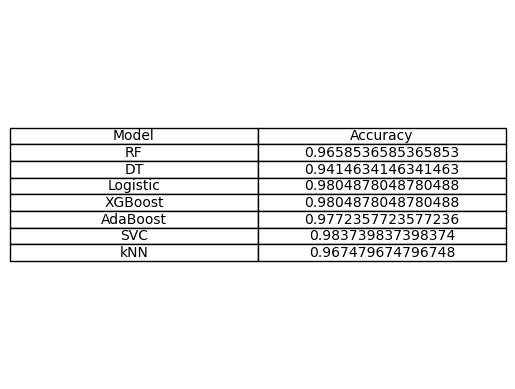

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Ridge
import xgboost as xgb
import pandas as pd

# Feature selection using Ridge Regression
def select_top_features_ridge(X, y, num_features):
    ridge = Ridge(alpha=1.0)
    ridge.fit(X, y)
    importance = np.abs(ridge.coef_)
    top_indices = np.argsort(importance)[-num_features:]
    return X[:, top_indices]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select top features using Ridge Regression
num_features_to_select = 10  # Adjust the number of features to select as needed
X_rr = select_top_features_ridge(X_scaled, y, num_features_to_select)
print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after RR: {X_rr.shape[1]}")

# Define models
models = {
    'RF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'Logistic': LogisticRegression(max_iter=1000),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(),
    'SVC': SVC(probability=True),
    'kNN': KNeighborsClassifier()
}

# Initialize a dictionary to store results
results = {model: [] for model in models.keys()}

# Iterate through models
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    model_acc = []
    for fold_num, (train_index, test_index) in enumerate(kf.split(X_rr), 1):
        X_train, X_test = X_rr[train_index], X_rr[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Test set
        test_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, test_pred)
        model_acc.append(test_acc)

    results[model_name] = np.mean(model_acc)

# Print the results
print("Average Test Accuracy for each model:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.2f}")

# Create the table
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
df_results = df_results.reset_index().rename(columns={'index': 'Model'})
print(df_results)

# Plot the table
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_results.values, colLabels=df_results.columns, cellLoc='center', loc='center')

plt.show()


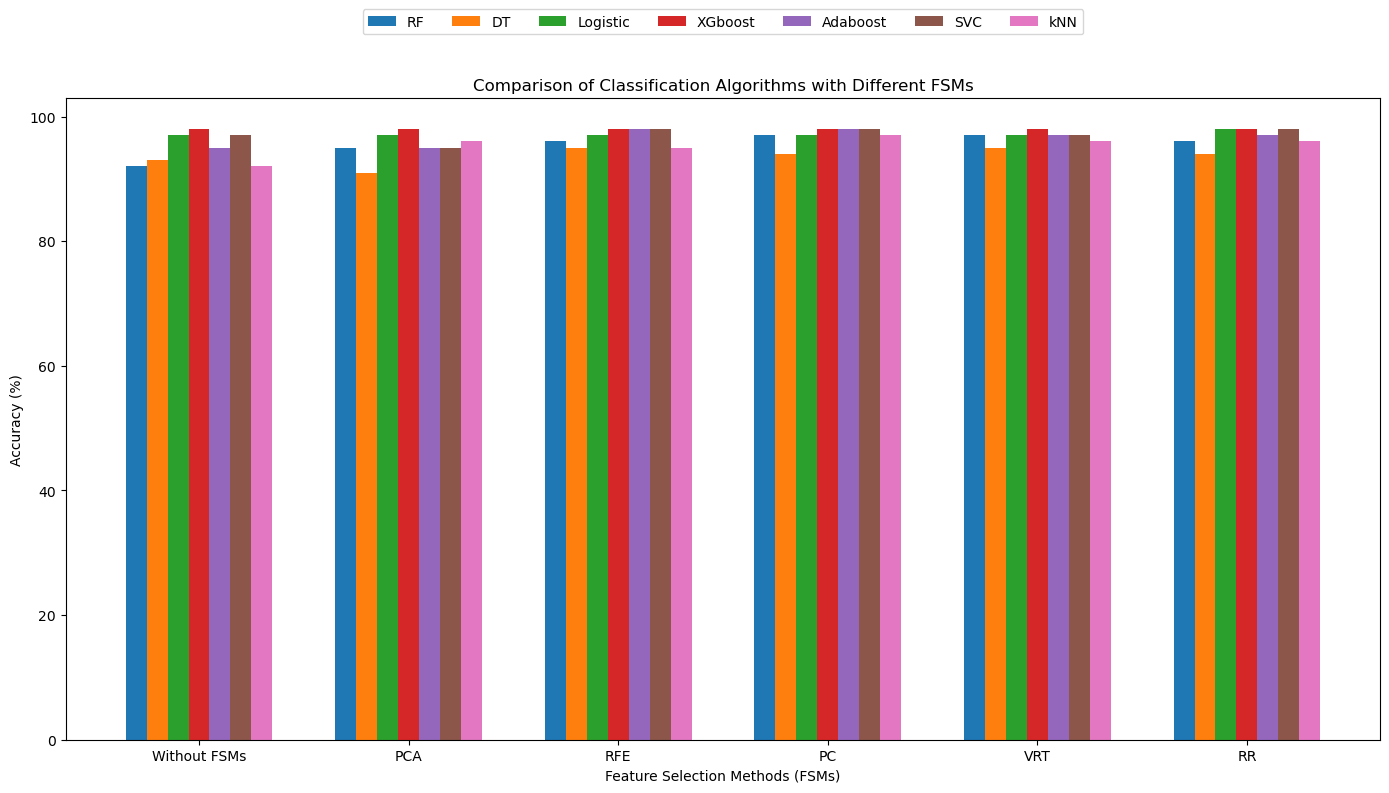

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'FSMs': ['Without FSMs', 'PCA', 'RFE', 'PC', 'VRT', 'RR'],
    'RF': [92, 95, 96, 97, 97, 96],
    'DT': [93, 91, 95, 94, 95, 94],
    'Logistic': [97, 97, 97, 97, 97, 98],
    'XGboost': [98, 98, 98, 98, 98, 98],
    'Adaboost': [95, 95, 98, 98, 97, 97],
    'SVC': [97, 95, 98, 98, 97, 98],
    'kNN': [92, 96, 95, 97, 96, 96]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Plotting
bar_width = 0.1
index = np.arange(len(df['FSMs']))

fig, ax = plt.subplots(figsize=(14, 8))

bars_rf = ax.bar(index, df['RF'], bar_width, label='RF')
bars_dt = ax.bar(index + bar_width, df['DT'], bar_width, label='DT')
bars_logistic = ax.bar(index + 2 * bar_width, df['Logistic'], bar_width, label='Logistic')
bars_xgboost = ax.bar(index + 3 * bar_width, df['XGboost'], bar_width, label='XGboost')
bars_adaboost = ax.bar(index + 4 * bar_width, df['Adaboost'], bar_width, label='Adaboost')
bars_svc = ax.bar(index + 5 * bar_width, df['SVC'], bar_width, label='SVC')
bars_knn = ax.bar(index + 6 * bar_width, df['kNN'], bar_width, label='kNN')

ax.set_xlabel('Feature Selection Methods (FSMs)')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Classification Algorithms with Different FSMs')
ax.set_xticks(index + 3 * bar_width)
ax.set_xticklabels(df['FSMs'])

# Position the legend above the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=7)

plt.tight_layout()
plt.show()
